In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [5]:
df.isin(['',' ', '-', '?', '0', '?', 'NA', 'NaN']).sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [6]:
df.isna().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [7]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
df.duplicated().sum()

1663

In [9]:
missing_data=df.isnull().sum().sort_values(ascending=False)
percent_missing_data =(missing_data/len(df))*100
print(pd.concat([missing_data, percent_missing_data], axis=1, keys=['Missing Overall', 'Missing data in %']))

               Missing Overall  Missing data in %
Sunshine                  3994          47.406528
Evaporation               3512          41.685460
Cloud3pm                  2455          29.139466
Cloud9am                  2421          28.735905
Pressure3pm               1312          15.572700
Pressure9am               1309          15.537092
WindGustDir                991          11.762611
WindGustSpeed              991          11.762611
WindDir9am                 829           9.839763
WindDir3pm                 308           3.655786
RainToday                  240           2.848665
Rainfall                   240           2.848665
RainTomorrow               239           2.836795
WindSpeed3pm               107           1.270030
Humidity3pm                102           1.210682
Temp3pm                     96           1.139466
WindSpeed9am                76           0.902077
MinTemp                     75           0.890208
MaxTemp                     60           0.712166


In [10]:
#Here we can see that except for location and date, theres a lot of missing values in this dataset

In [11]:
df.size

193775

In [12]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [13]:
#We have two target problem Rainfall and Raintomorrow
#Rainfall - We can see that the unique values are higher so its a continous regression problem
#Raintomorrow: it has very less unique values and its categorical which means its a classification problem

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [15]:
#We have 7 variables which are object
#The rest are float 
#For categorical we can use mode to compute the missing values

In [16]:
df.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

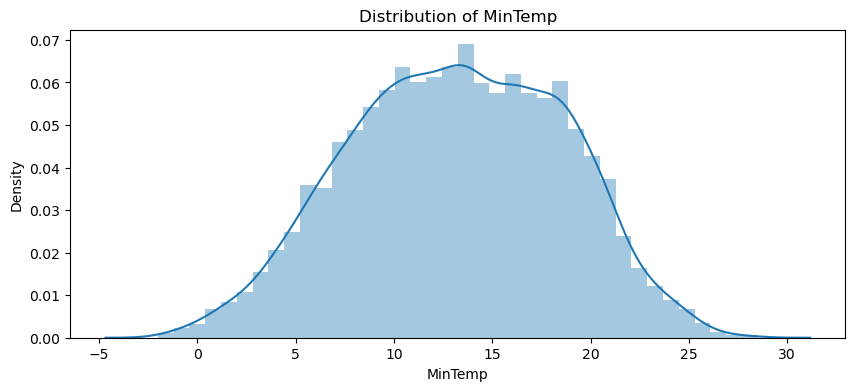

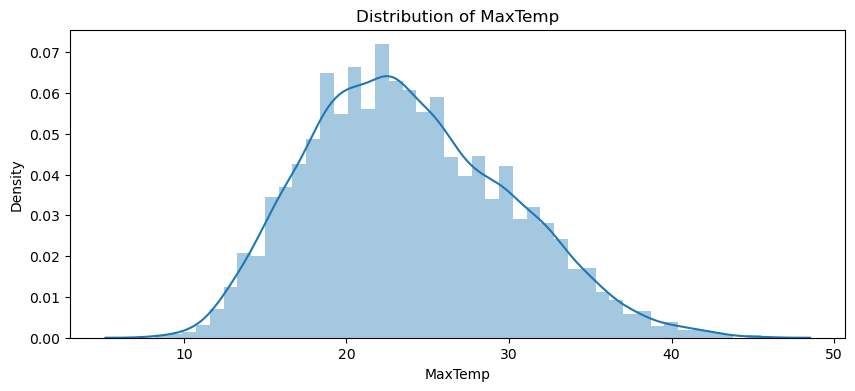

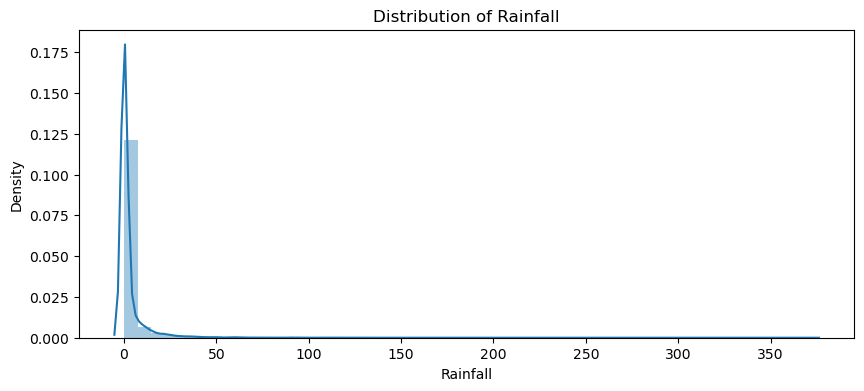

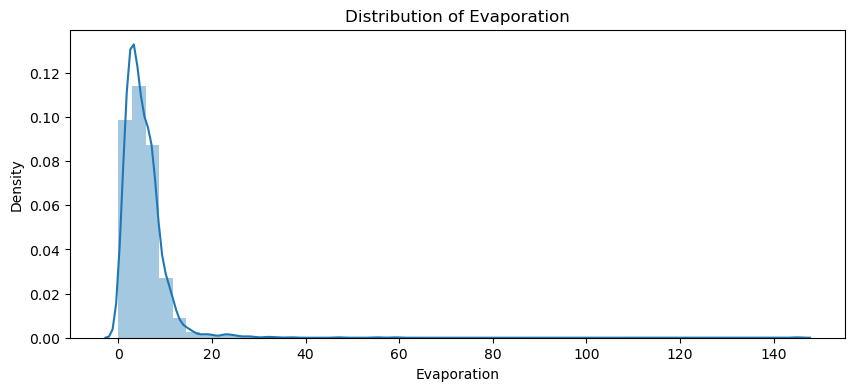

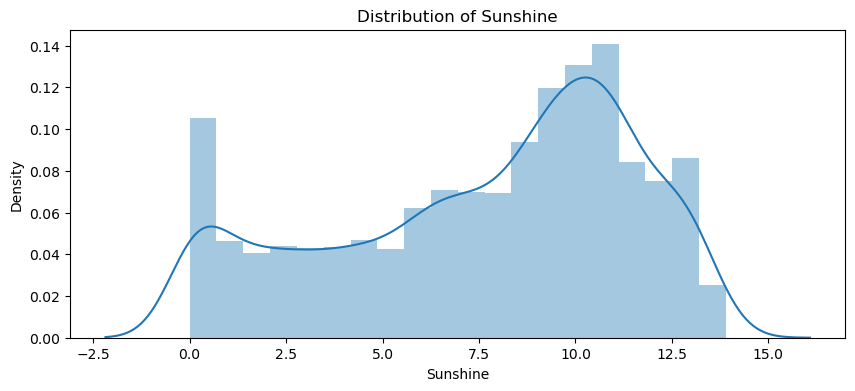

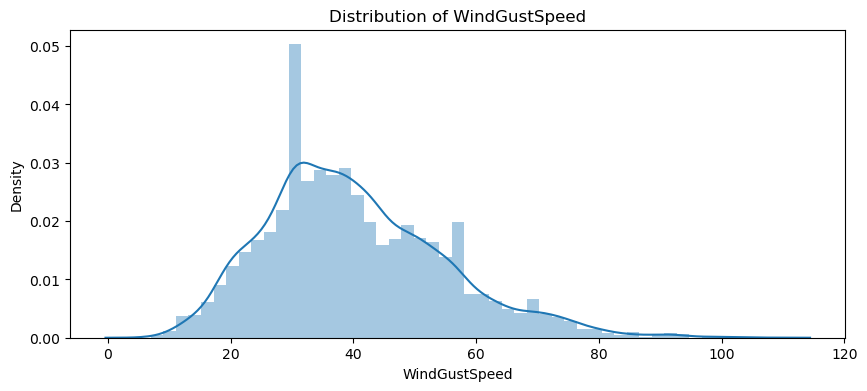

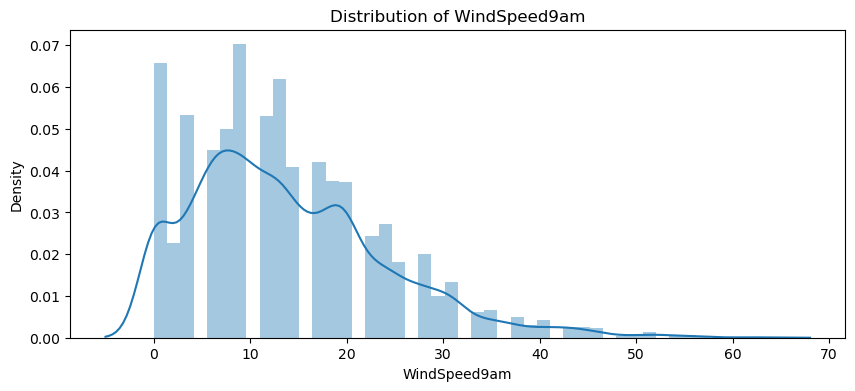

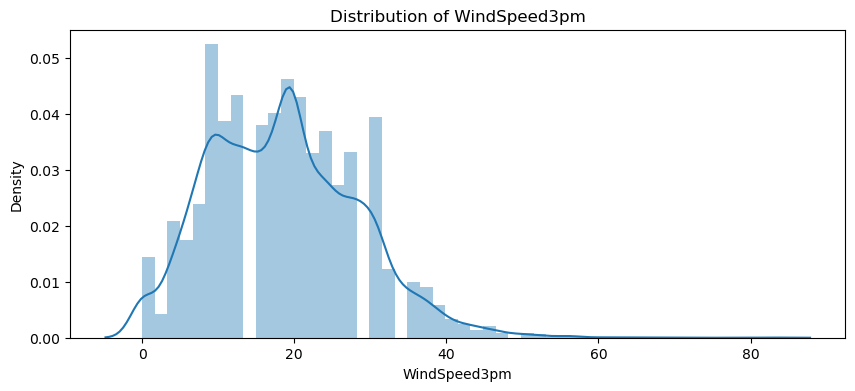

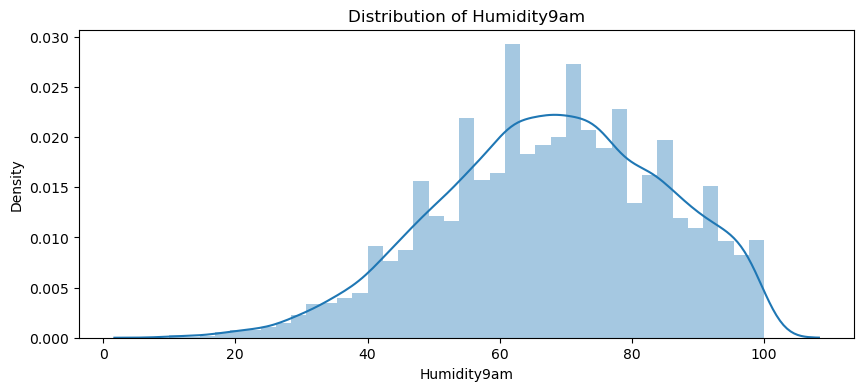

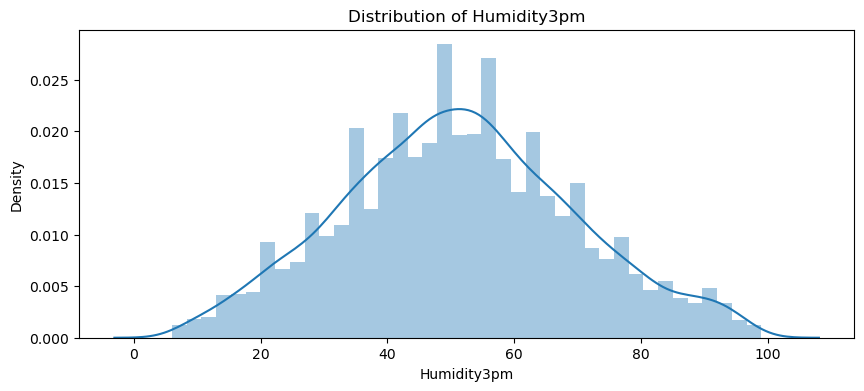

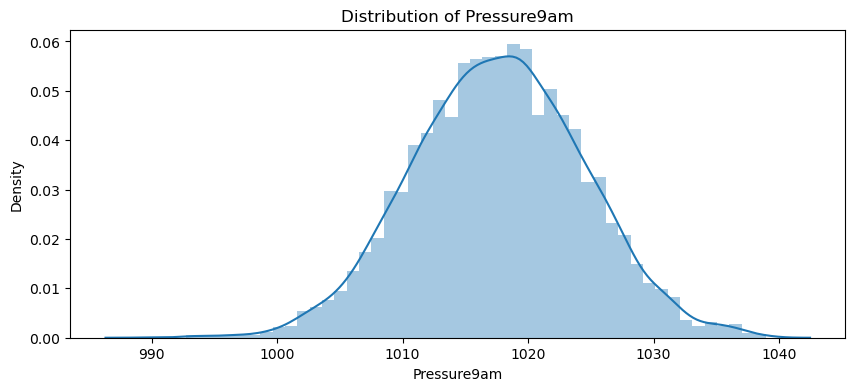

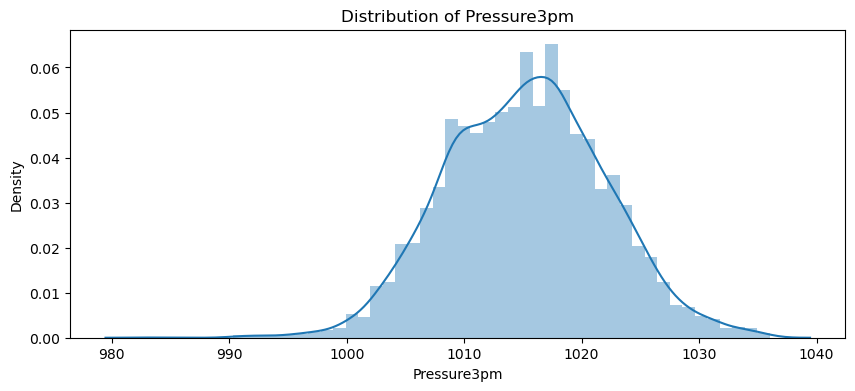

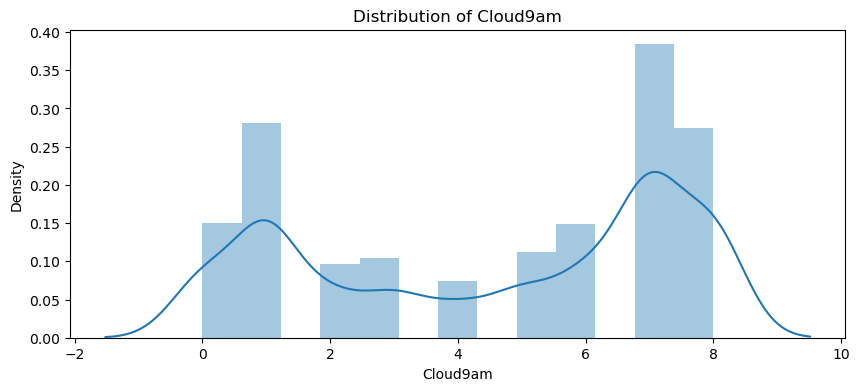

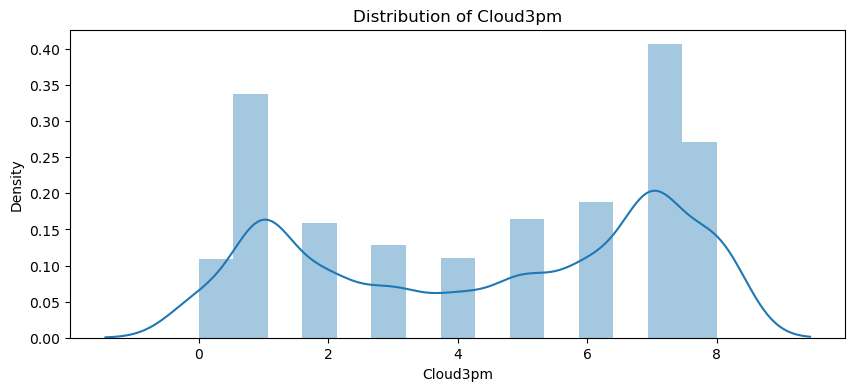

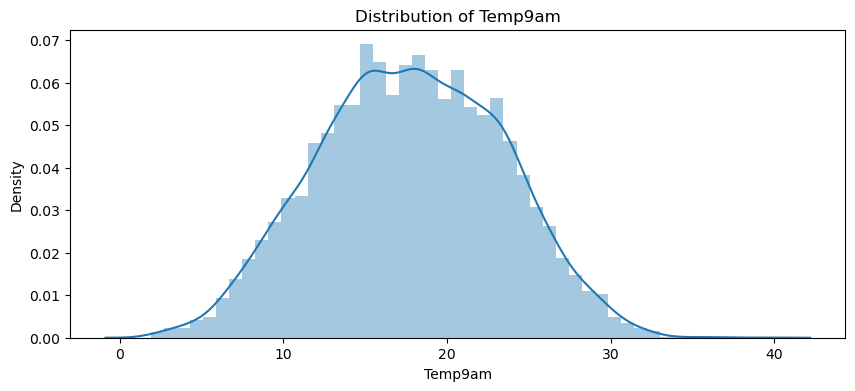

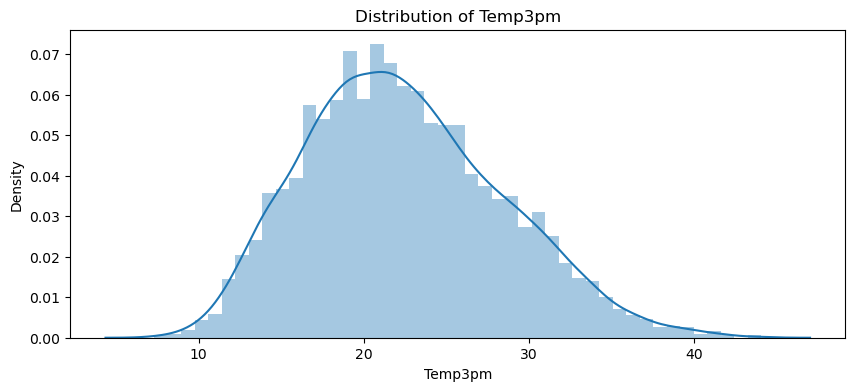

In [17]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.distplot(df[col].dropna())
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

In [18]:
WindSpeed9am_median = df['WindSpeed9am'].median()
MinTemp_mean = df['MinTemp'].mean()
MaxTemp_median = df['MaxTemp'].median()
Humidity9am_median = df['Humidity9am'].median()
Temp9am_mean = df['Temp9am'].mean()

df['WindSpeed9am'].fillna(WindSpeed9am_median, inplace=True)
df['MinTemp'].fillna(MinTemp_mean, inplace=True)
df['MaxTemp'].fillna(MaxTemp_median, inplace=True)
df['Humidity9am'].fillna(Humidity9am_median, inplace=True)
df['Temp9am'].fillna(Temp9am_mean, inplace=True)


In [19]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am        0
WindSpeed3pm      107
Humidity9am         0
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am             0
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [20]:
def replace_values(df, column, strategy):
    if strategy == 'mean':
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == 'median':
        df[column].fillna(df[column].median(), inplace=True)
    elif strategy == 'mode':
        mode_value = df[column].mode()[0] 
        df[column].fillna(mode_value, inplace=True)
replace_values(df, 'WindDir3pm', 'mode')
replace_values(df, 'RainToday', 'mode')
replace_values(df, 'RainTomorrow', 'mode')
replace_values(df, 'Rainfall', 'median')
replace_values(df, 'WindSpeed3pm', 'median')
replace_values(df, 'Humidity3pm', 'mean')
replace_values(df, 'Temp3pm', 'median')

In [21]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

In [22]:
#First lets convert the date into day, month and year 

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
print(df)

           Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0    2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1    2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2    2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3    2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4    2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...      ...       ...          ...       ...   
8420 2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421 2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422 2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423 2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424 2017-06-25    Uluru     14.9     23.3       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Pre

In [24]:
Cat_col = ['Date','Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [25]:
Num_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [26]:
Cat_summary = {column: df[column].value_counts() for column in Cat_col}
Cat_summary

{'Date': Date
 2011-01-31    5
 2011-05-08    5
 2011-05-21    5
 2011-05-20    5
 2011-05-19    5
              ..
 2013-01-28    1
 2013-01-29    1
 2013-01-30    1
 2013-01-31    1
 2013-06-08    1
 Name: count, Length: 3004, dtype: int64,
 'Location': Location
 Melbourne       1622
 Williamtown     1230
 PerthAirport    1204
 Albury           907
 Newcastle        822
 CoffsHarbour     611
 Brisbane         579
 Penrith          482
 Wollongong       474
 Darwin           250
 Adelaide         205
 Uluru             39
 Name: count, dtype: int64,
 'WindGustDir': WindGustDir
 N      713
 SSE    578
 S      577
 SW     572
 E      557
 WNW    531
 W      507
 WSW    504
 SE     484
 ENE    415
 SSW    396
 NW     383
 NE     353
 NNE    343
 ESE    302
 NNW    219
 Name: count, dtype: int64,
 'WindDir9am': WindDir9am
 N      906
 SW     704
 NW     625
 WSW    543
 SE     505
 WNW    480
 SSW    467
 ENE    433
 NNE    430
 W      414
 NE     409
 S      402
 E      380
 SSE    365
 

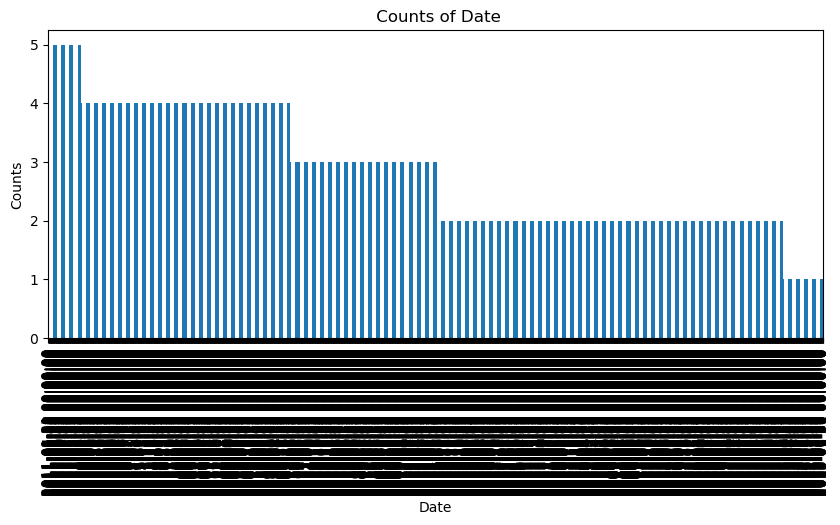

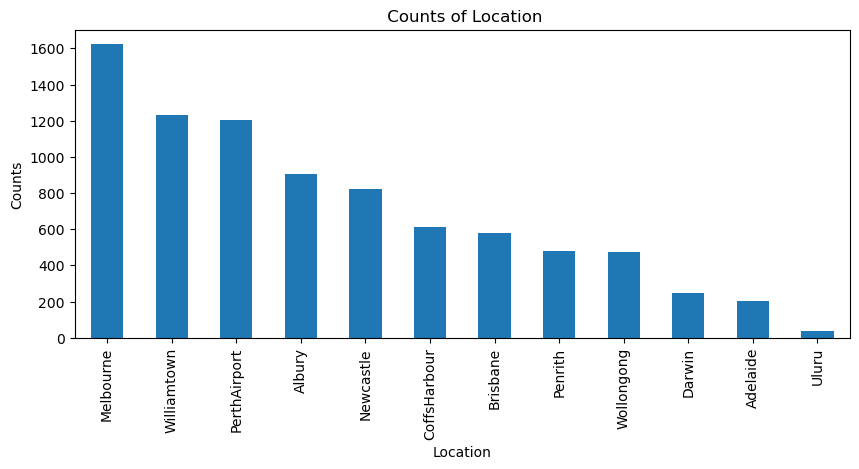

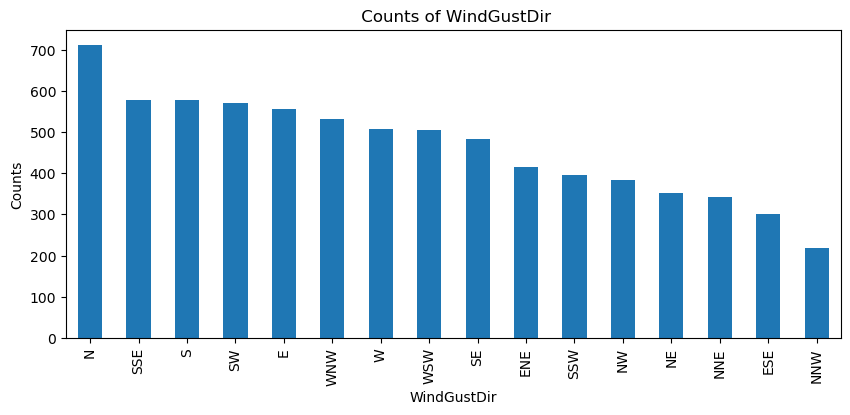

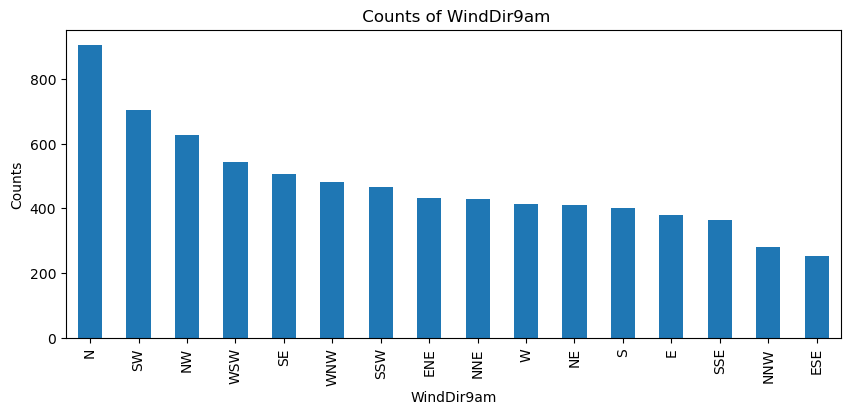

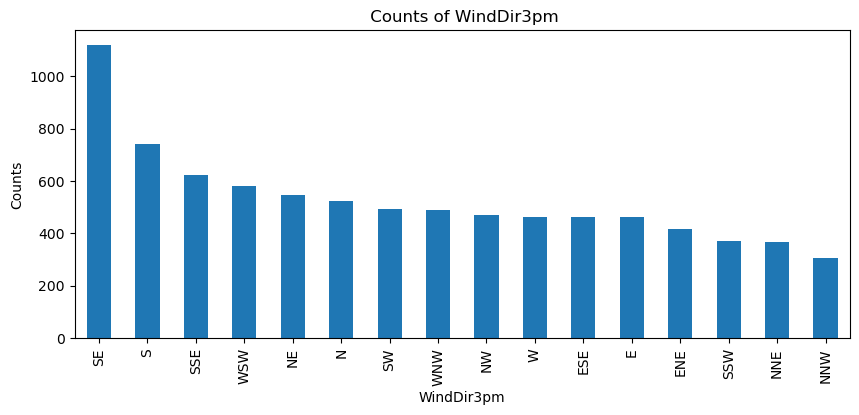

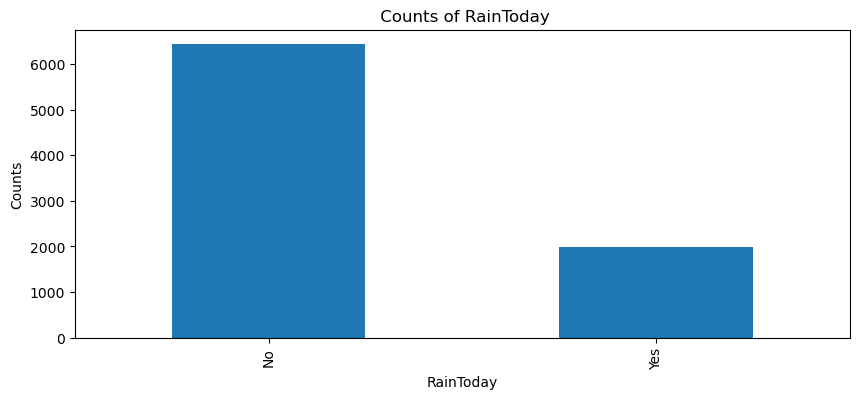

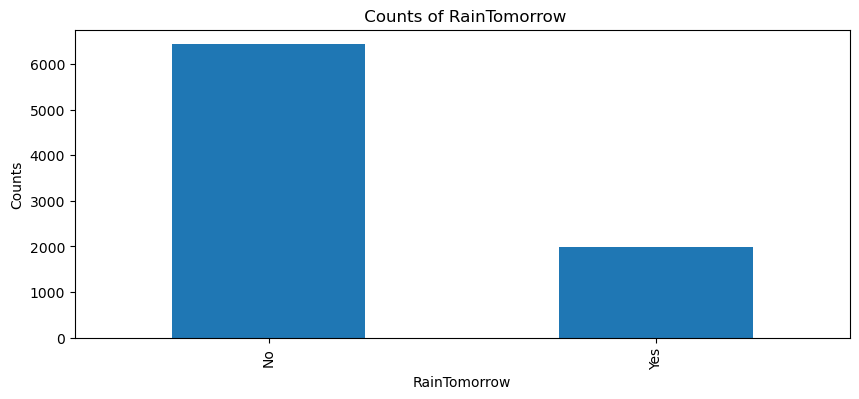

In [27]:
for column in Cat_col:
    plt.figure(figsize=(10, 4)) 
    df[column].value_counts().plot(kind='bar') 
    plt.title(f' Counts of {column}') 
    plt.xlabel(column)  
    plt.ylabel('Counts') 
    plt.show() 

In [28]:
#We have a lot of data for Melbourne, Williamtown & PerthAiport
#Wind Direction - North , South South-East & South
#Higher Windirection around 9 am in the North followed by South West and Northwest
#Higher Wind Direction for South East & South
#Less rain today
#Less likely to rain tomorrow (imbalanced data)

In [29]:
Num_summary = {column: df[column].value_counts() for column in Num_col}
Num_summary

{'MinTemp': MinTemp
  13.193305    75
  12.000000    74
  13.200000    71
  13.800000    69
  12.700000    68
               ..
 -1.100000      1
  1.400000      1
 -1.400000      1
 -1.700000      1
  26.000000     1
 Name: count, Length: 286, dtype: int64,
 'MaxTemp': MaxTemp
 23.3    113
 19.0     87
 23.8     75
 19.8     74
 25.0     71
        ... 
 11.2      1
 43.1      1
 42.7      1
 42.9      1
 43.5      1
 Name: count, Length: 331, dtype: int64,
 'Rainfall': Rainfall
 0.0      5539
 0.2       406
 0.4       177
 0.6       116
 1.2        86
          ... 
 61.2        1
 128.0       1
 90.0        1
 34.4        1
 40.0        1
 Name: count, Length: 250, dtype: int64,
 'Evaporation': Evaporation
 4.0     180
 3.0     163
 2.4     147
 2.2     146
 2.6     143
        ... 
 17.0      1
 18.6      1
 22.4      1
 19.2      1
 0.7       1
 Name: count, Length: 116, dtype: int64,
 'Sunshine': Sunshine
 0.0     166
 11.1     68
 11.2     67
 11.0     66
 10.7     64
        ..

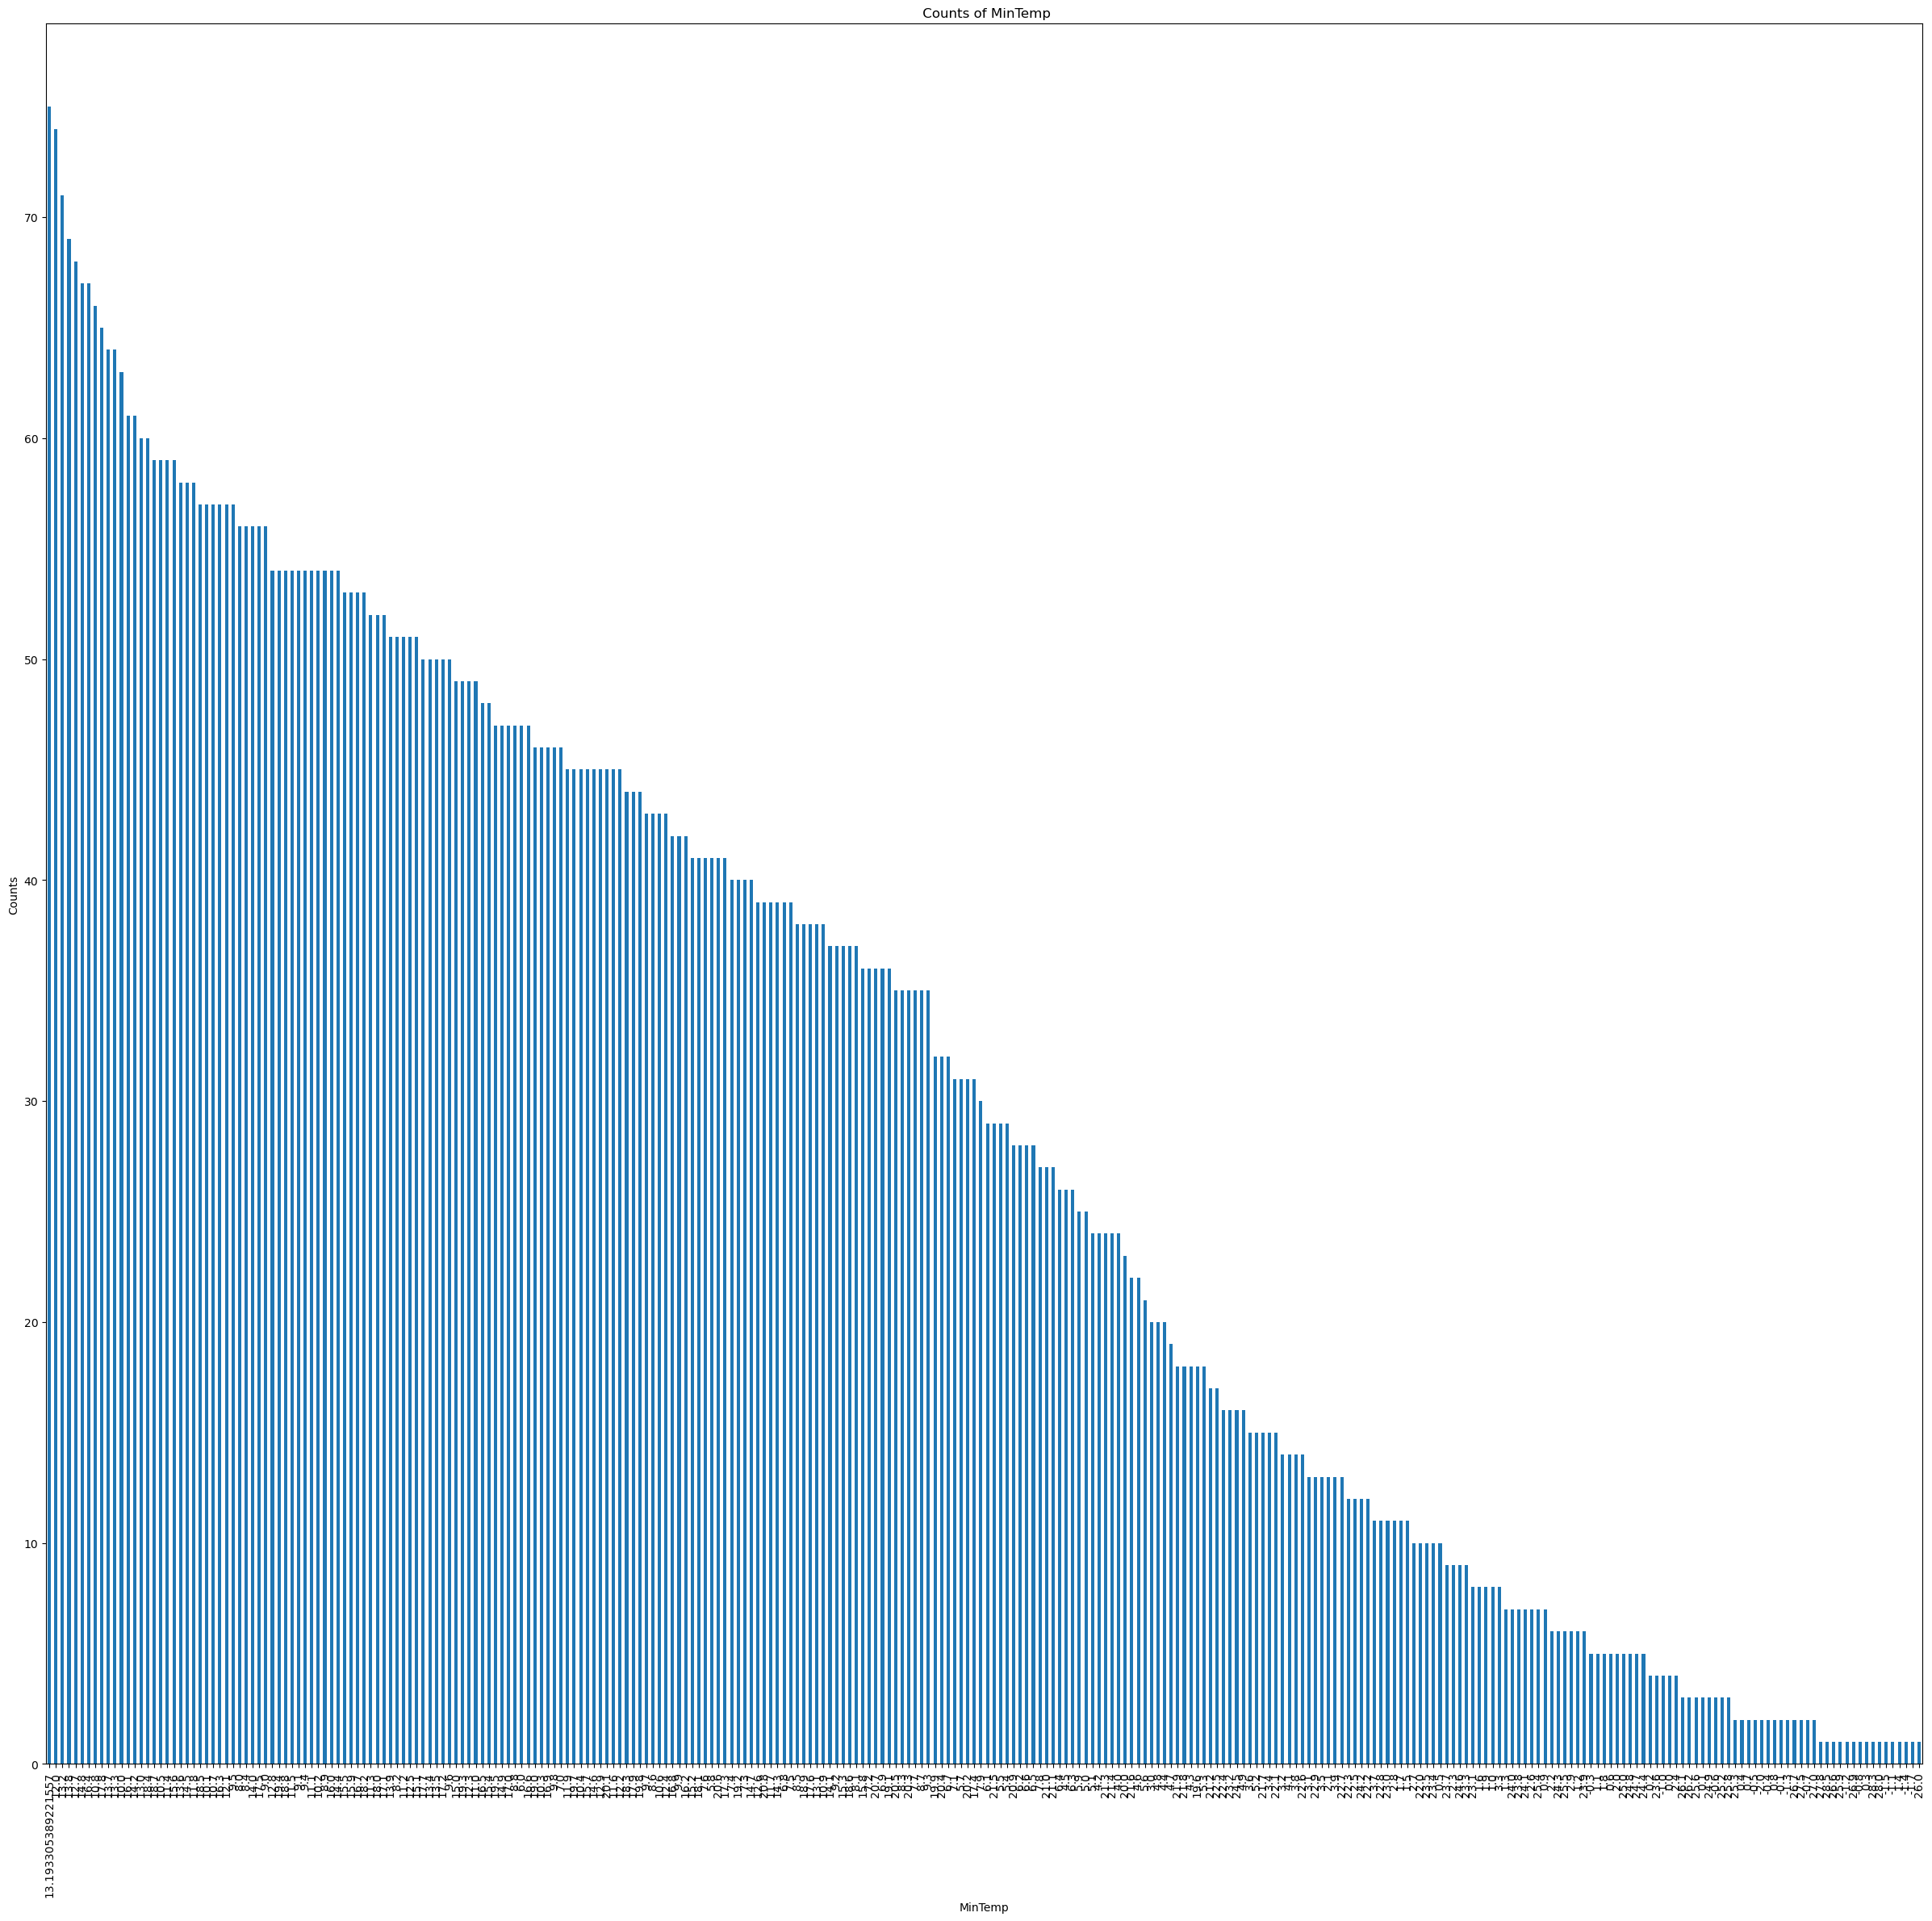

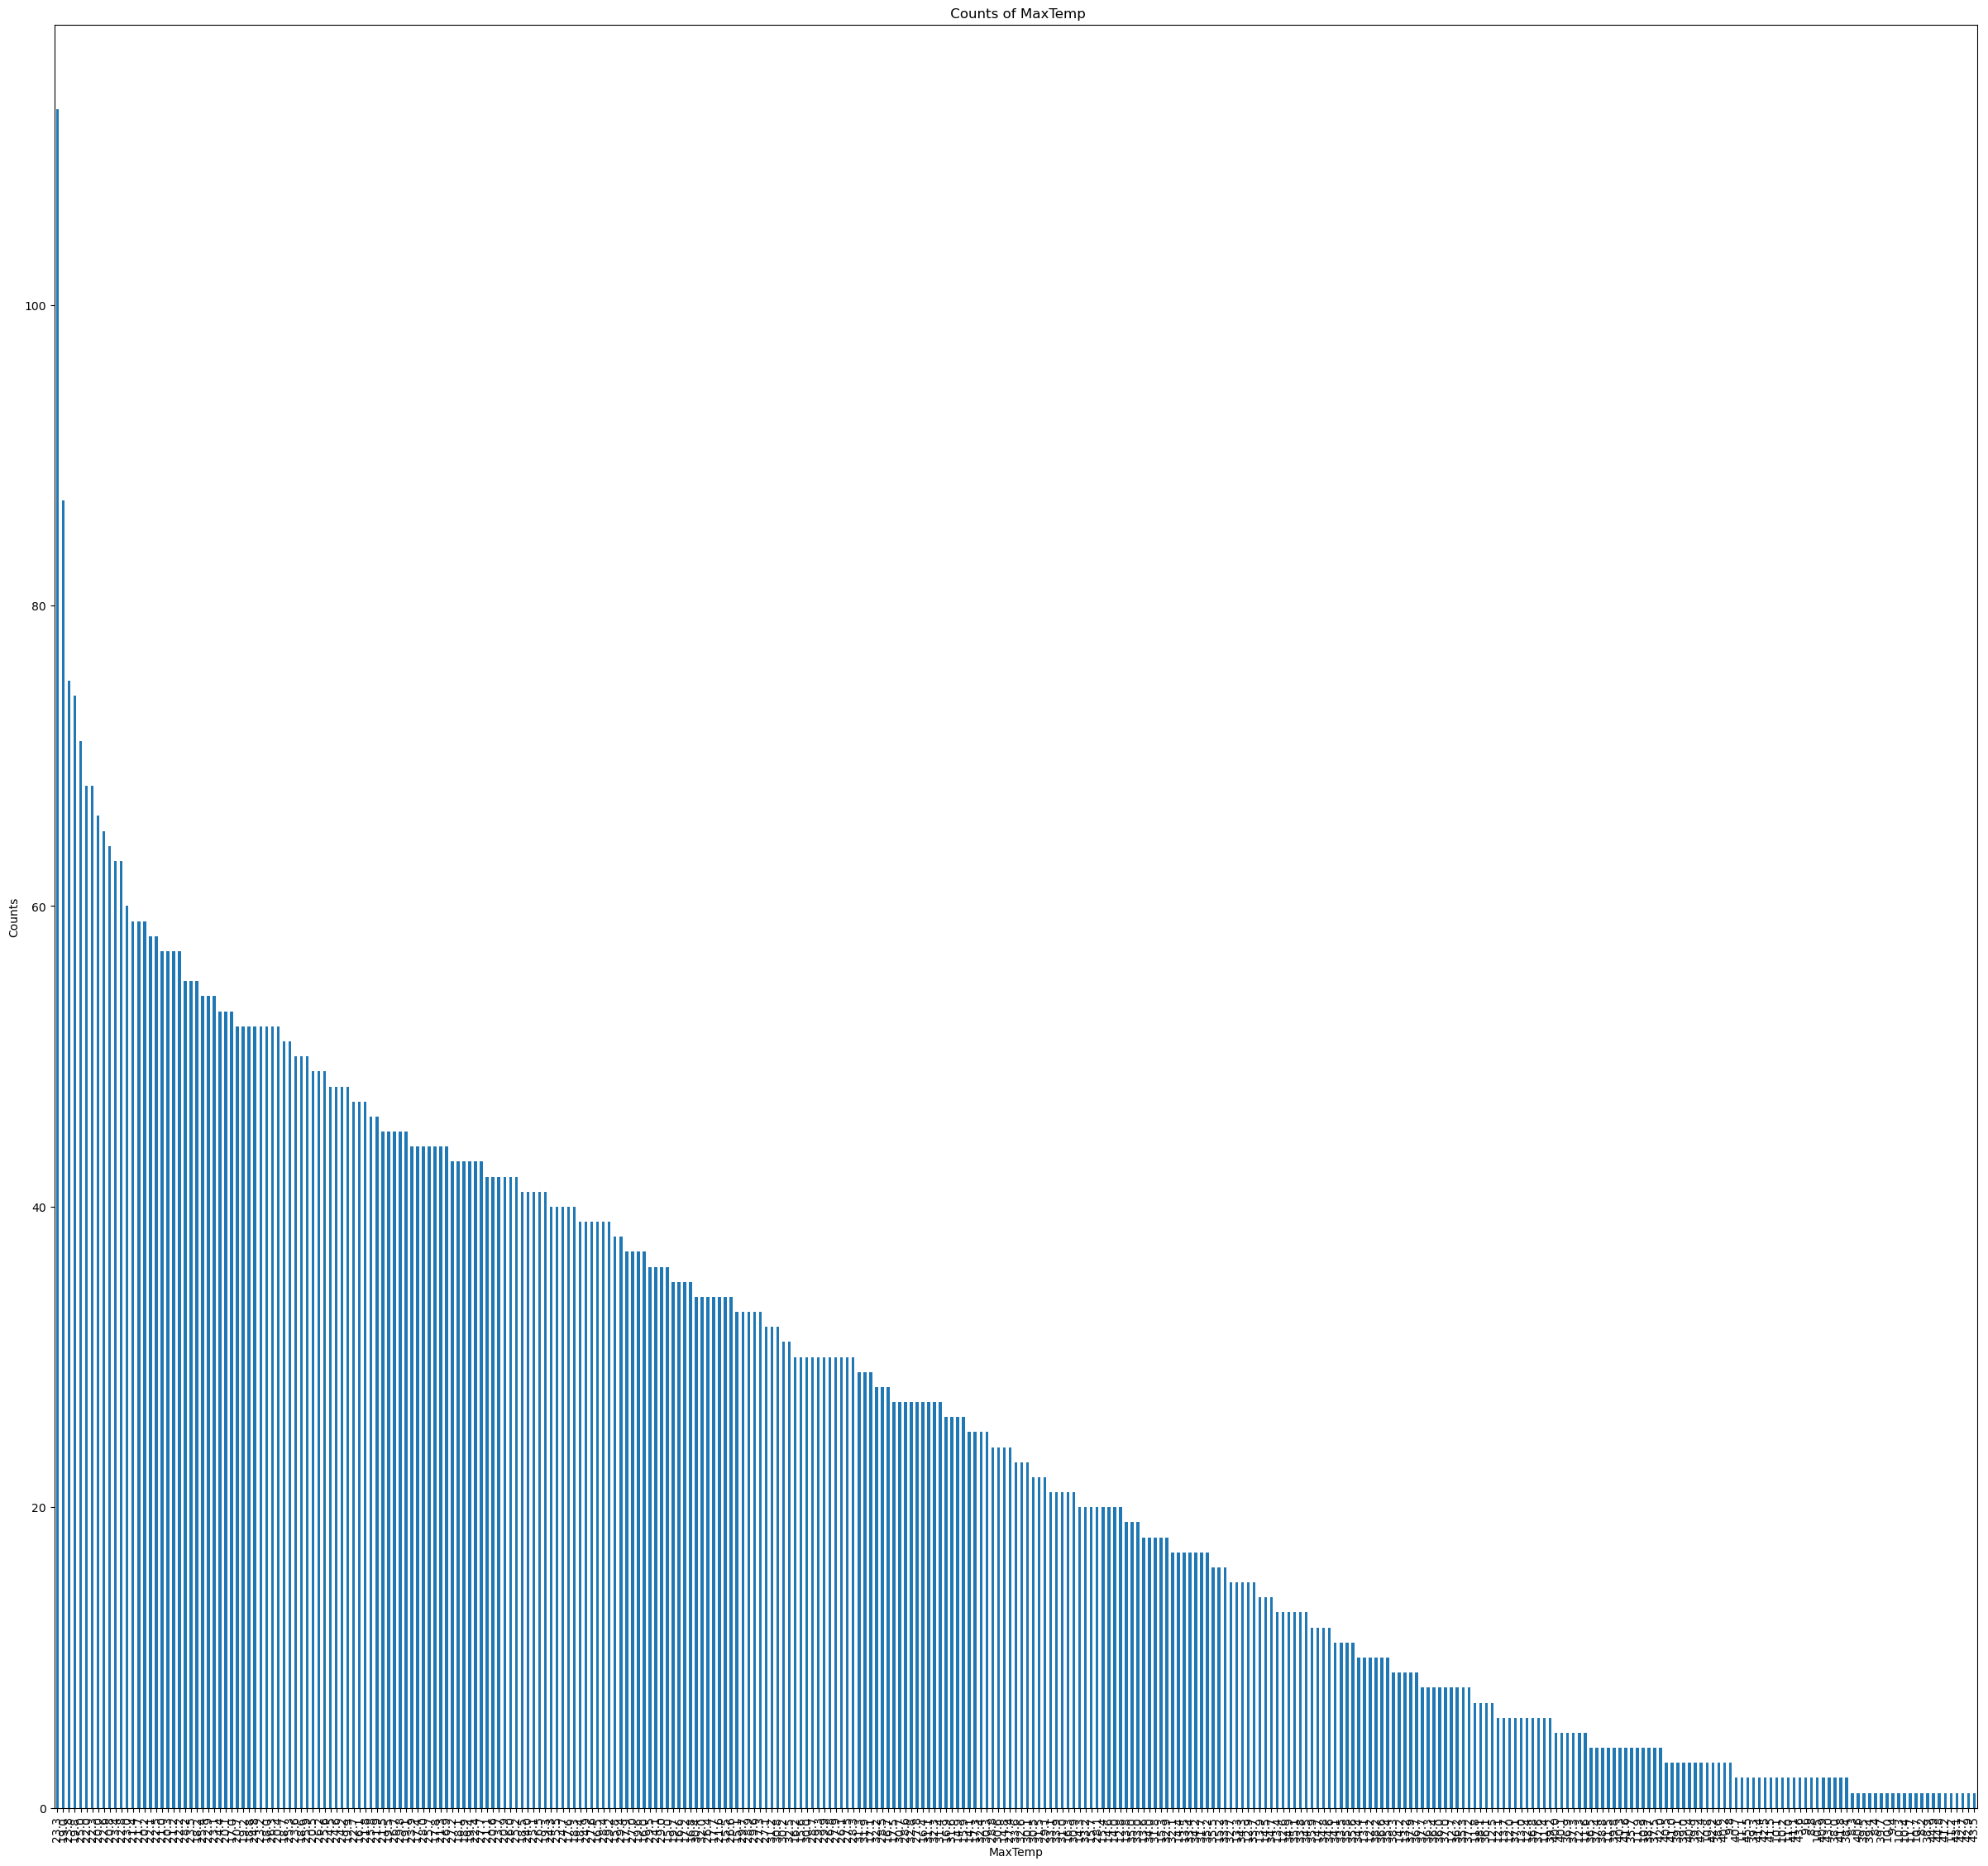

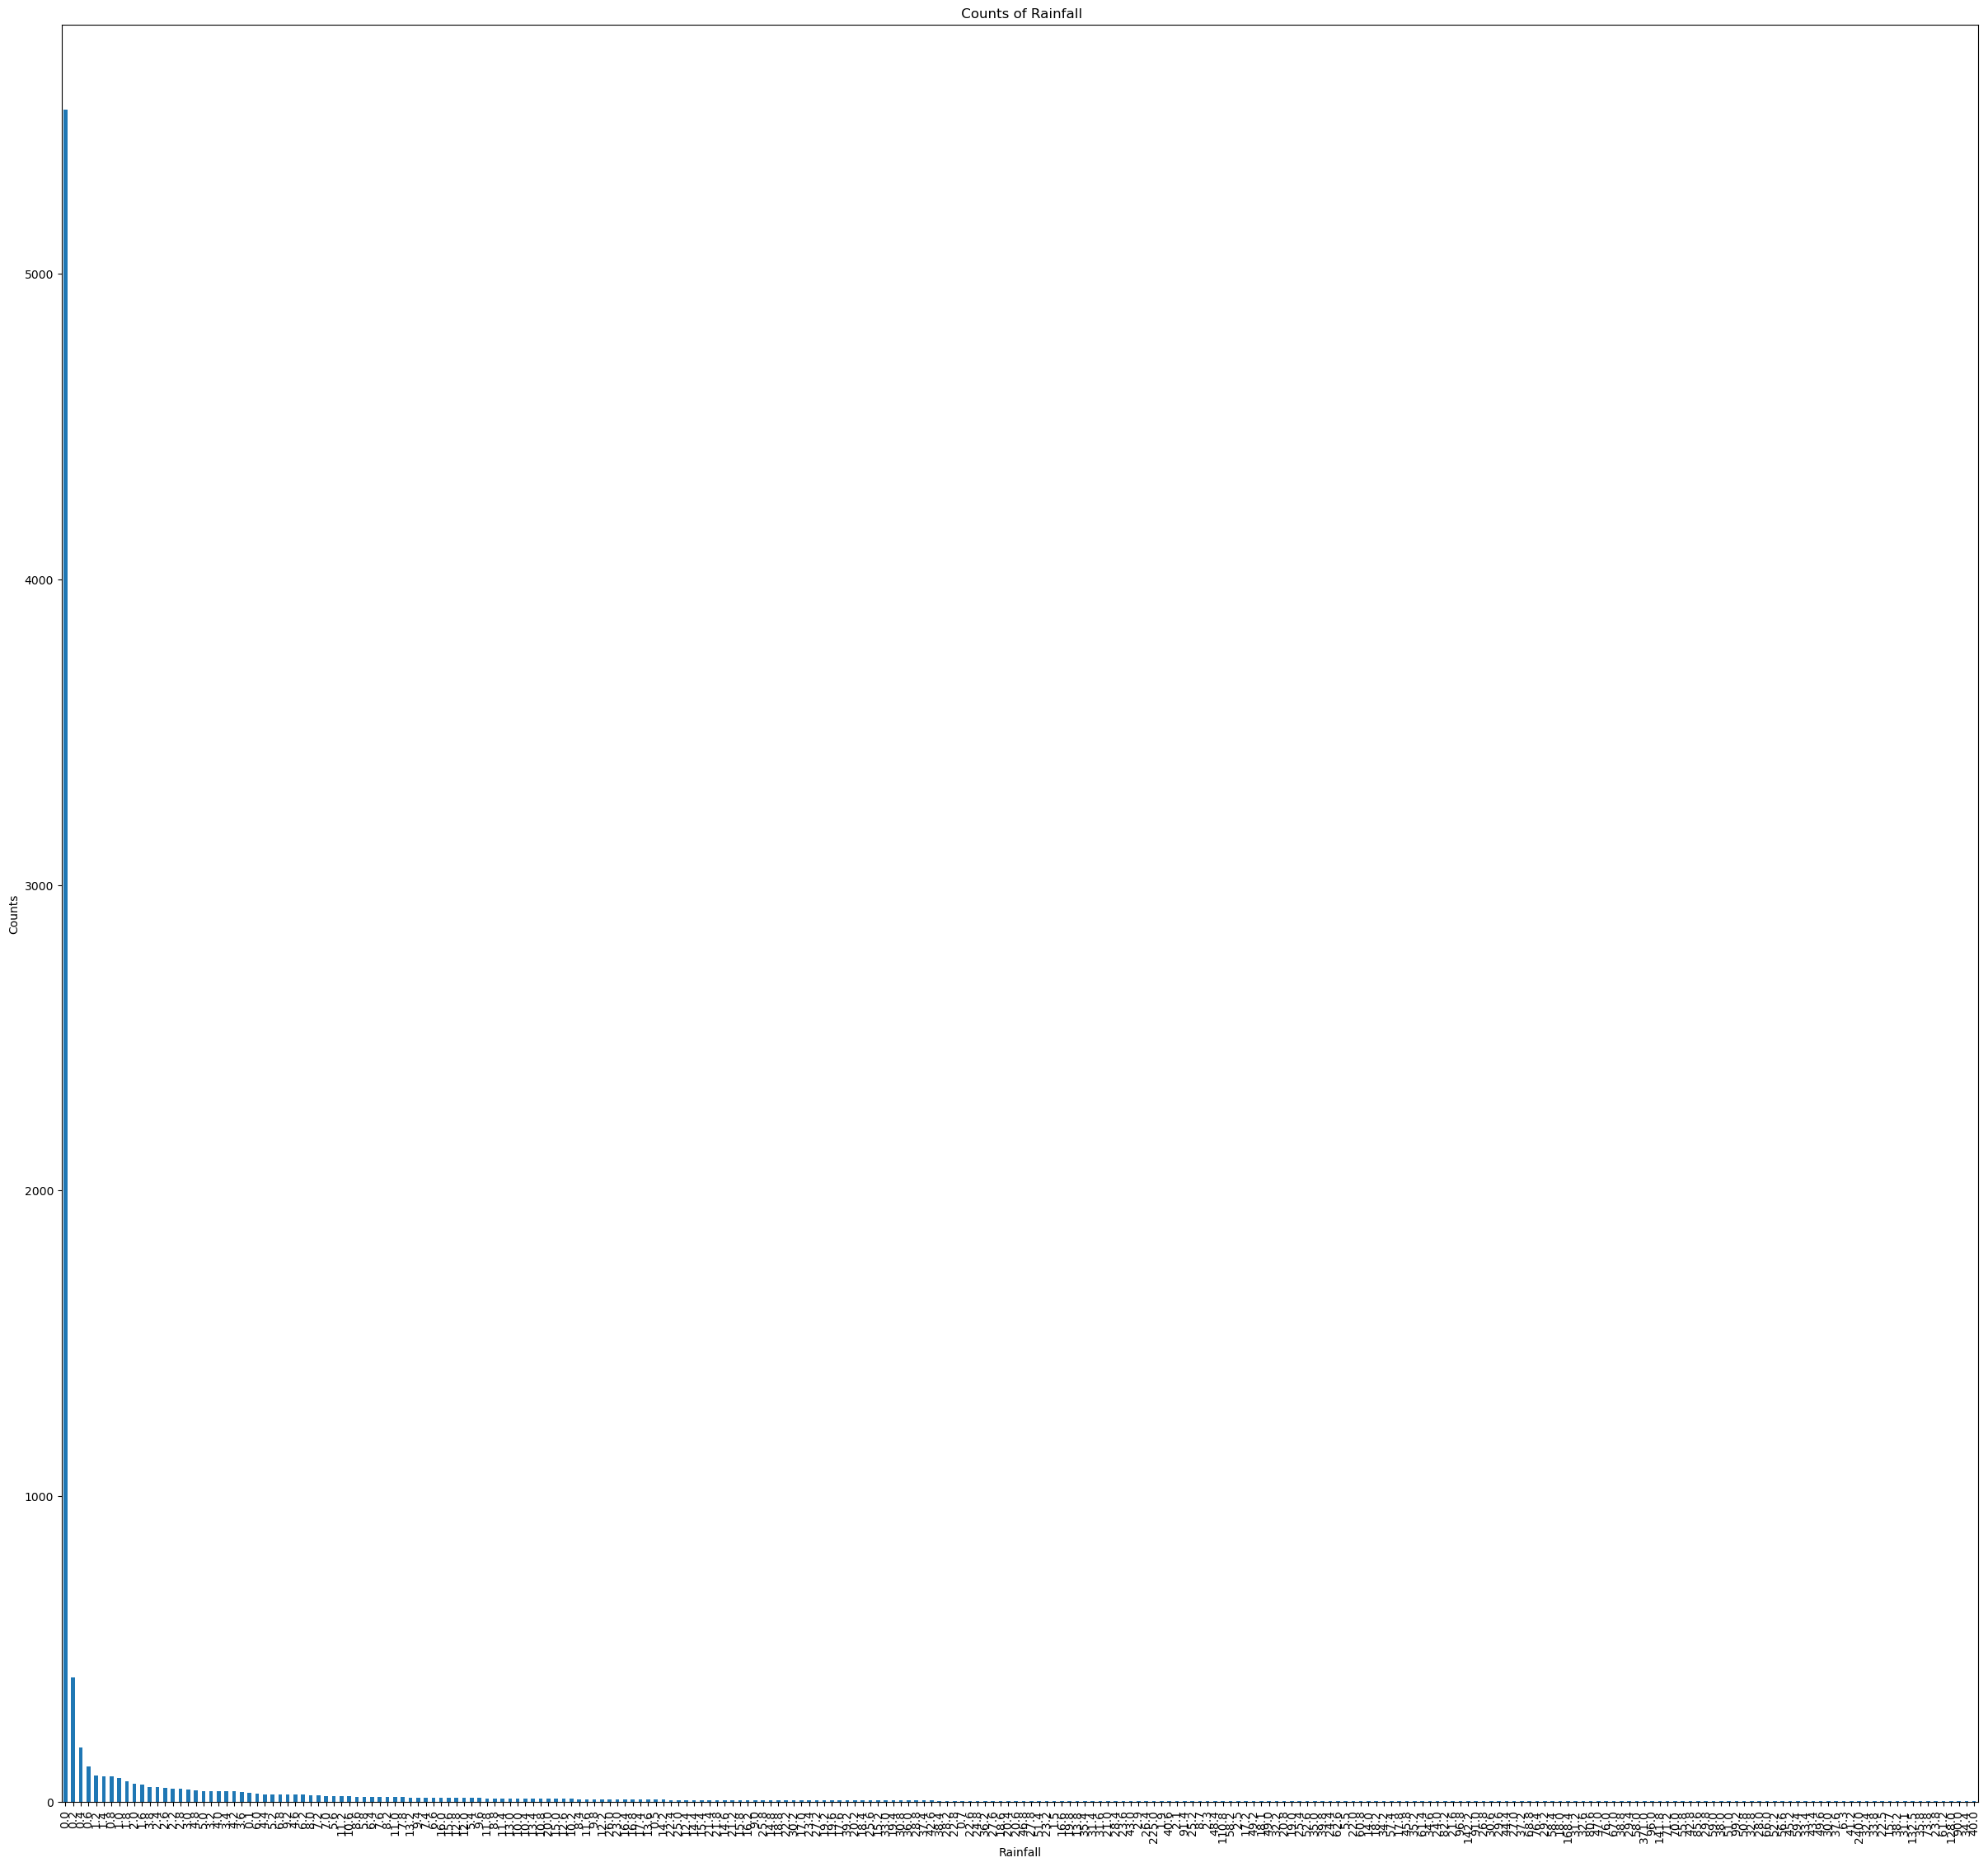

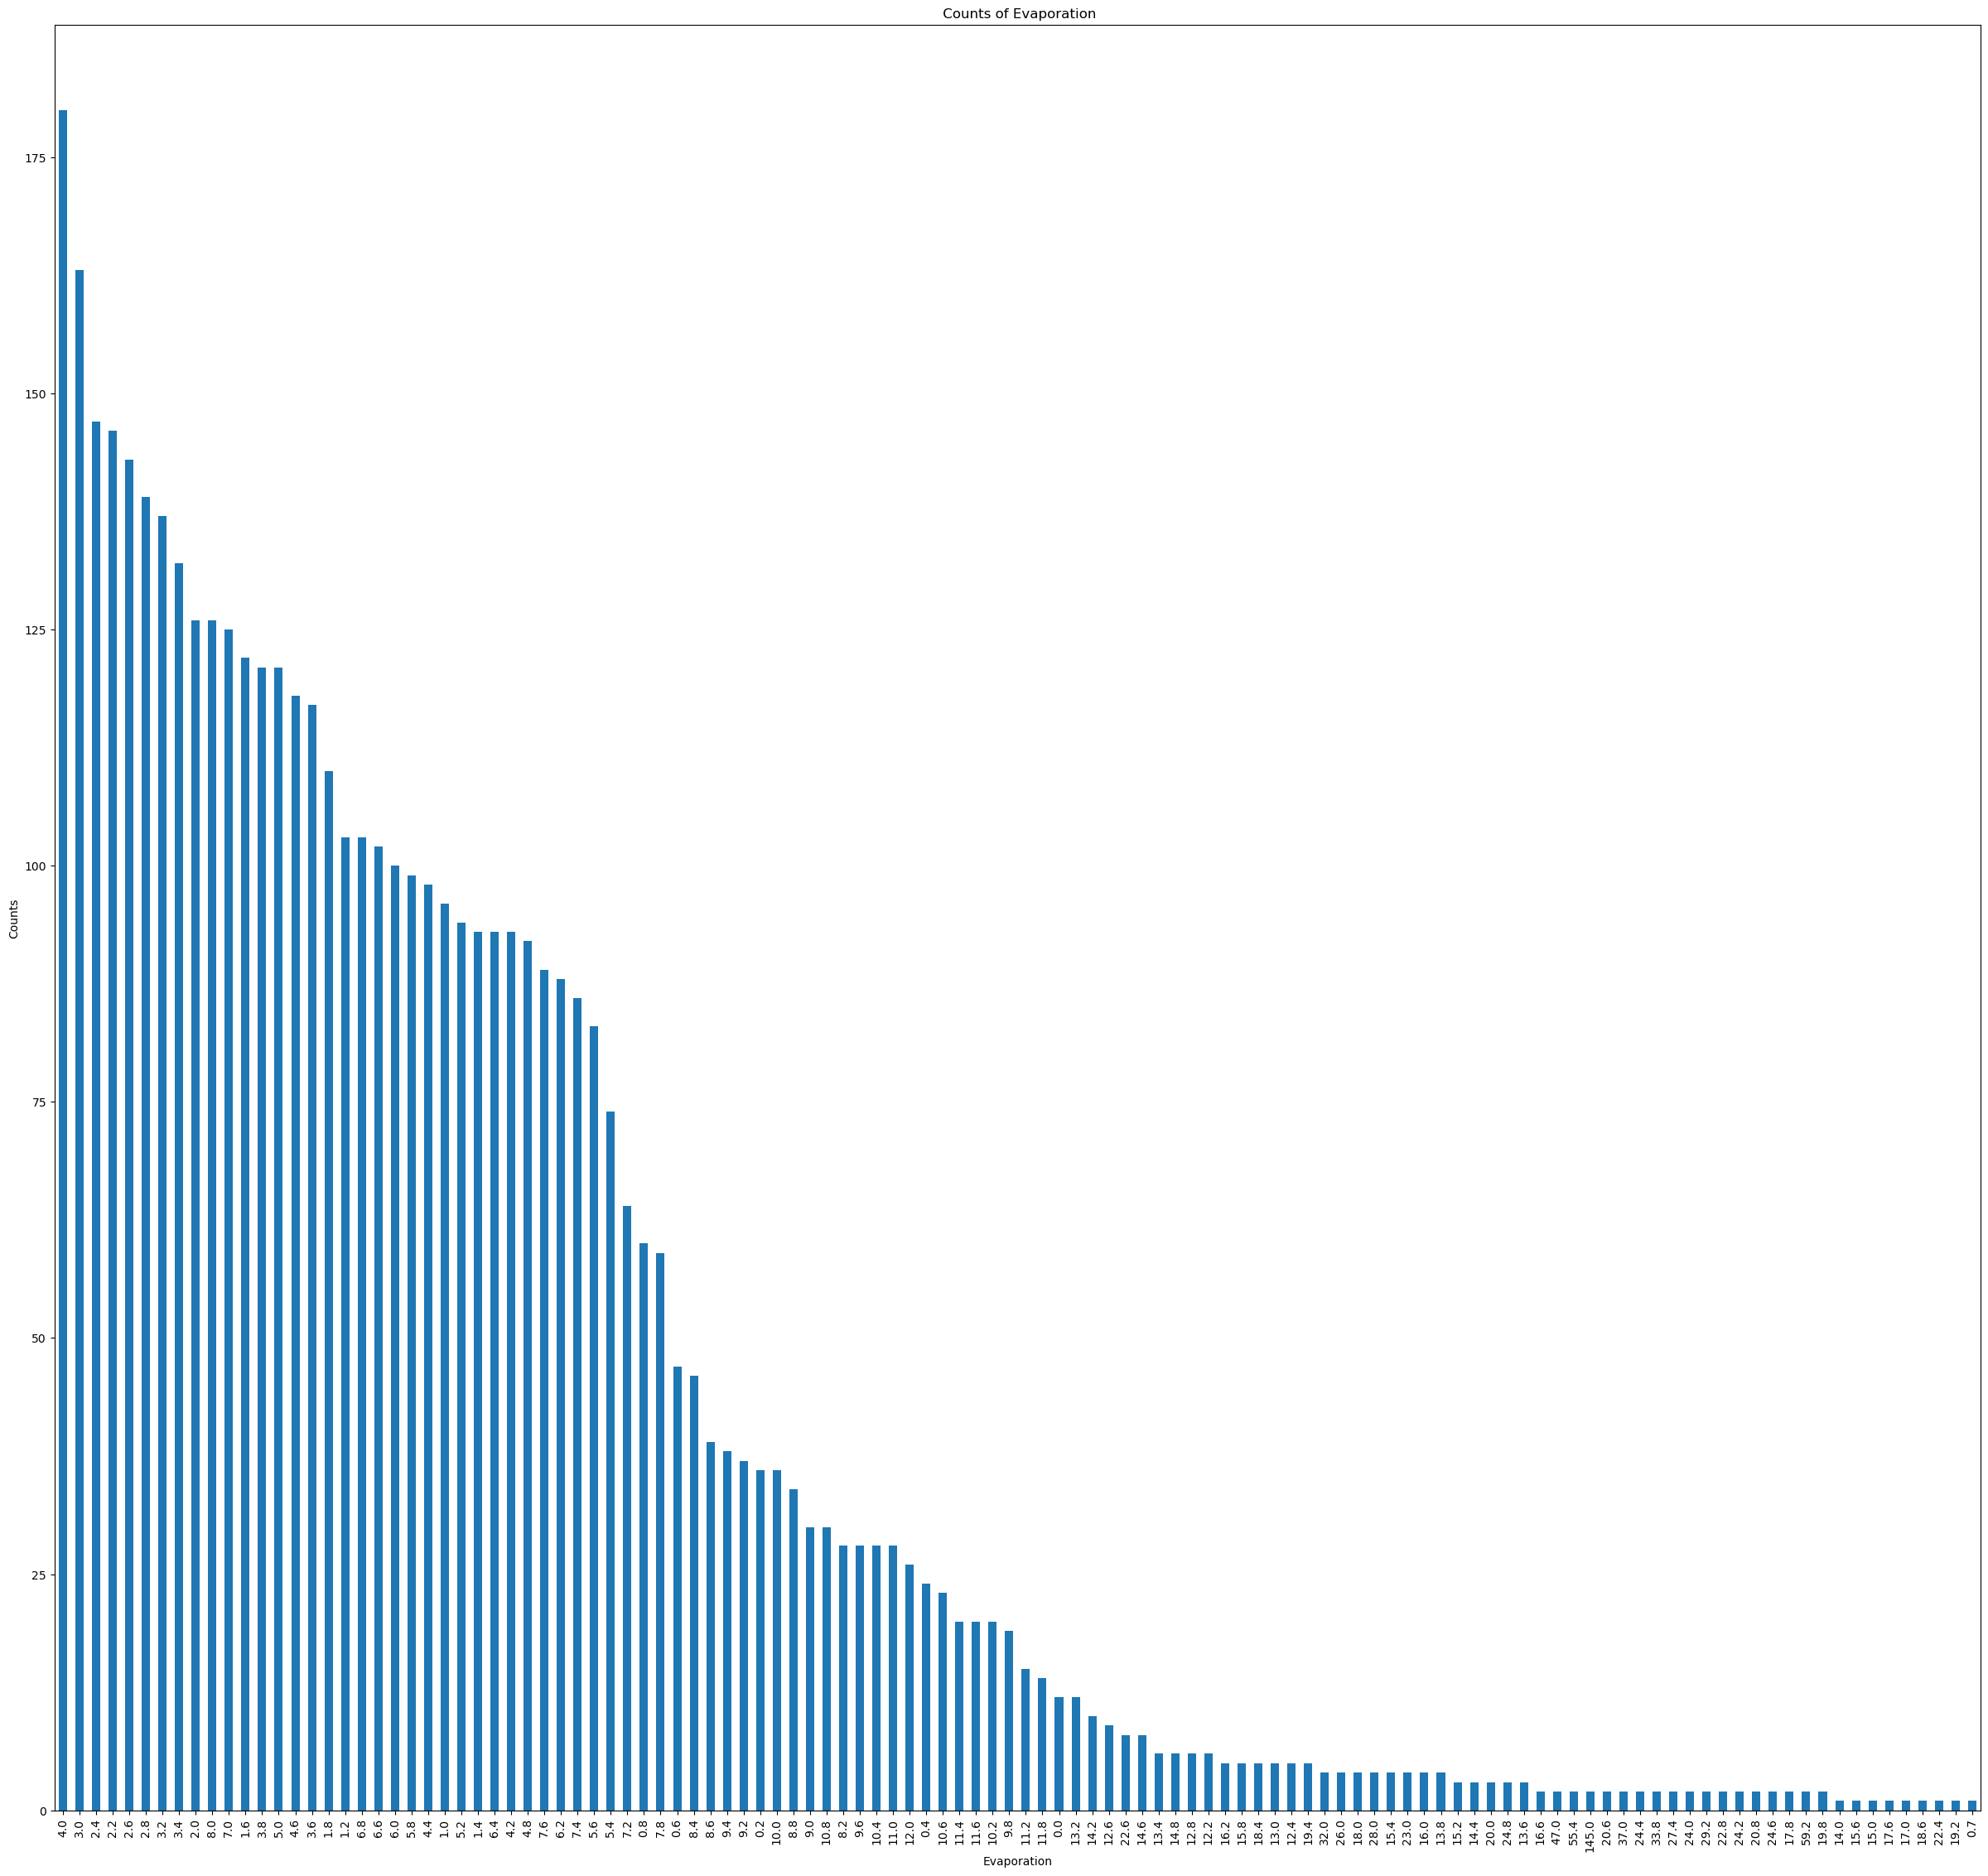

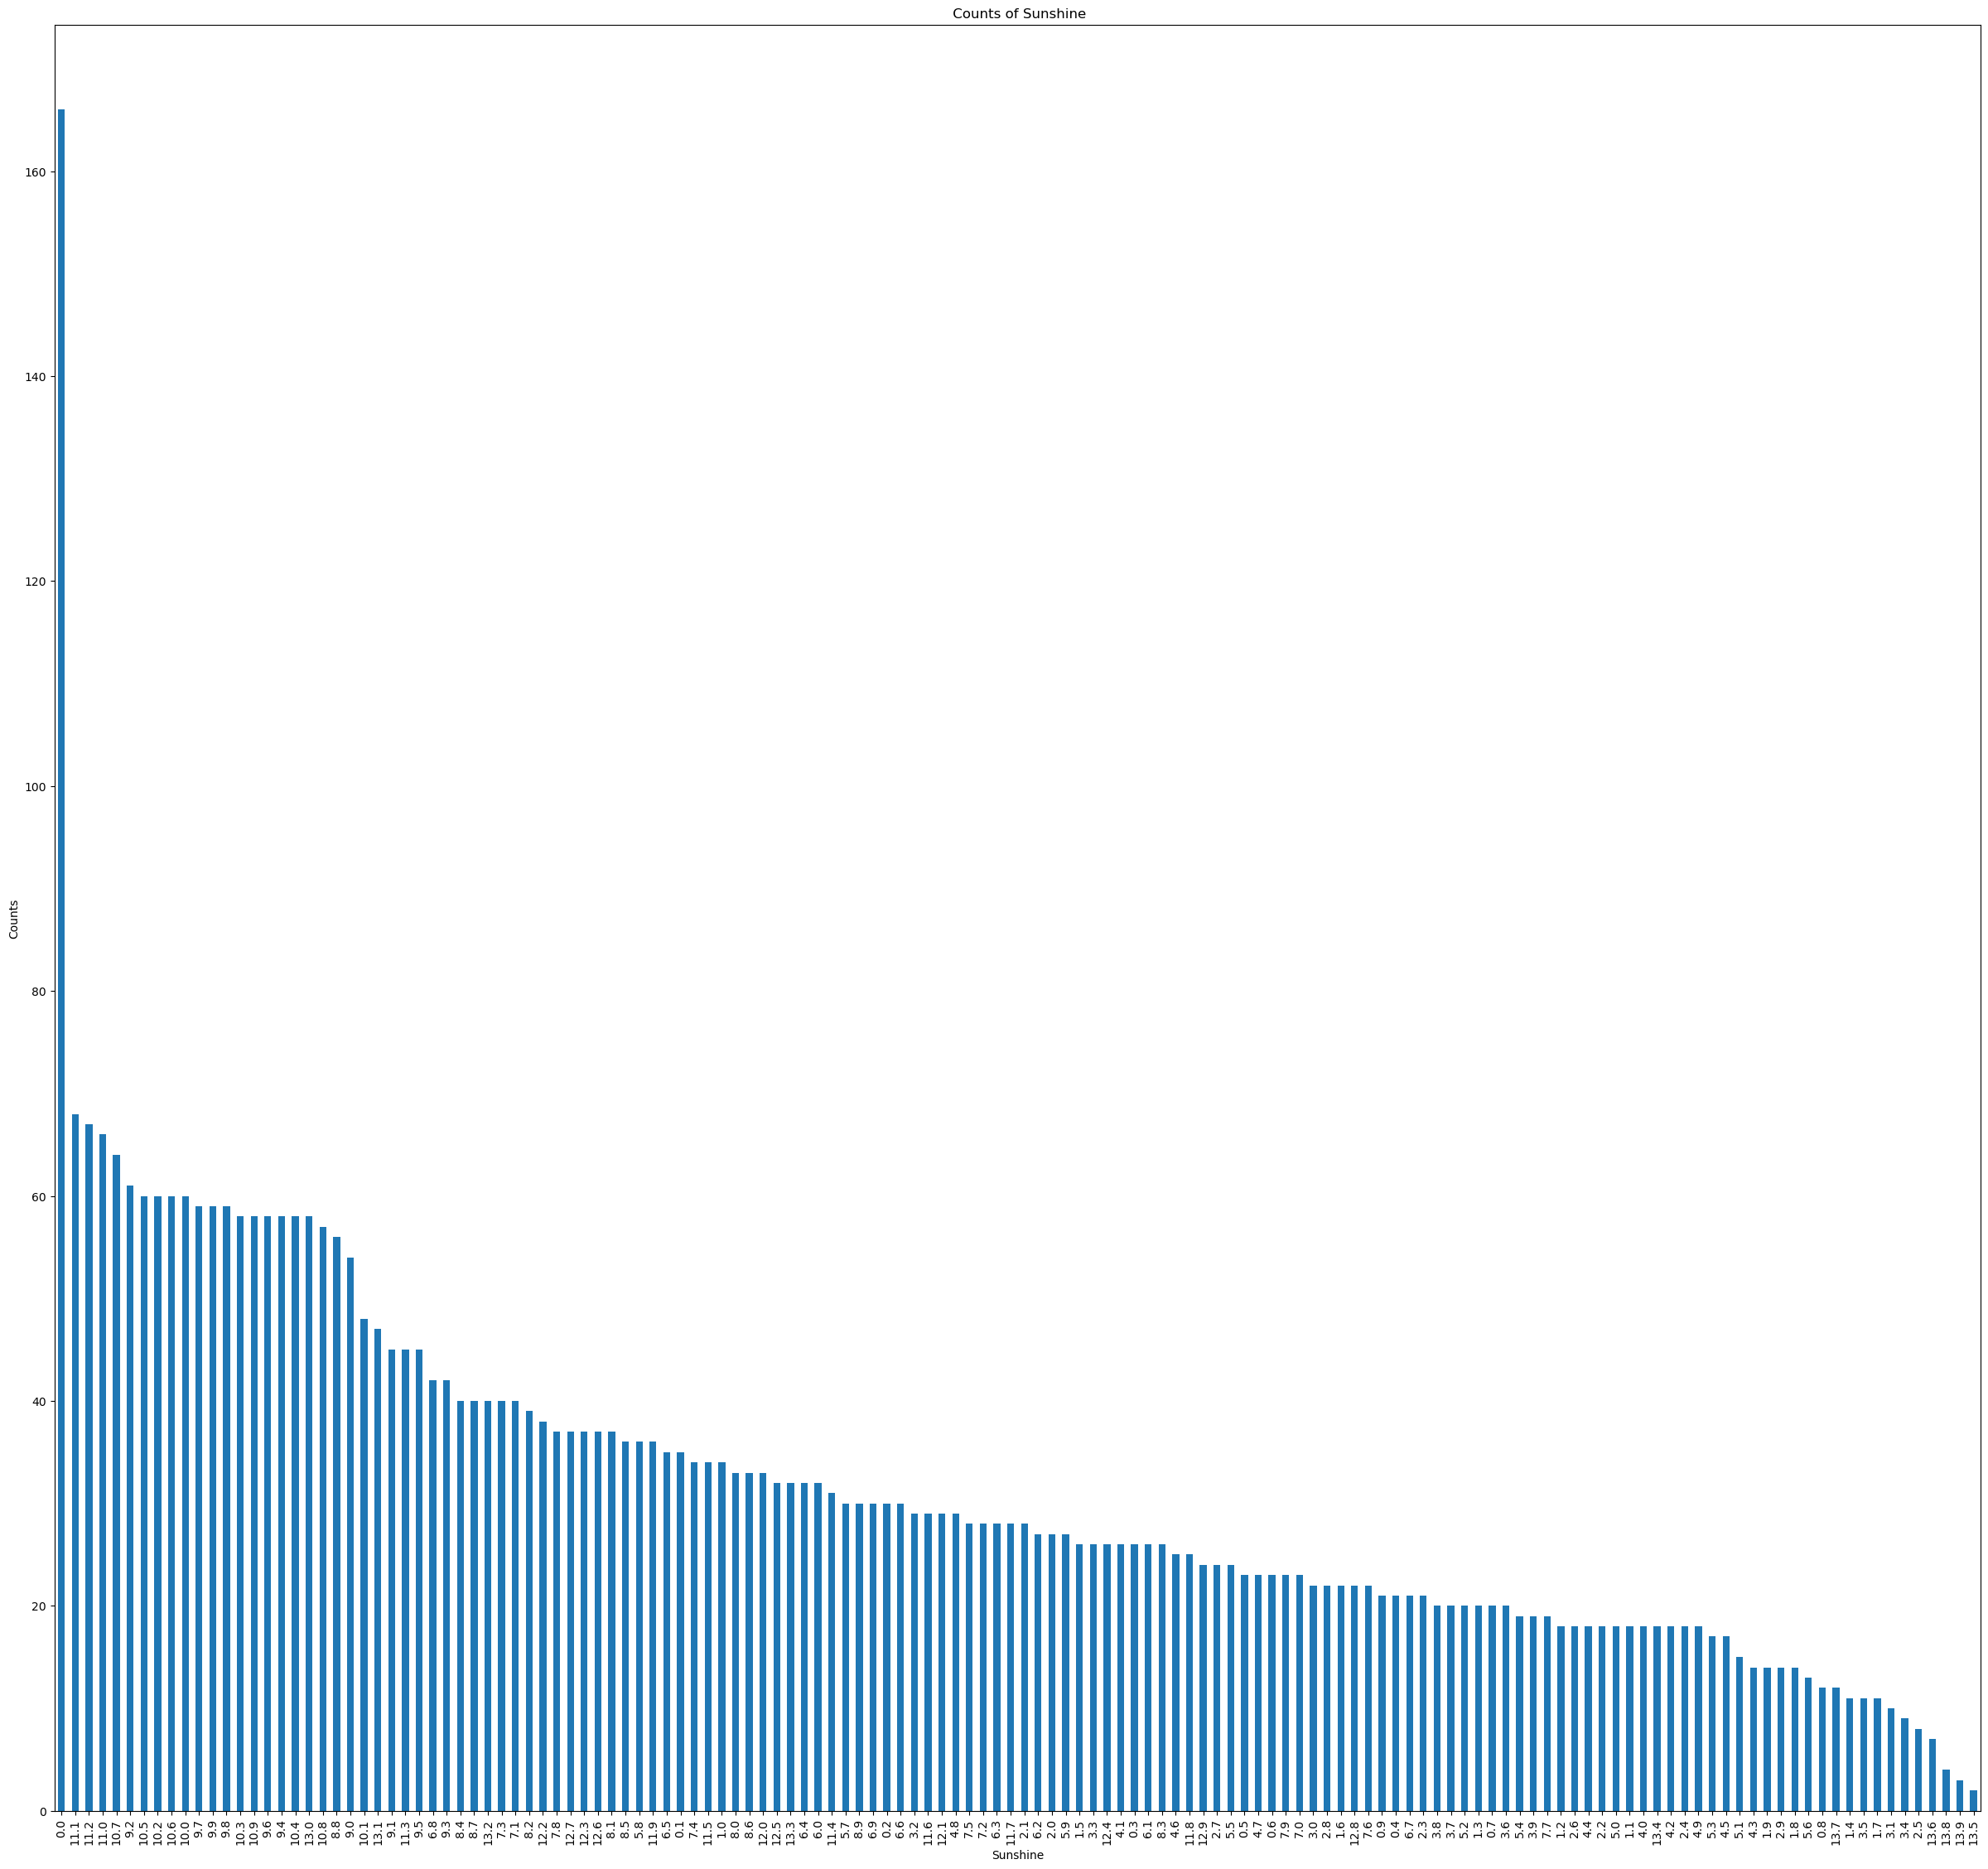

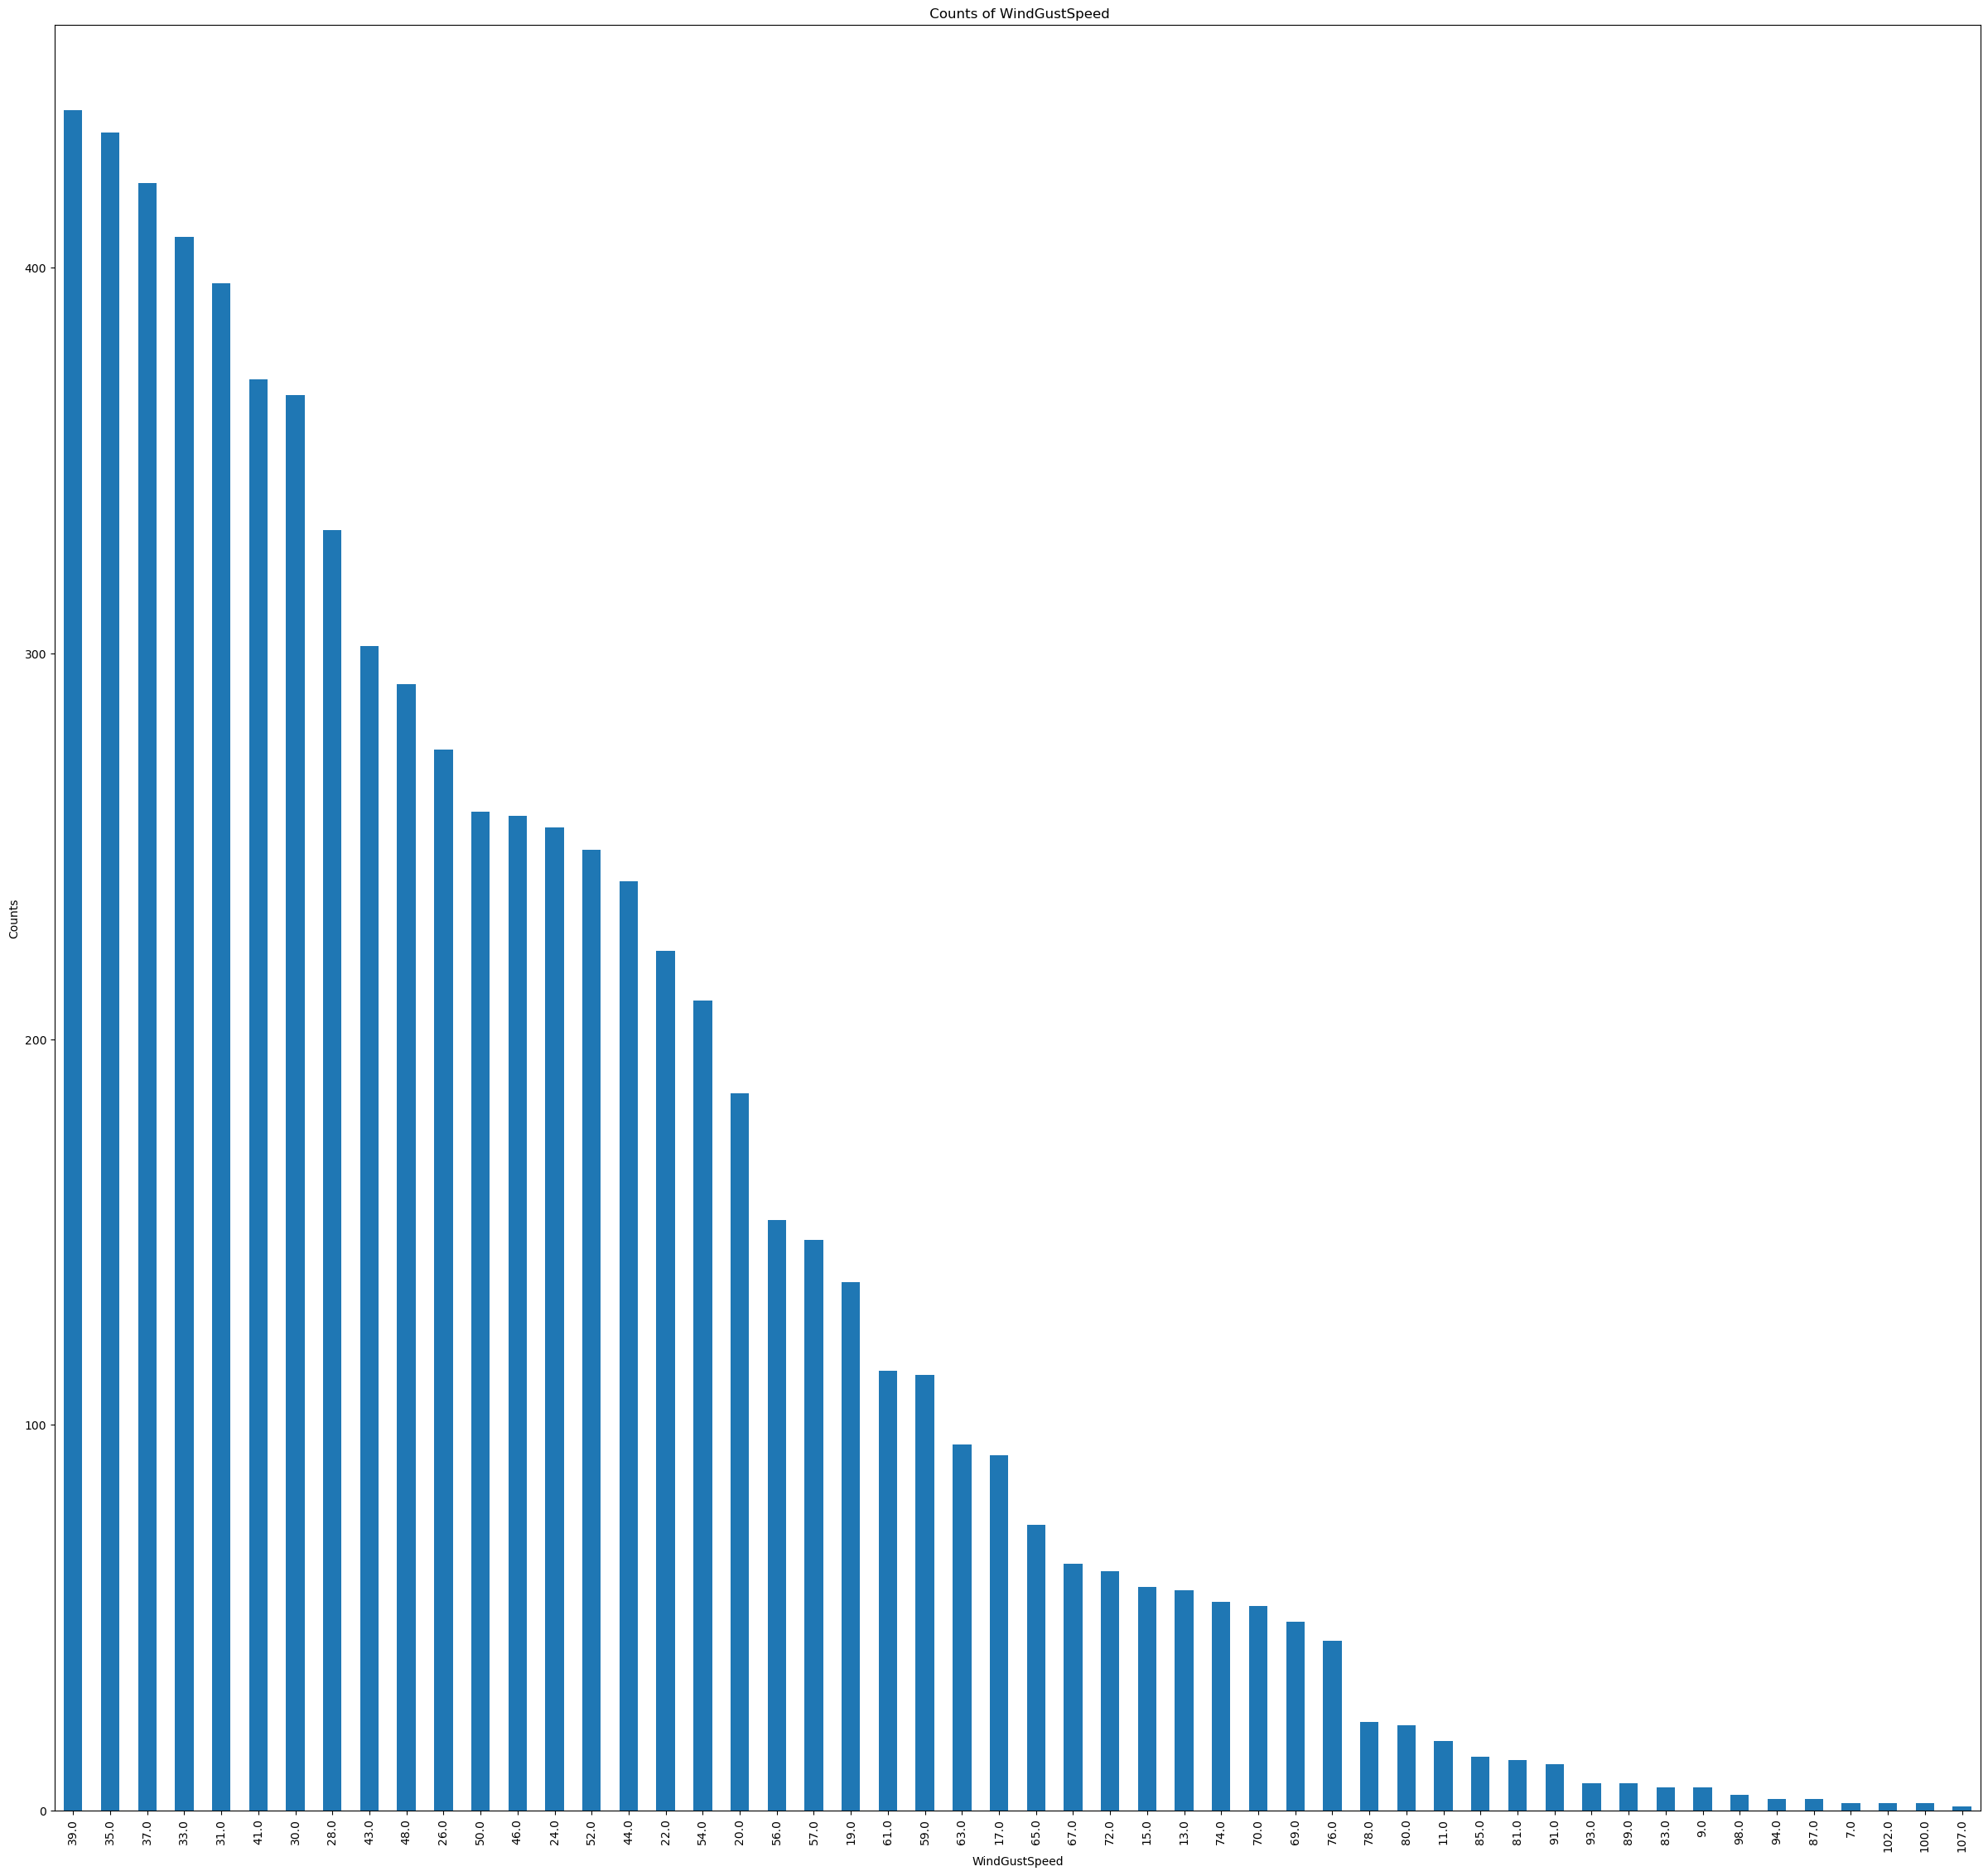

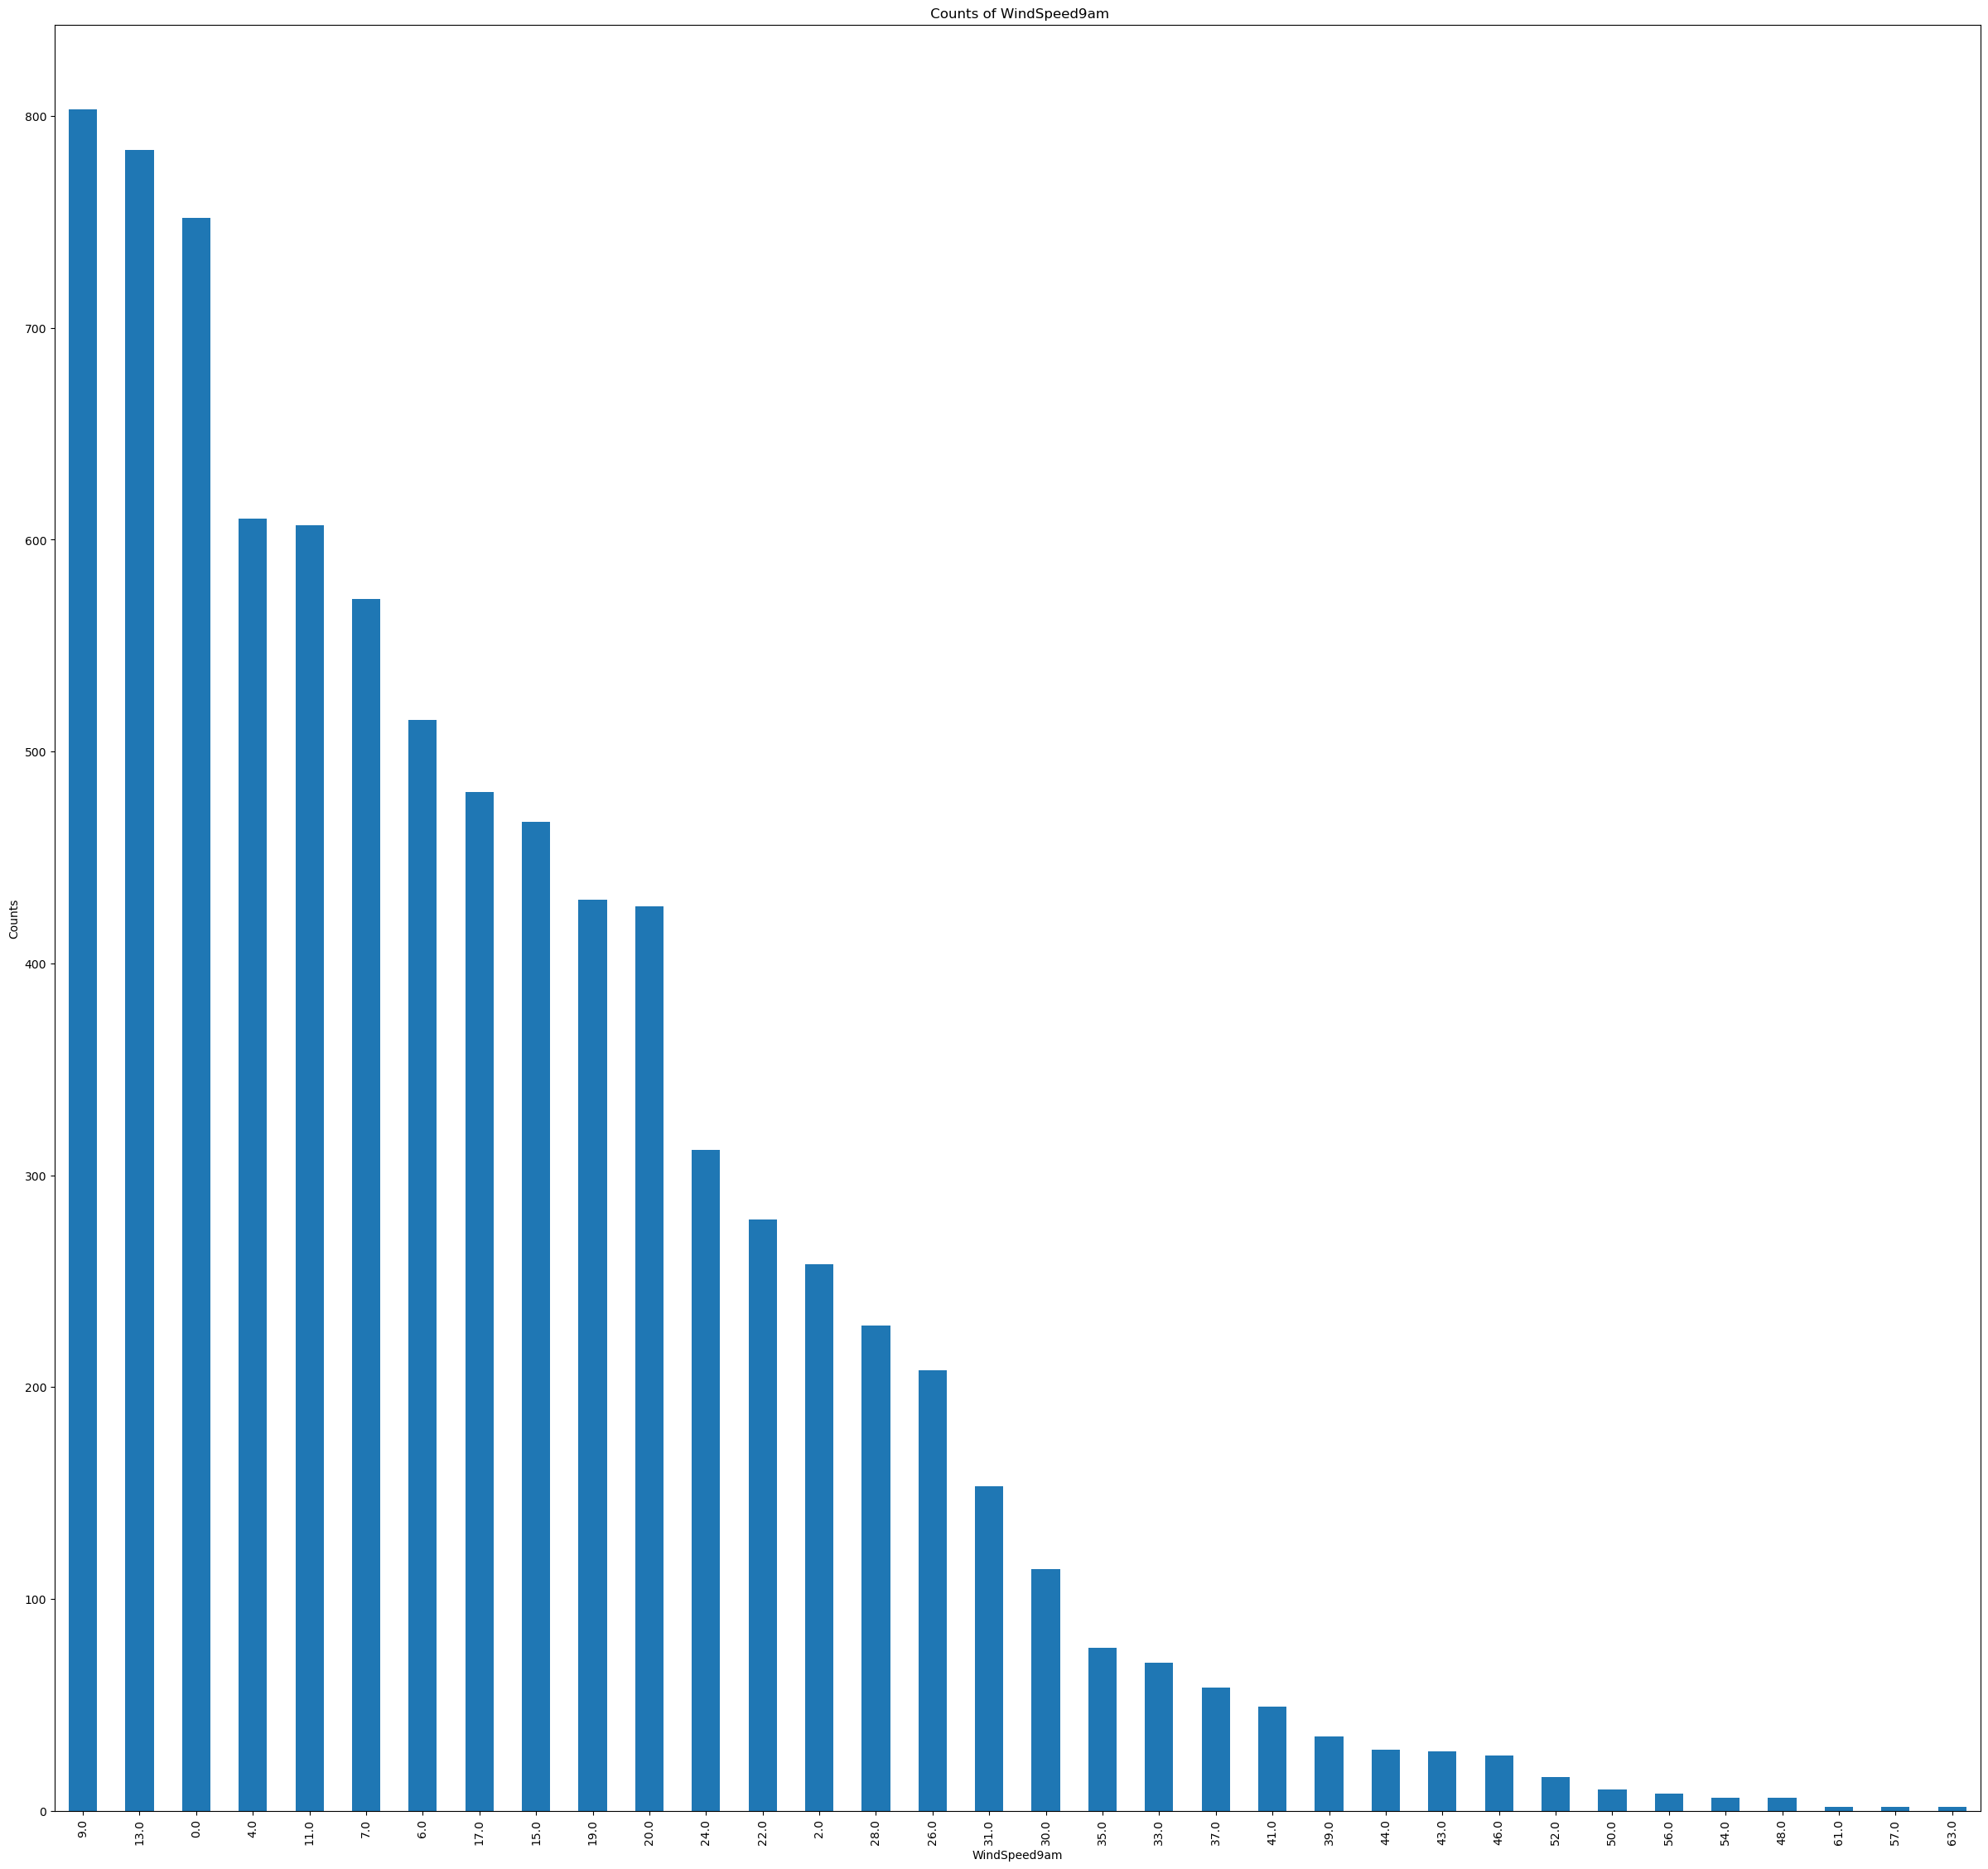

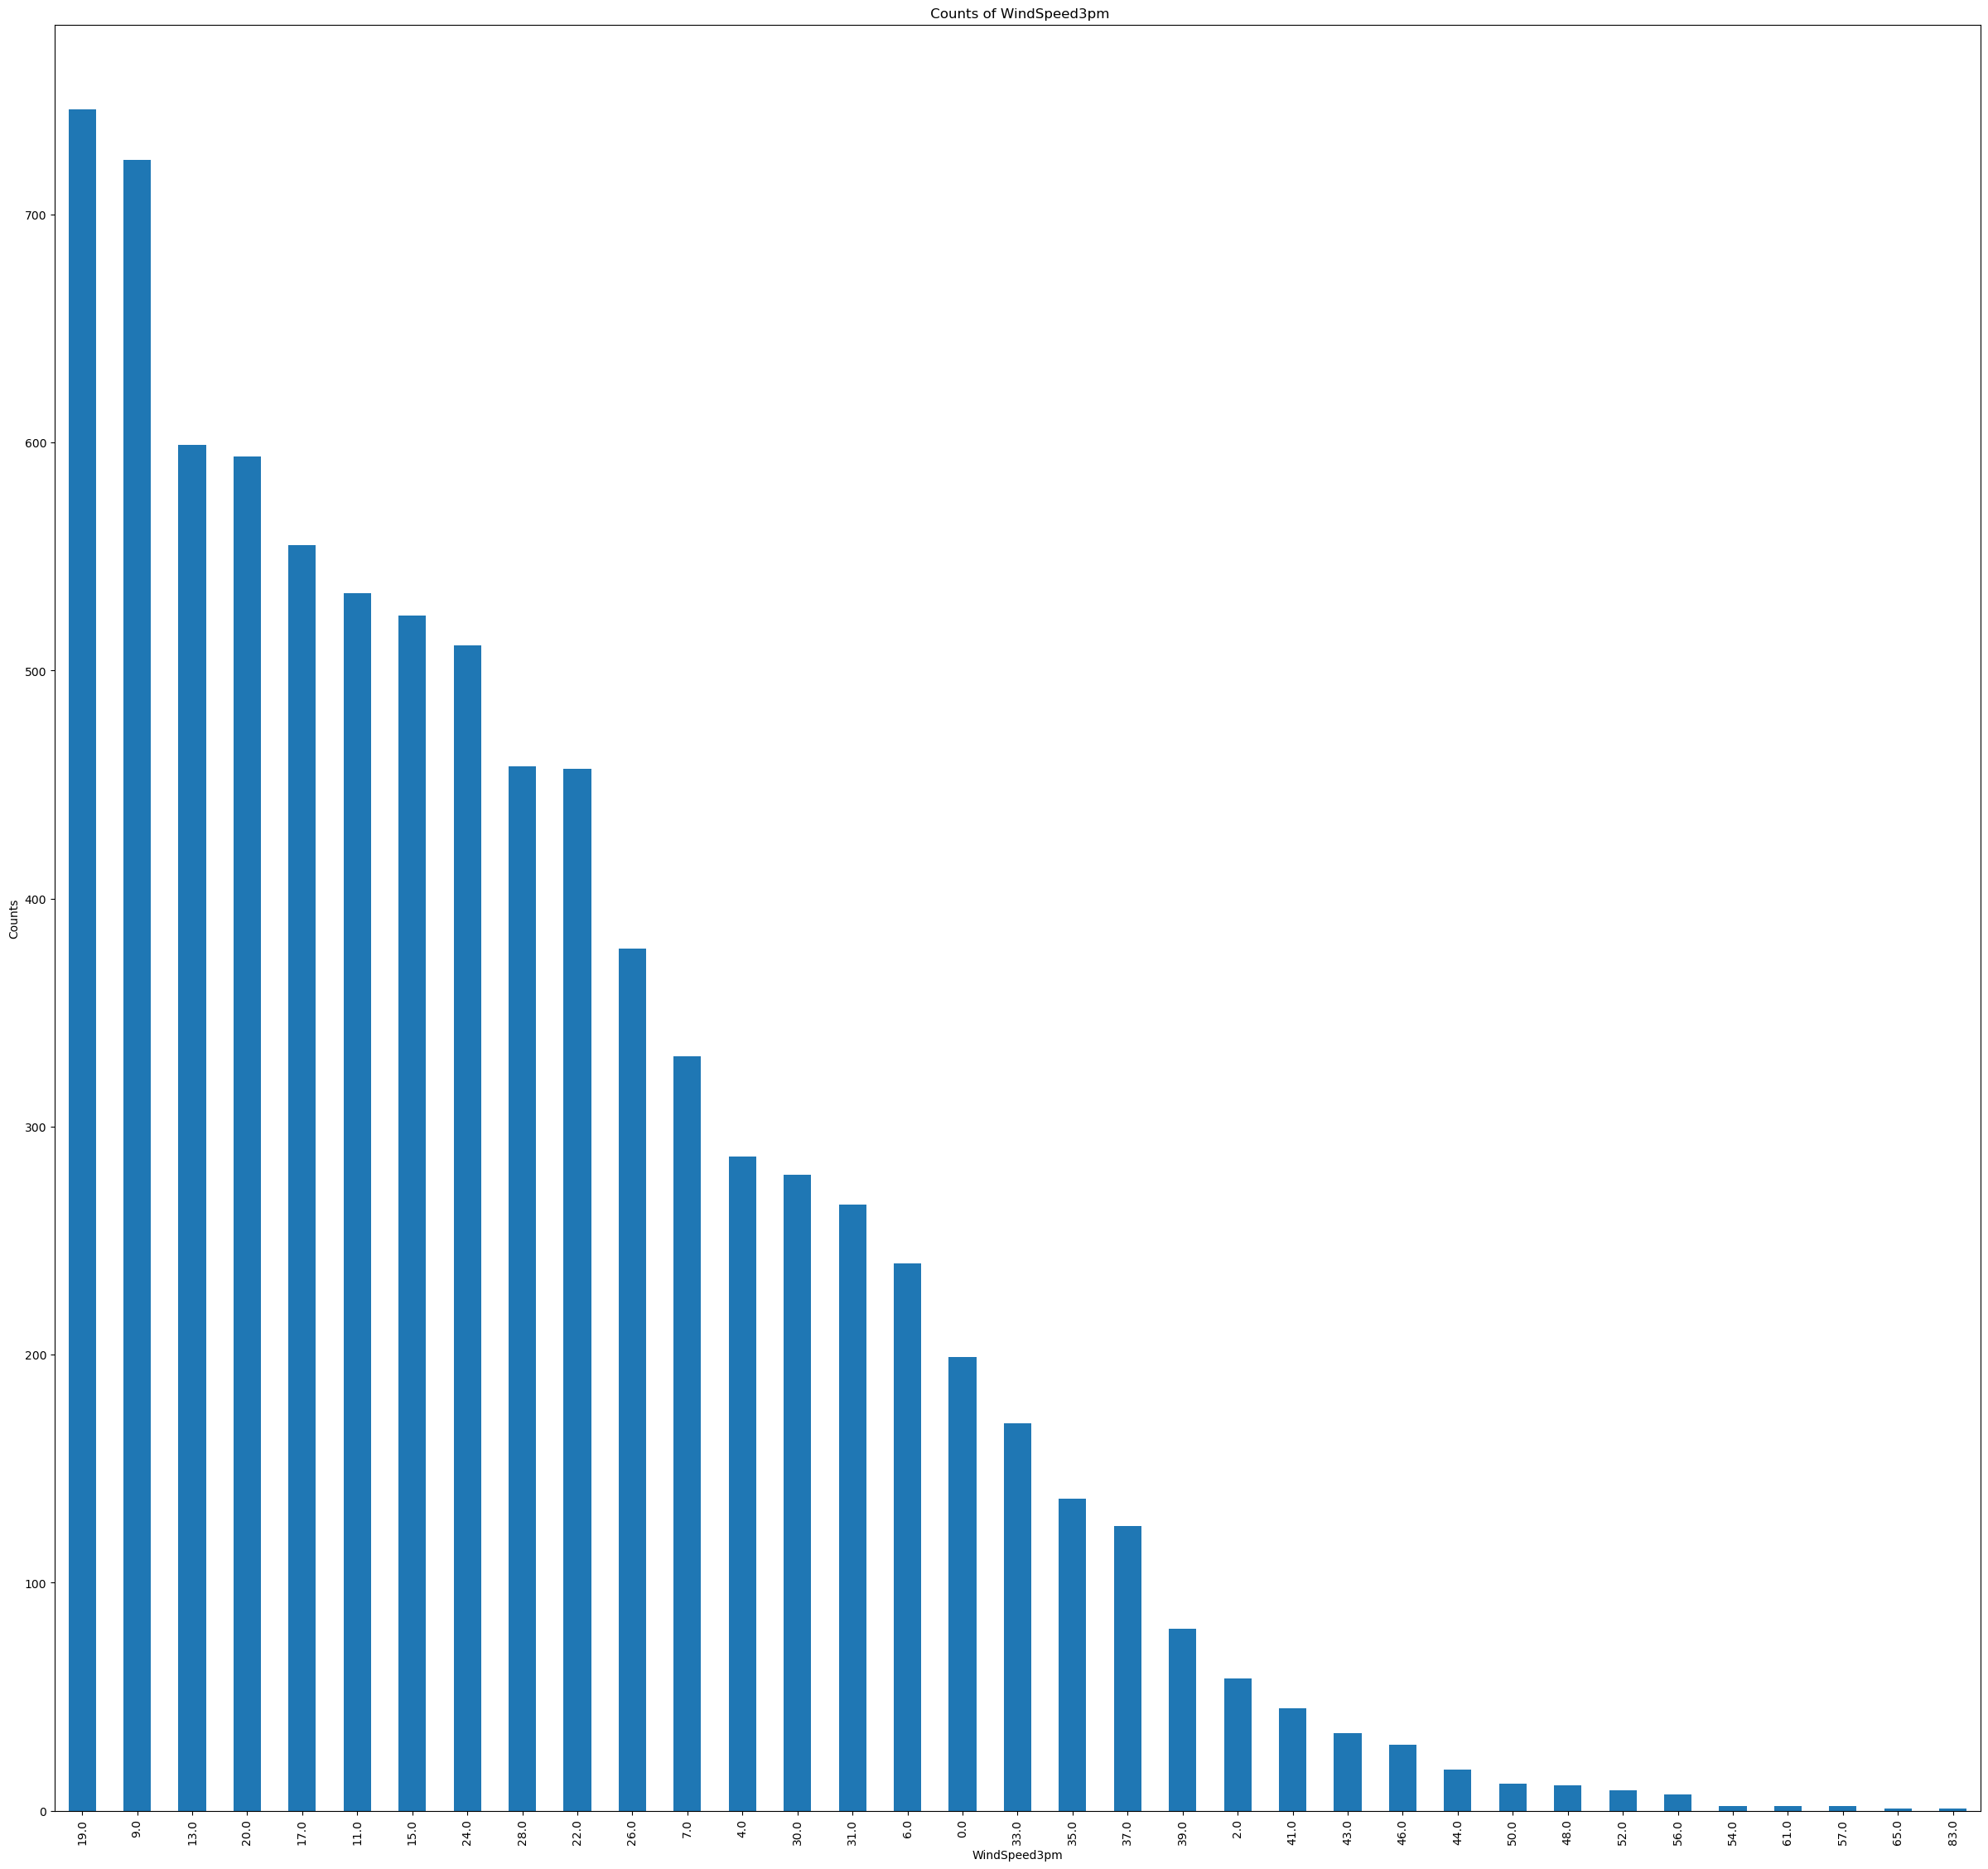

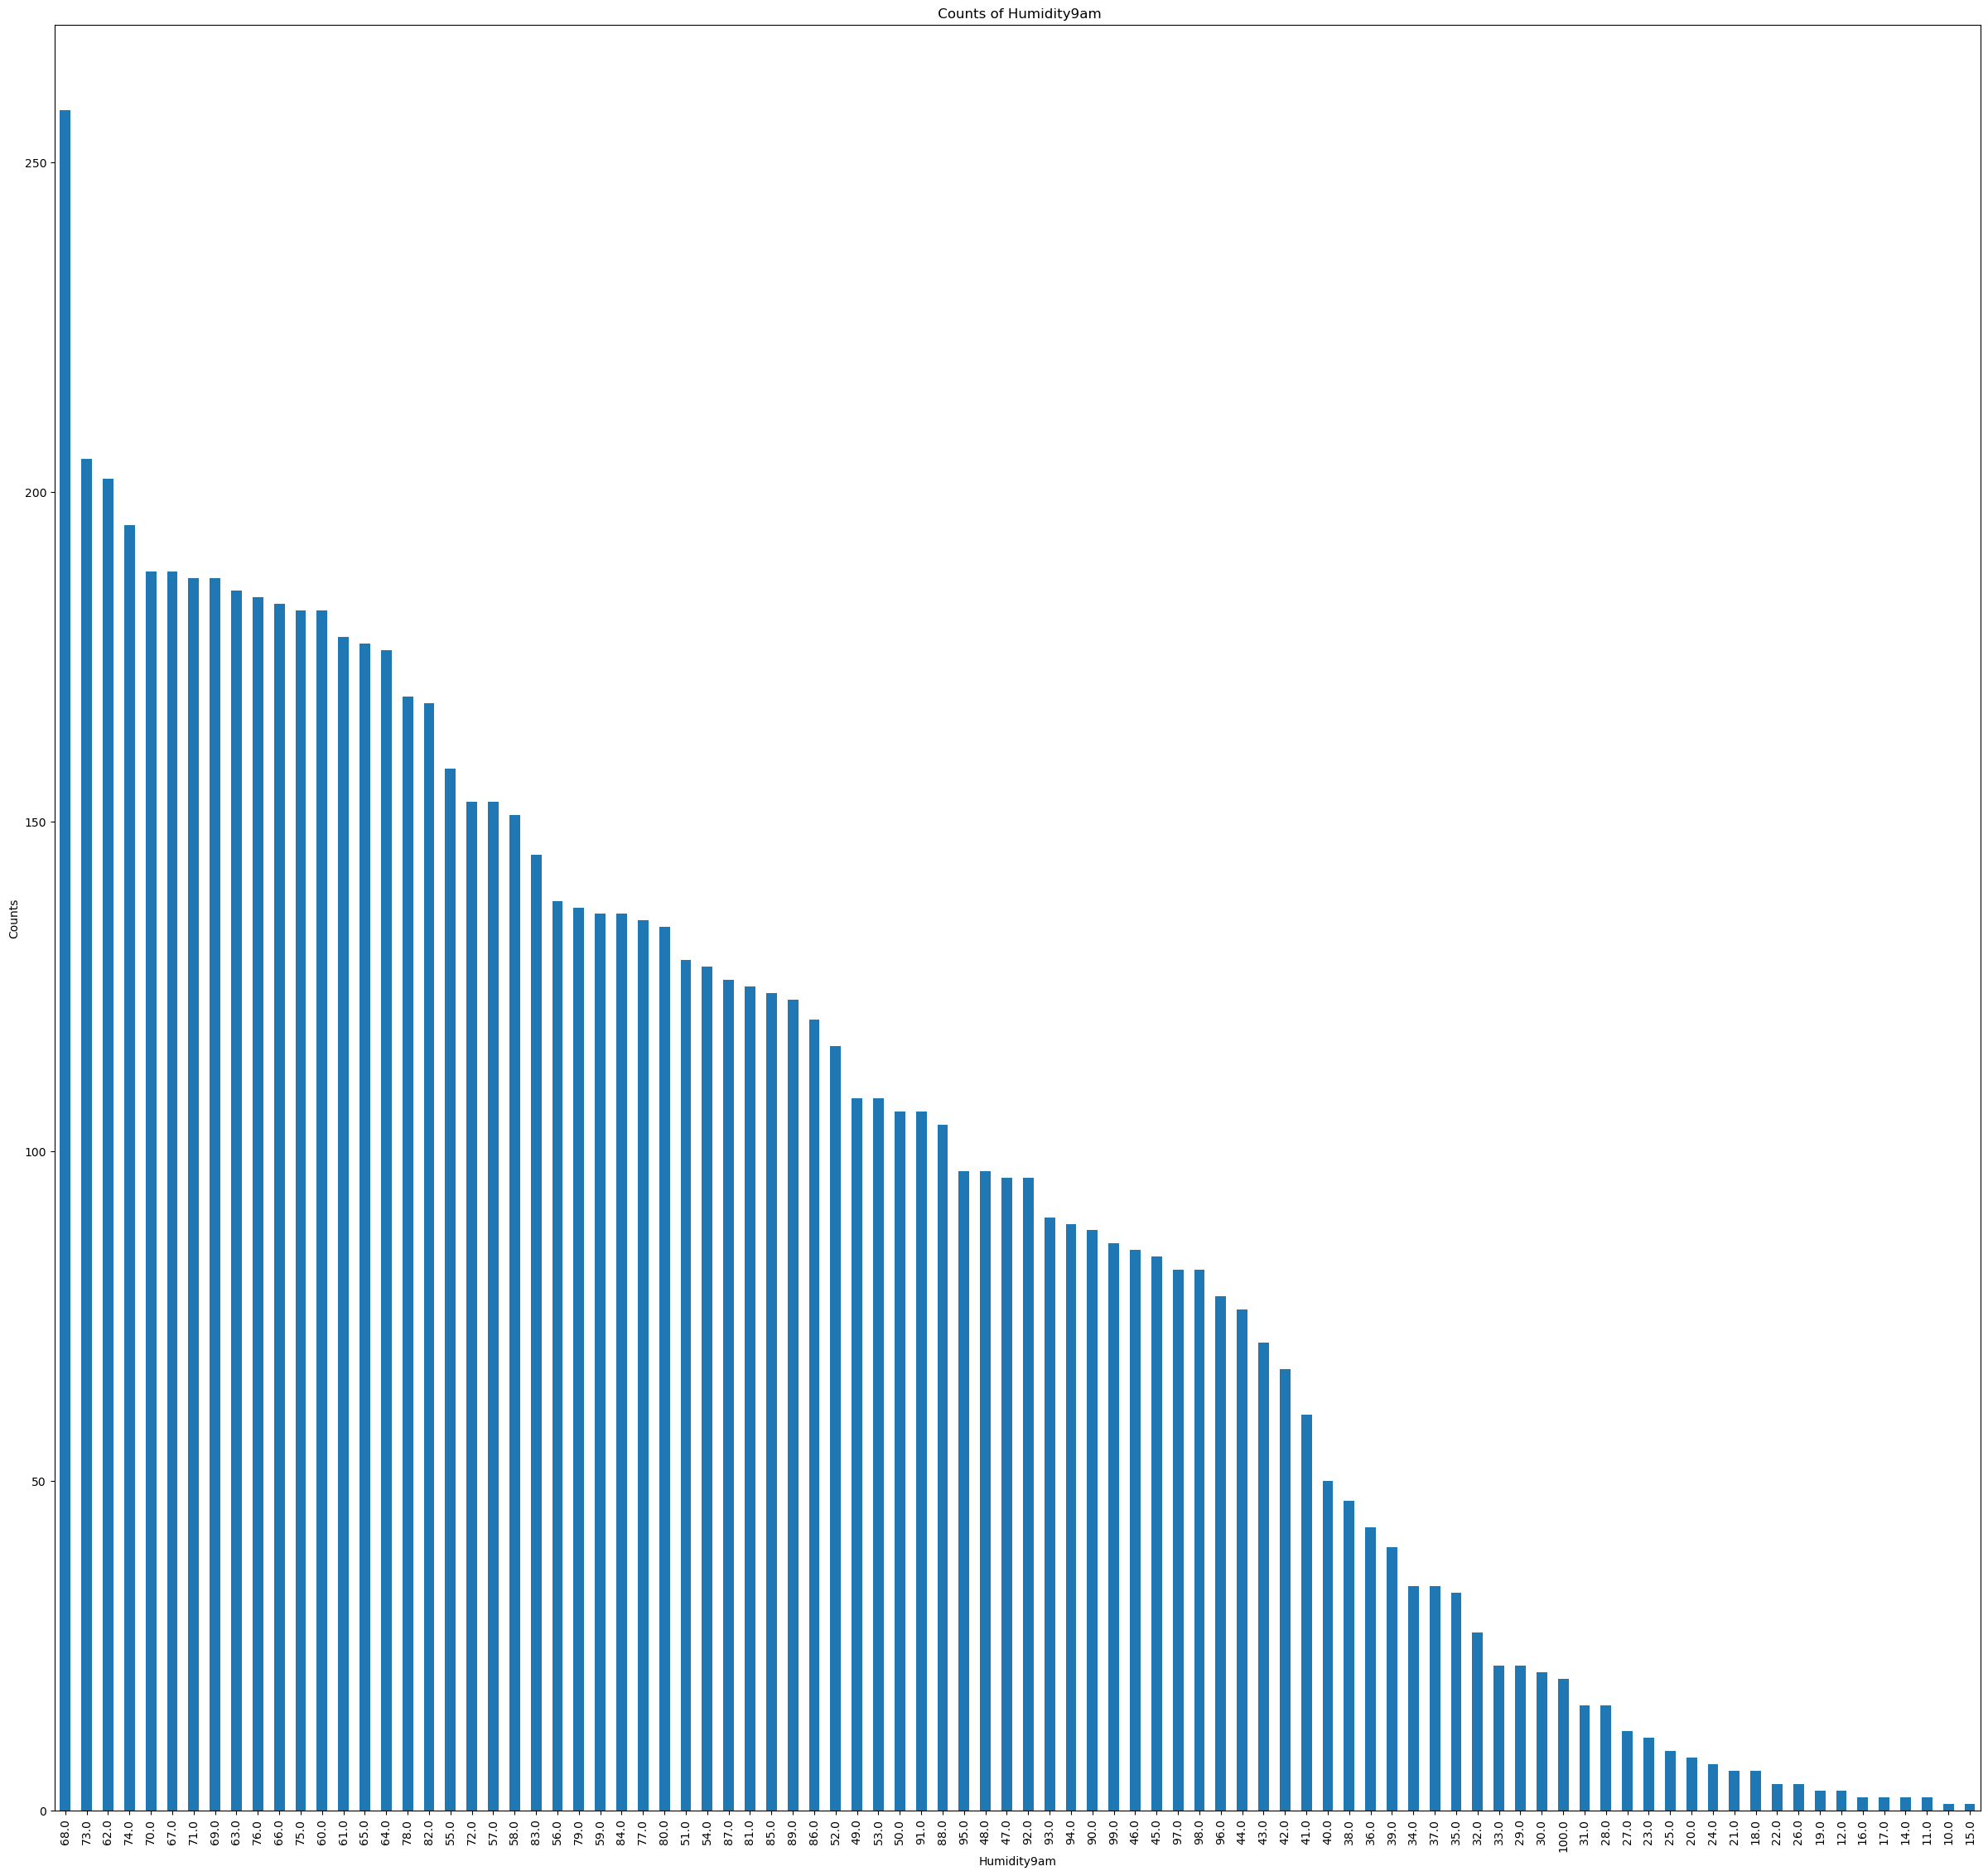

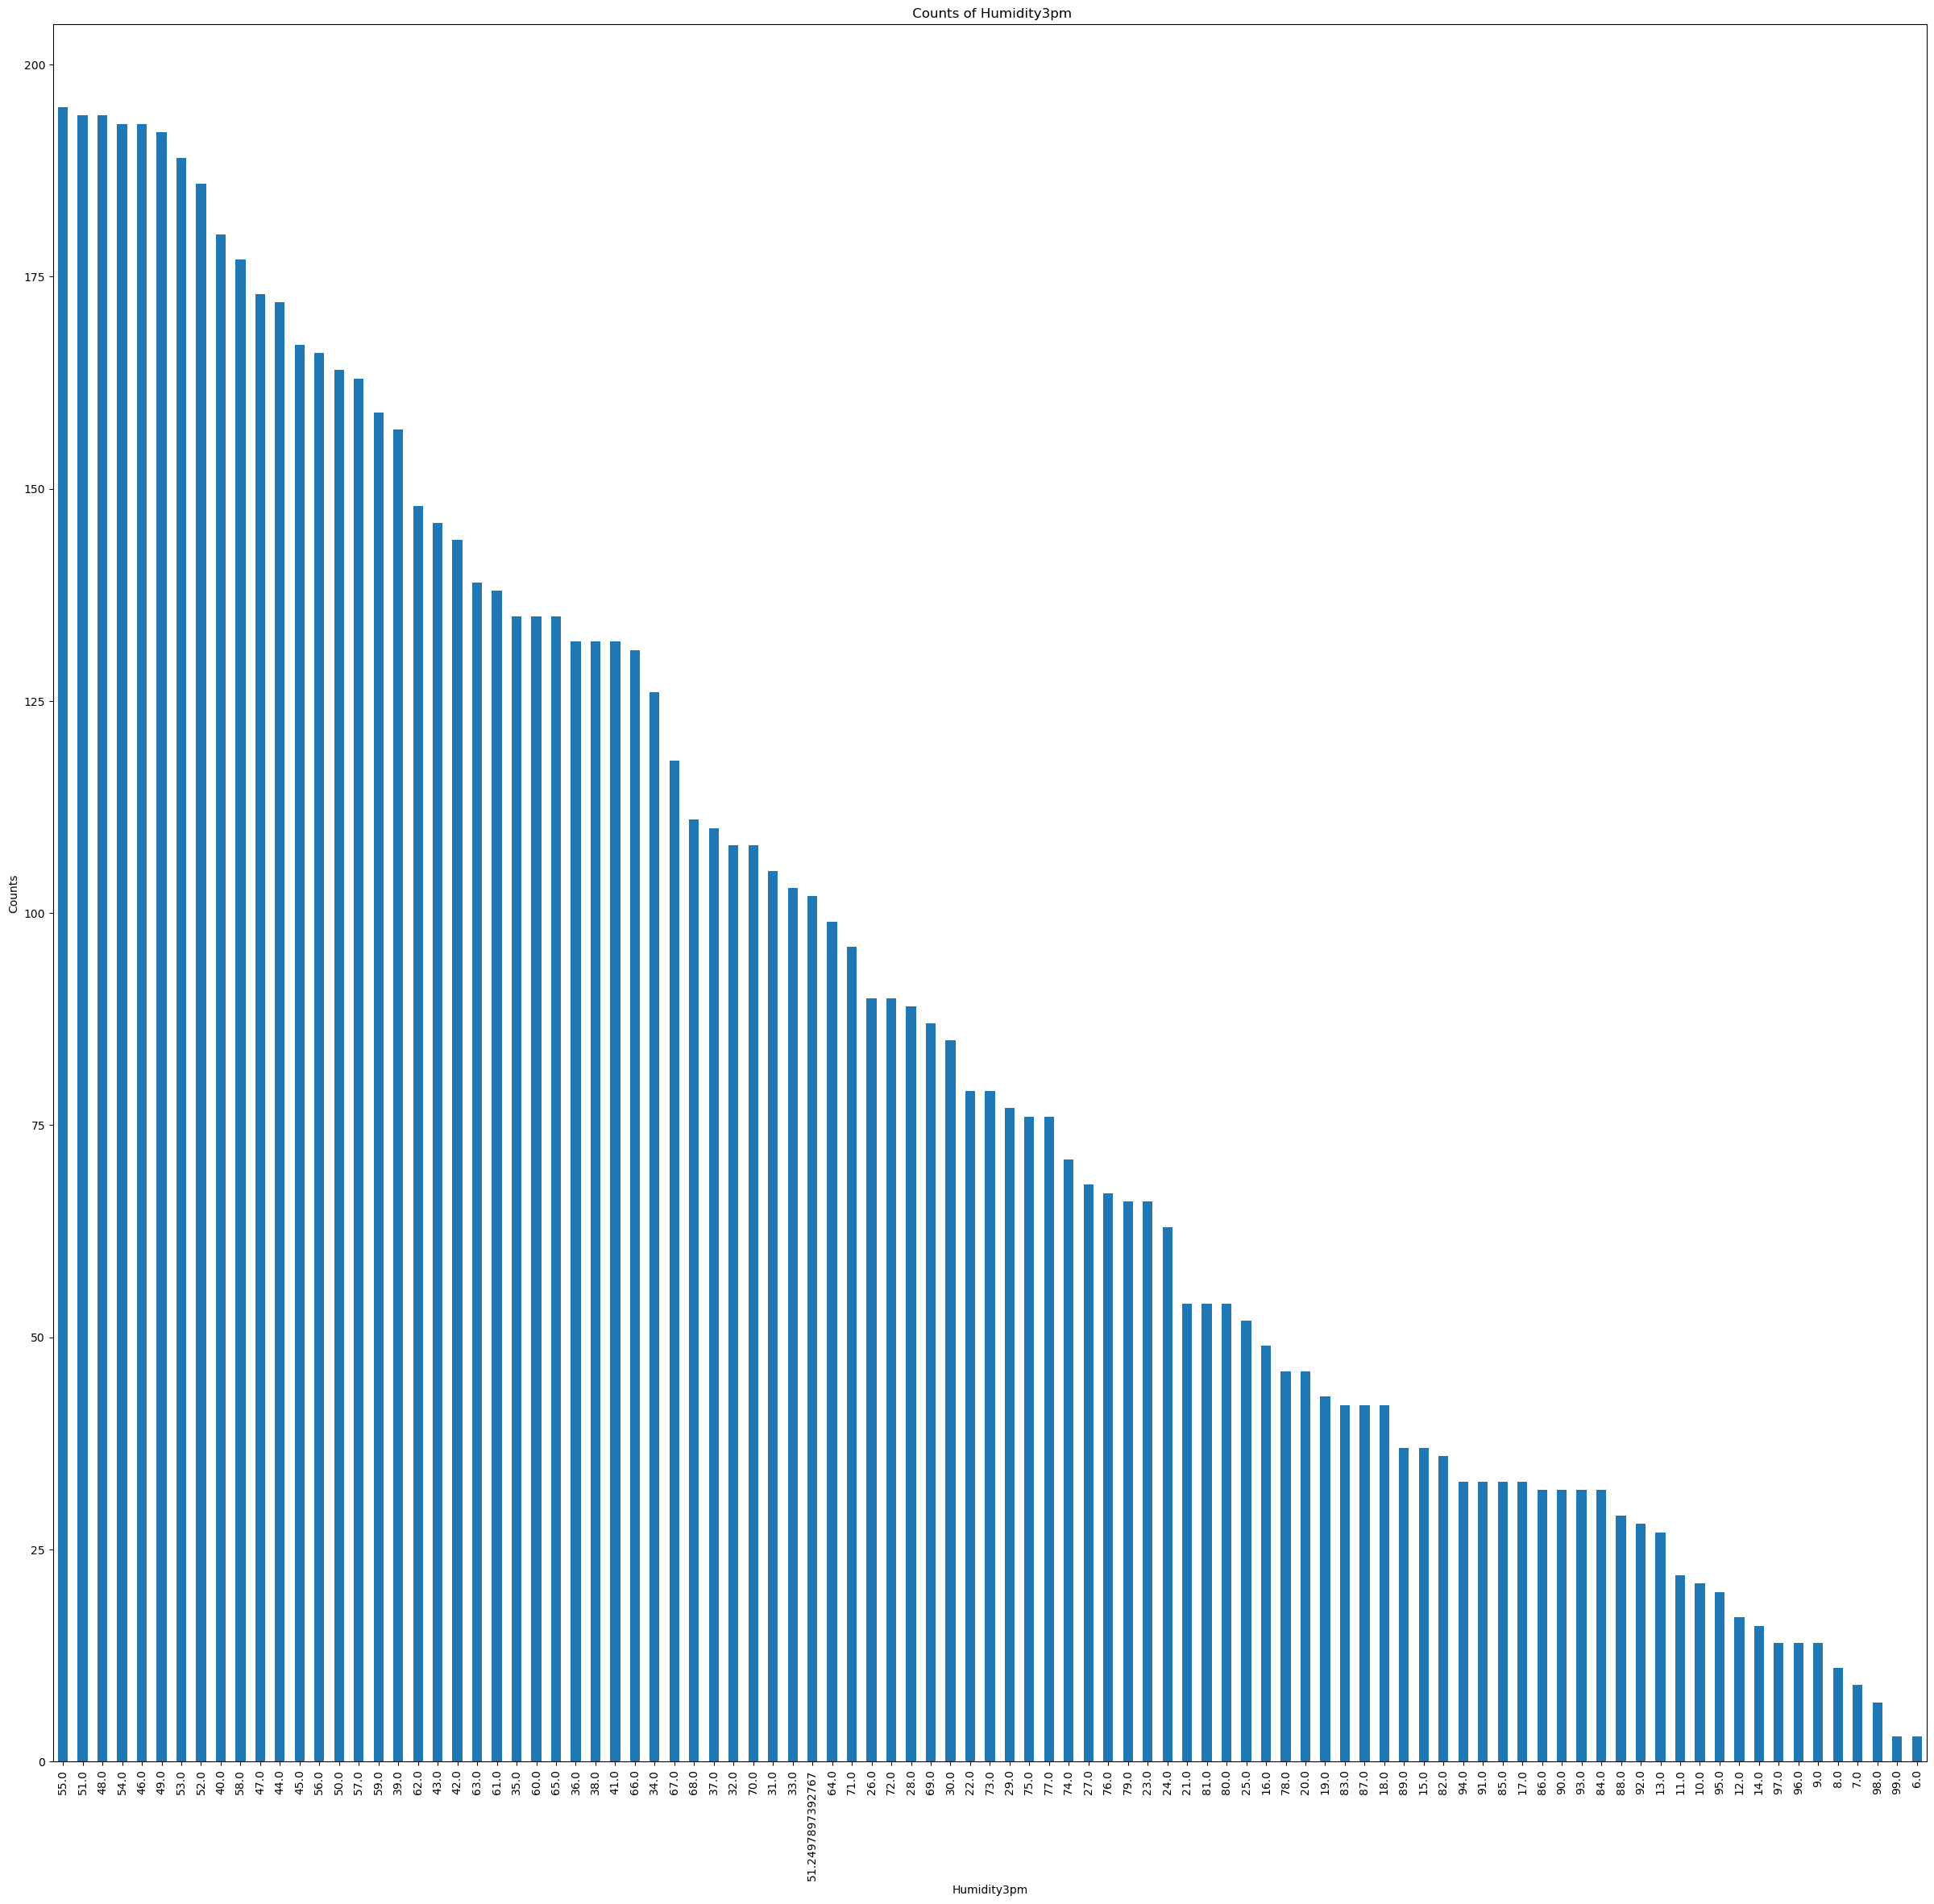

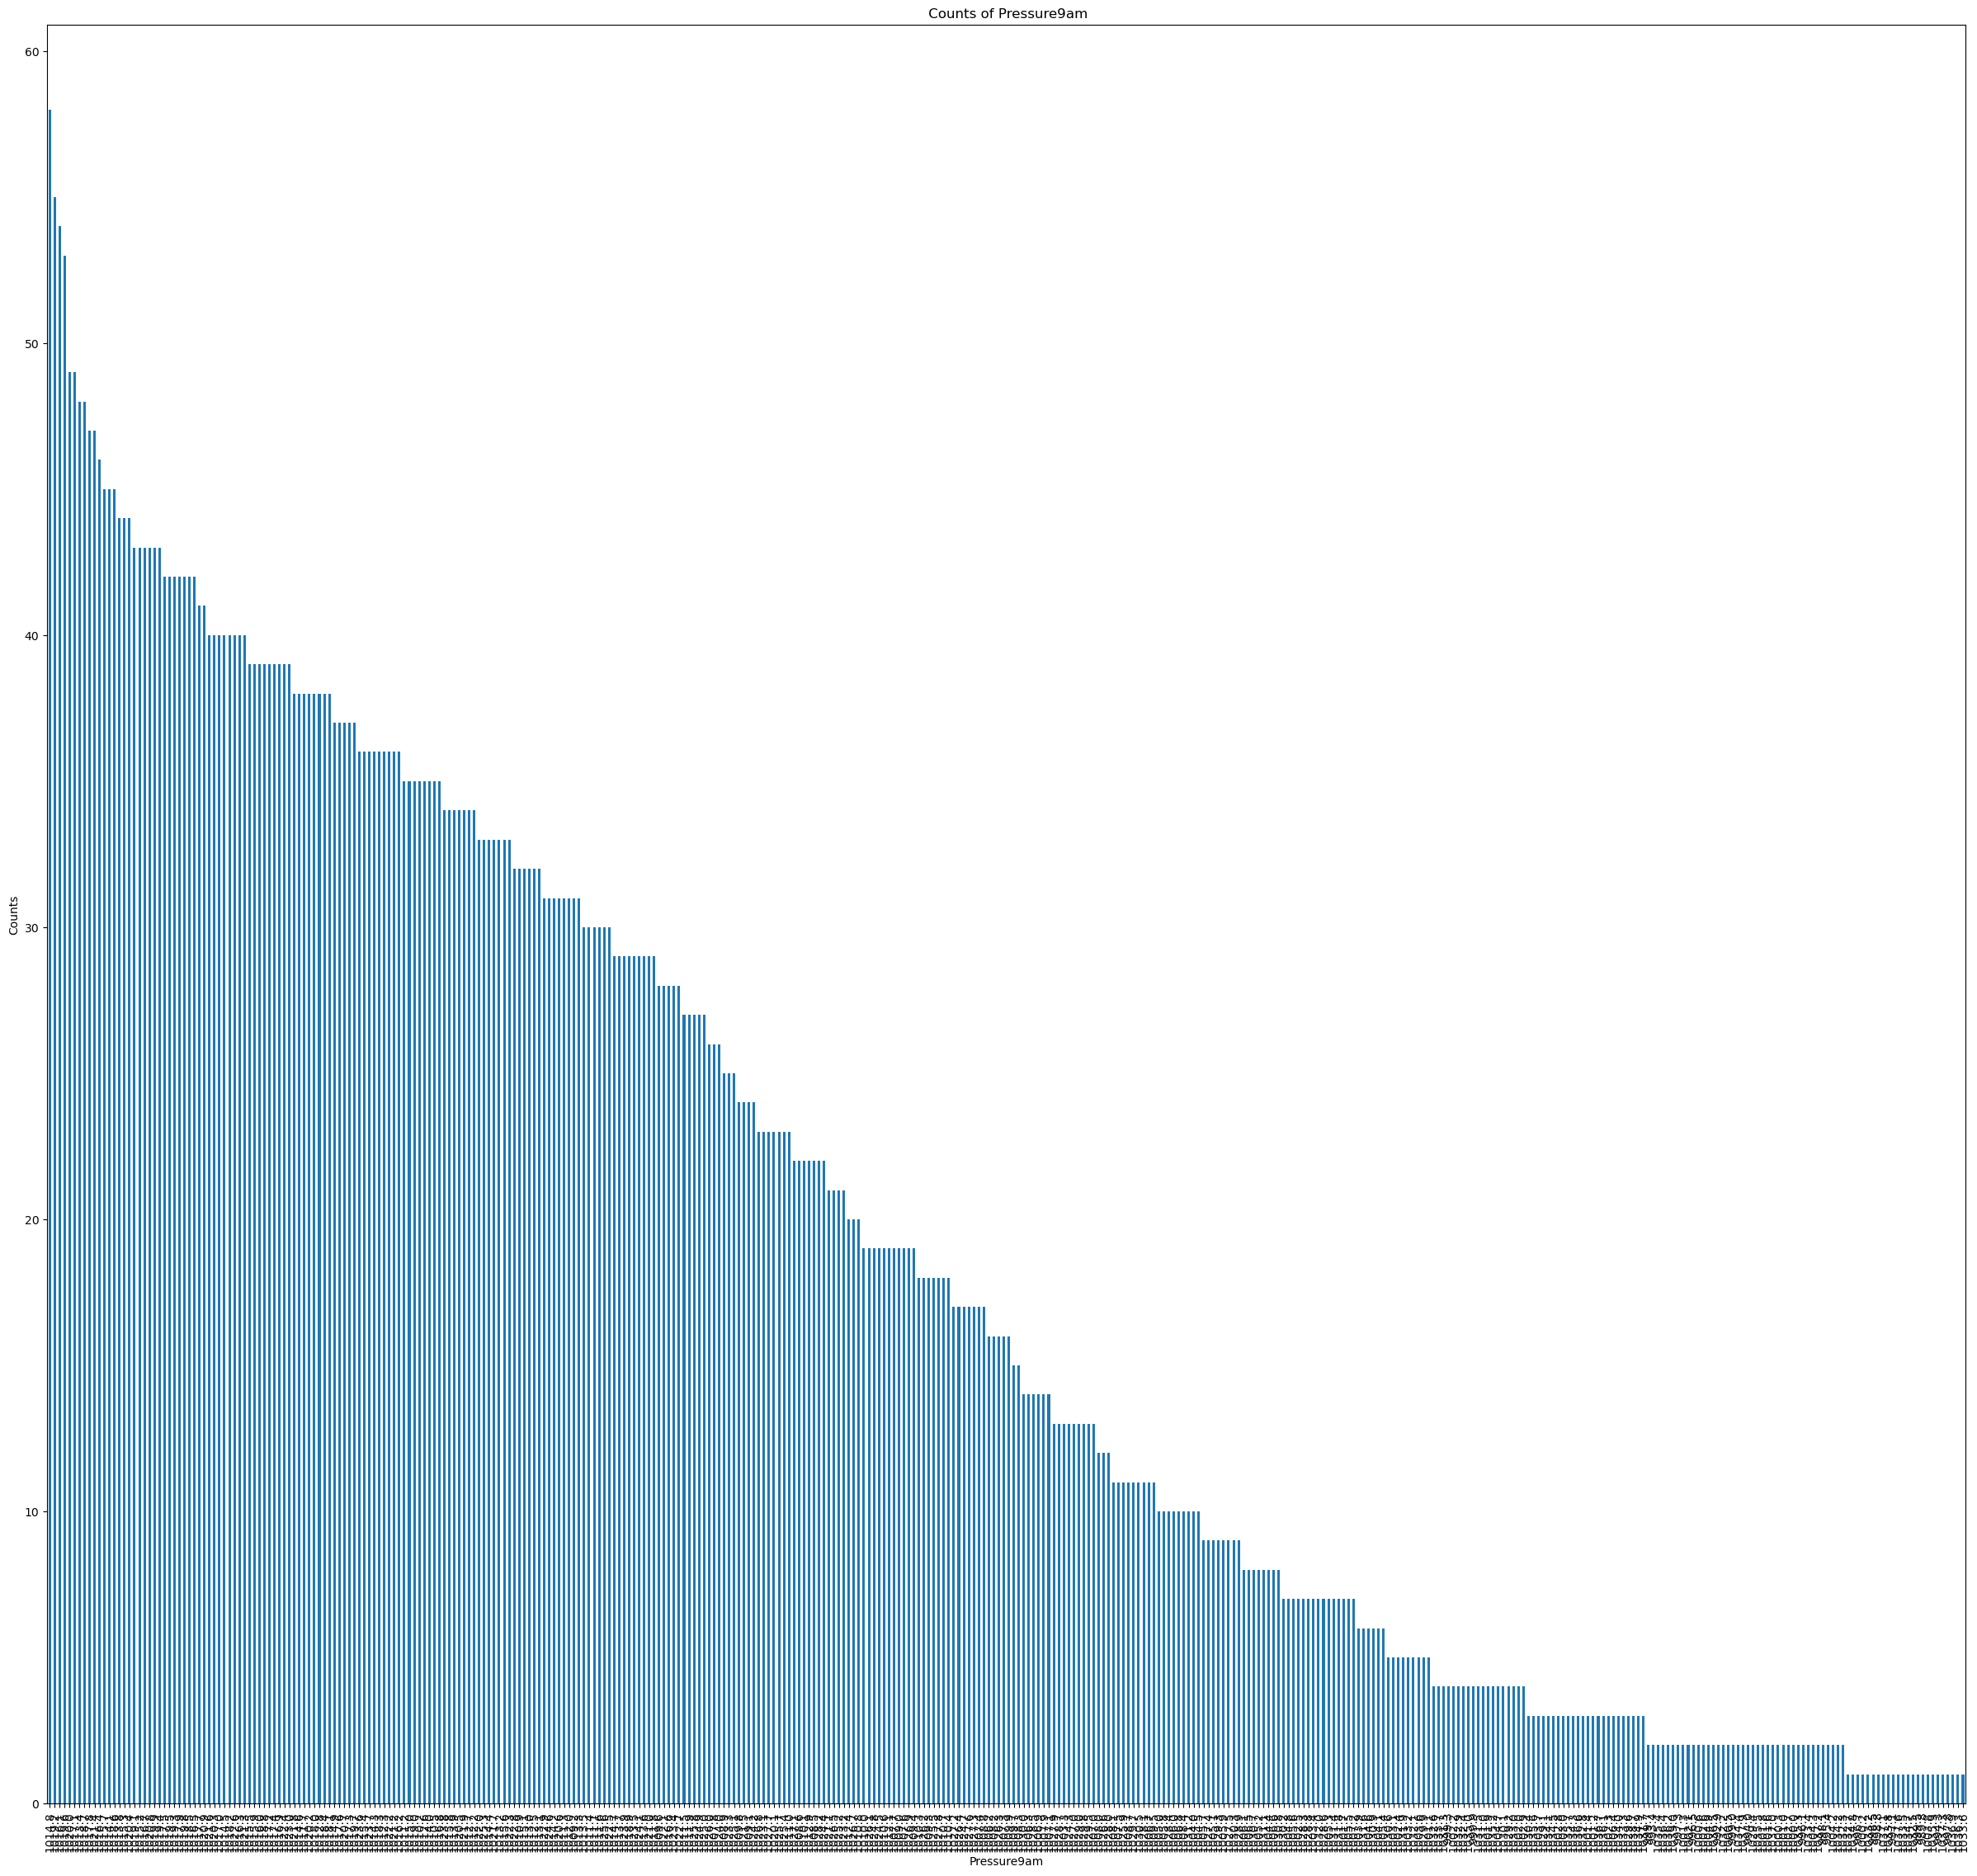

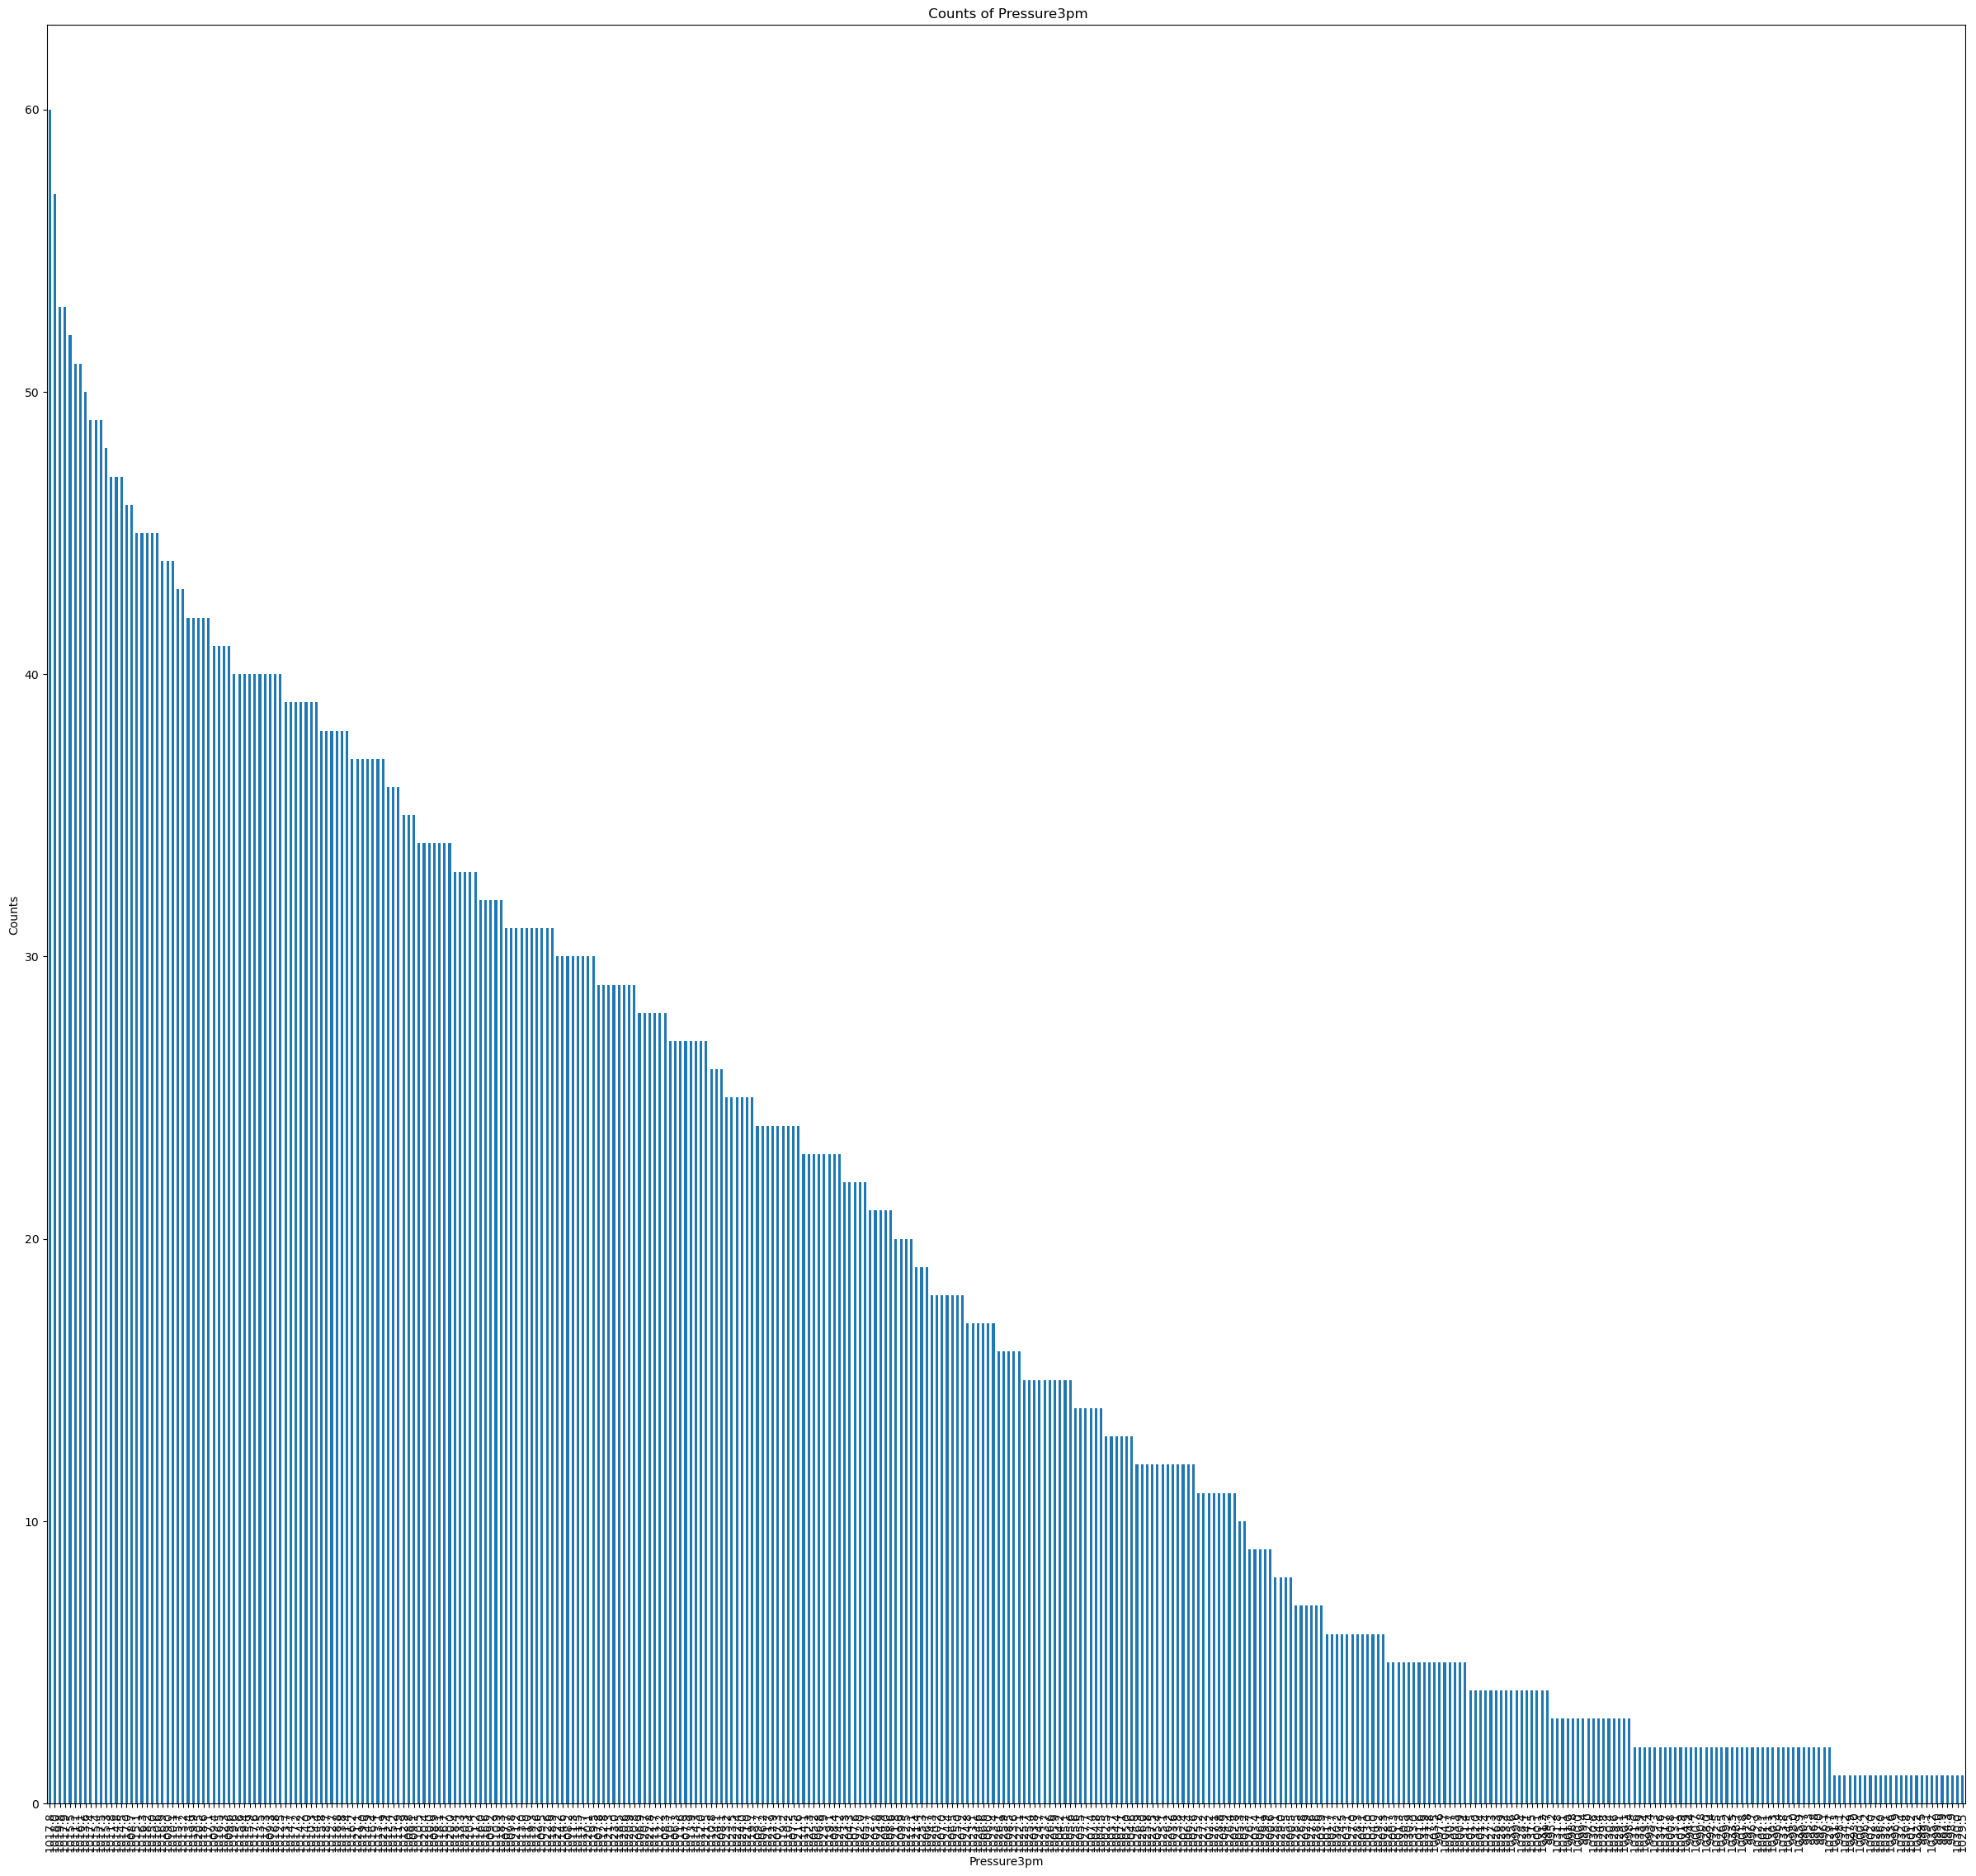

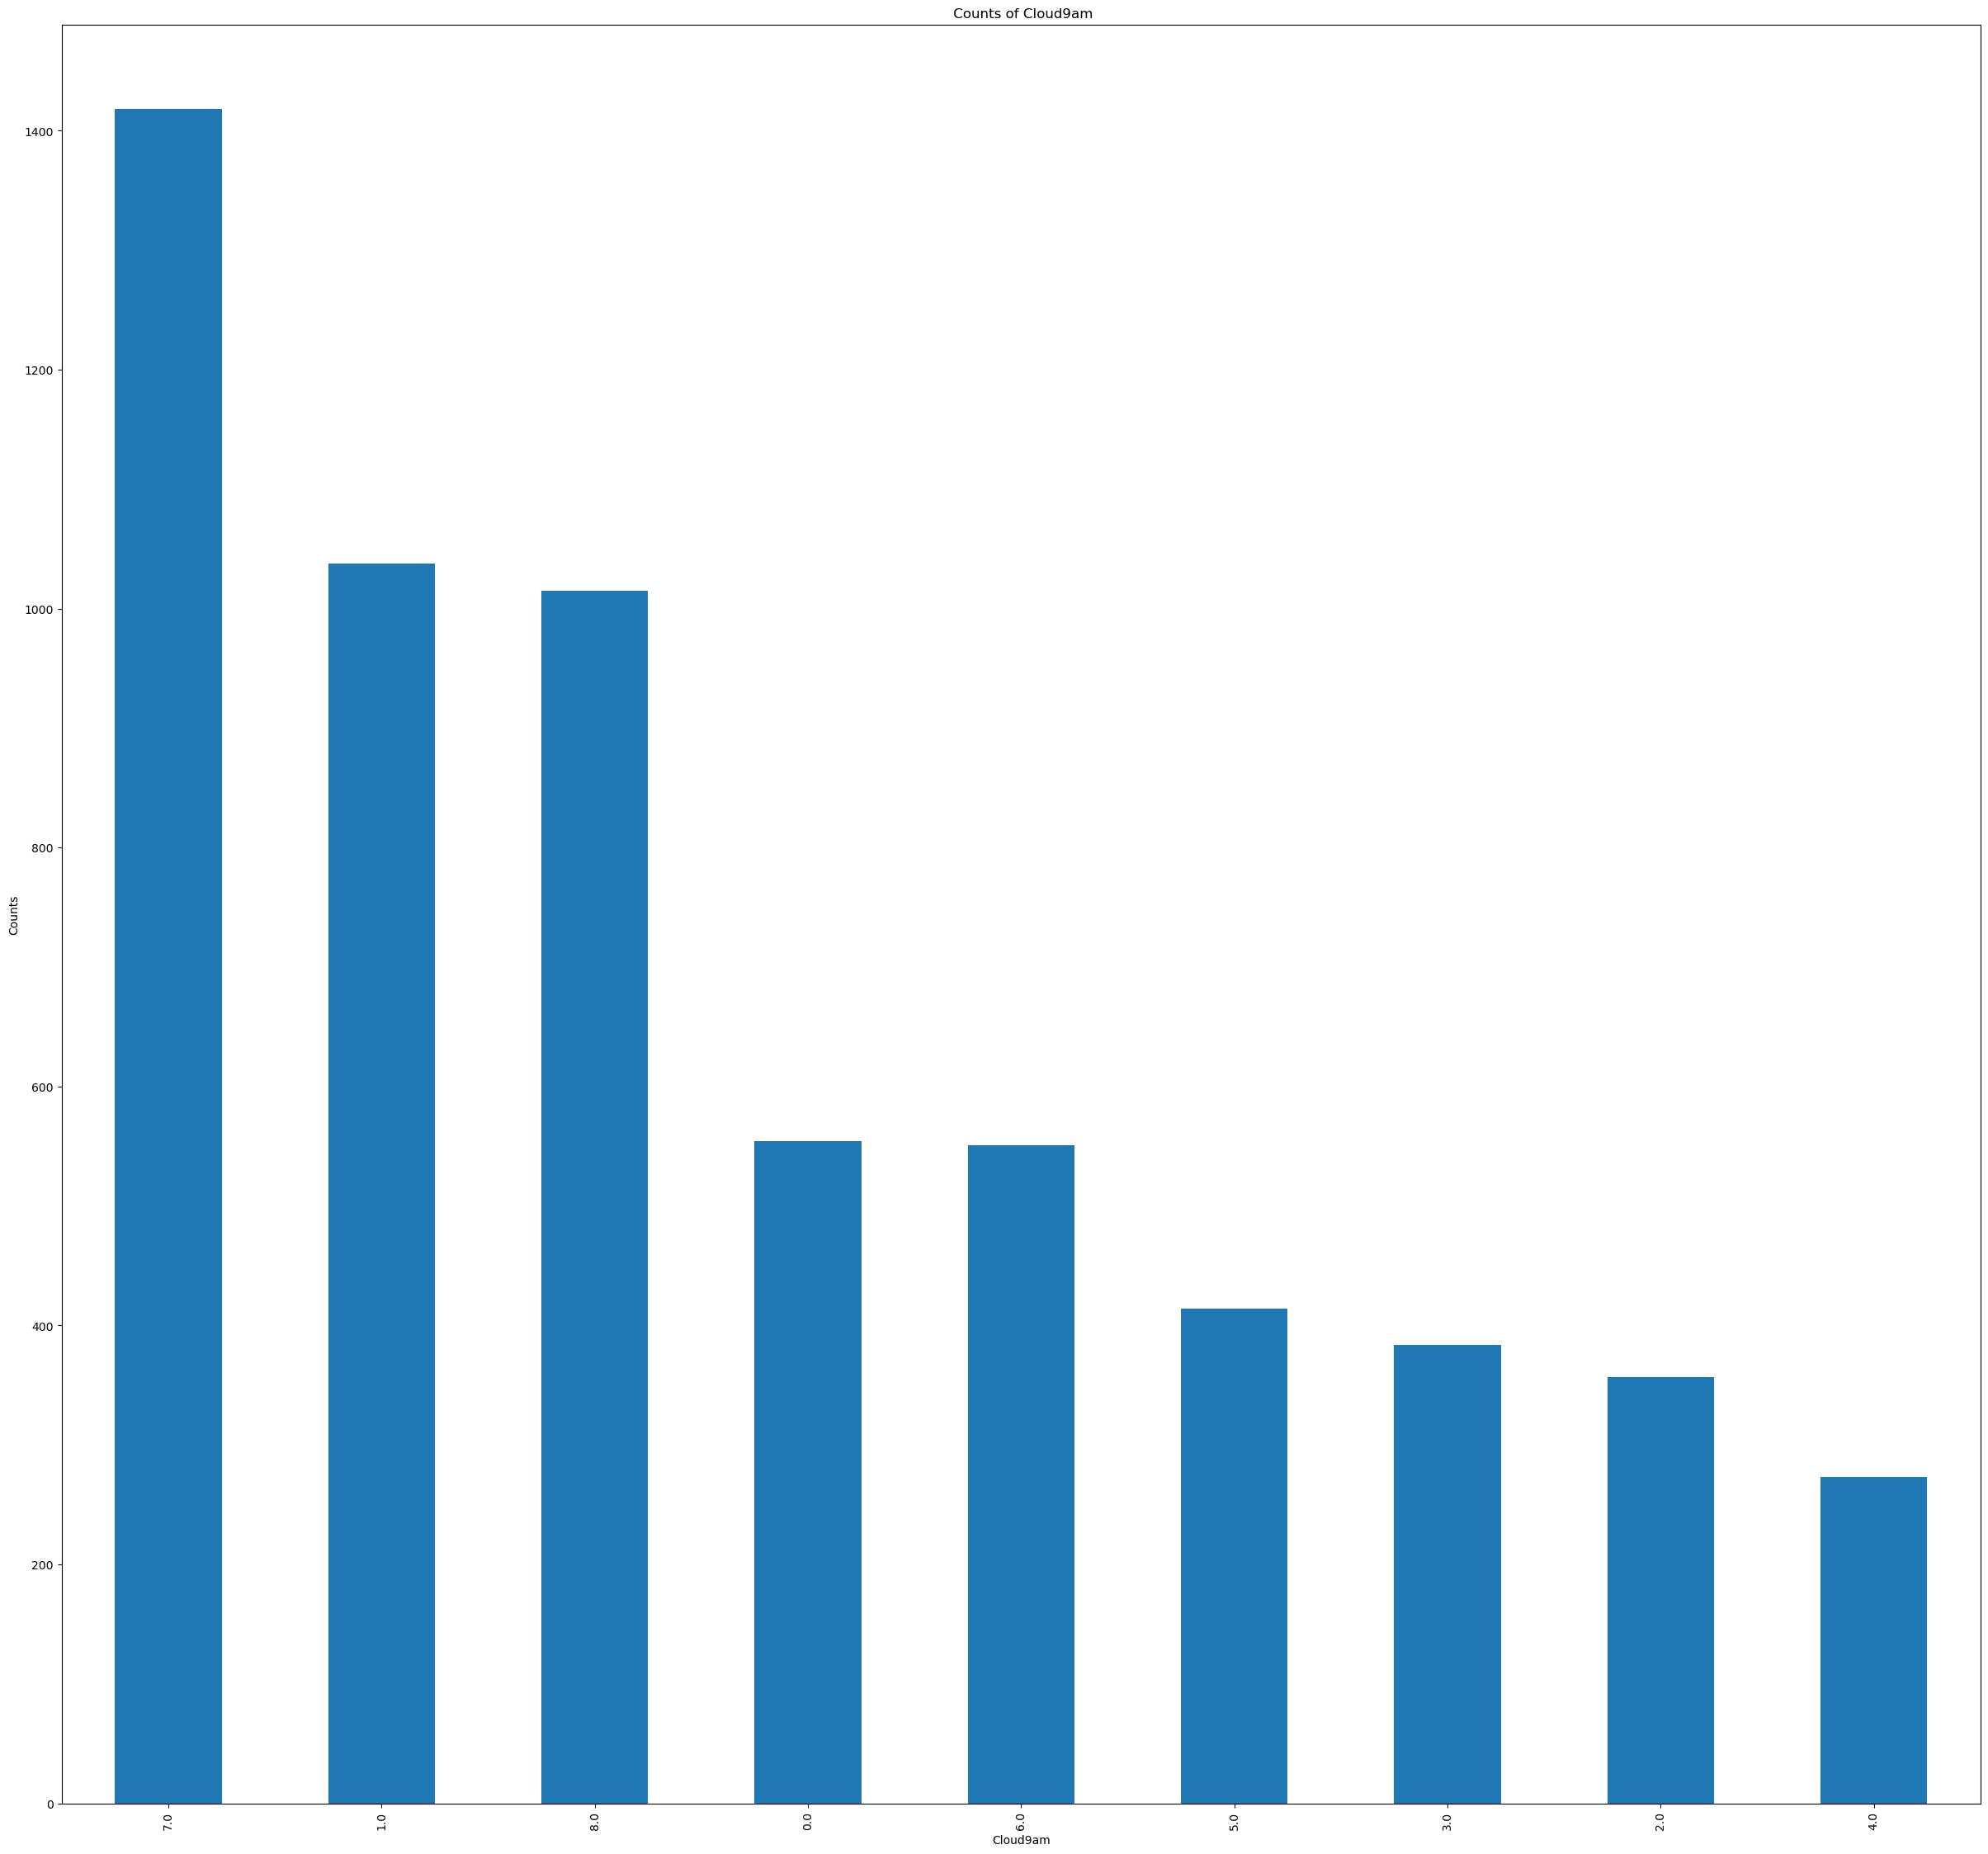

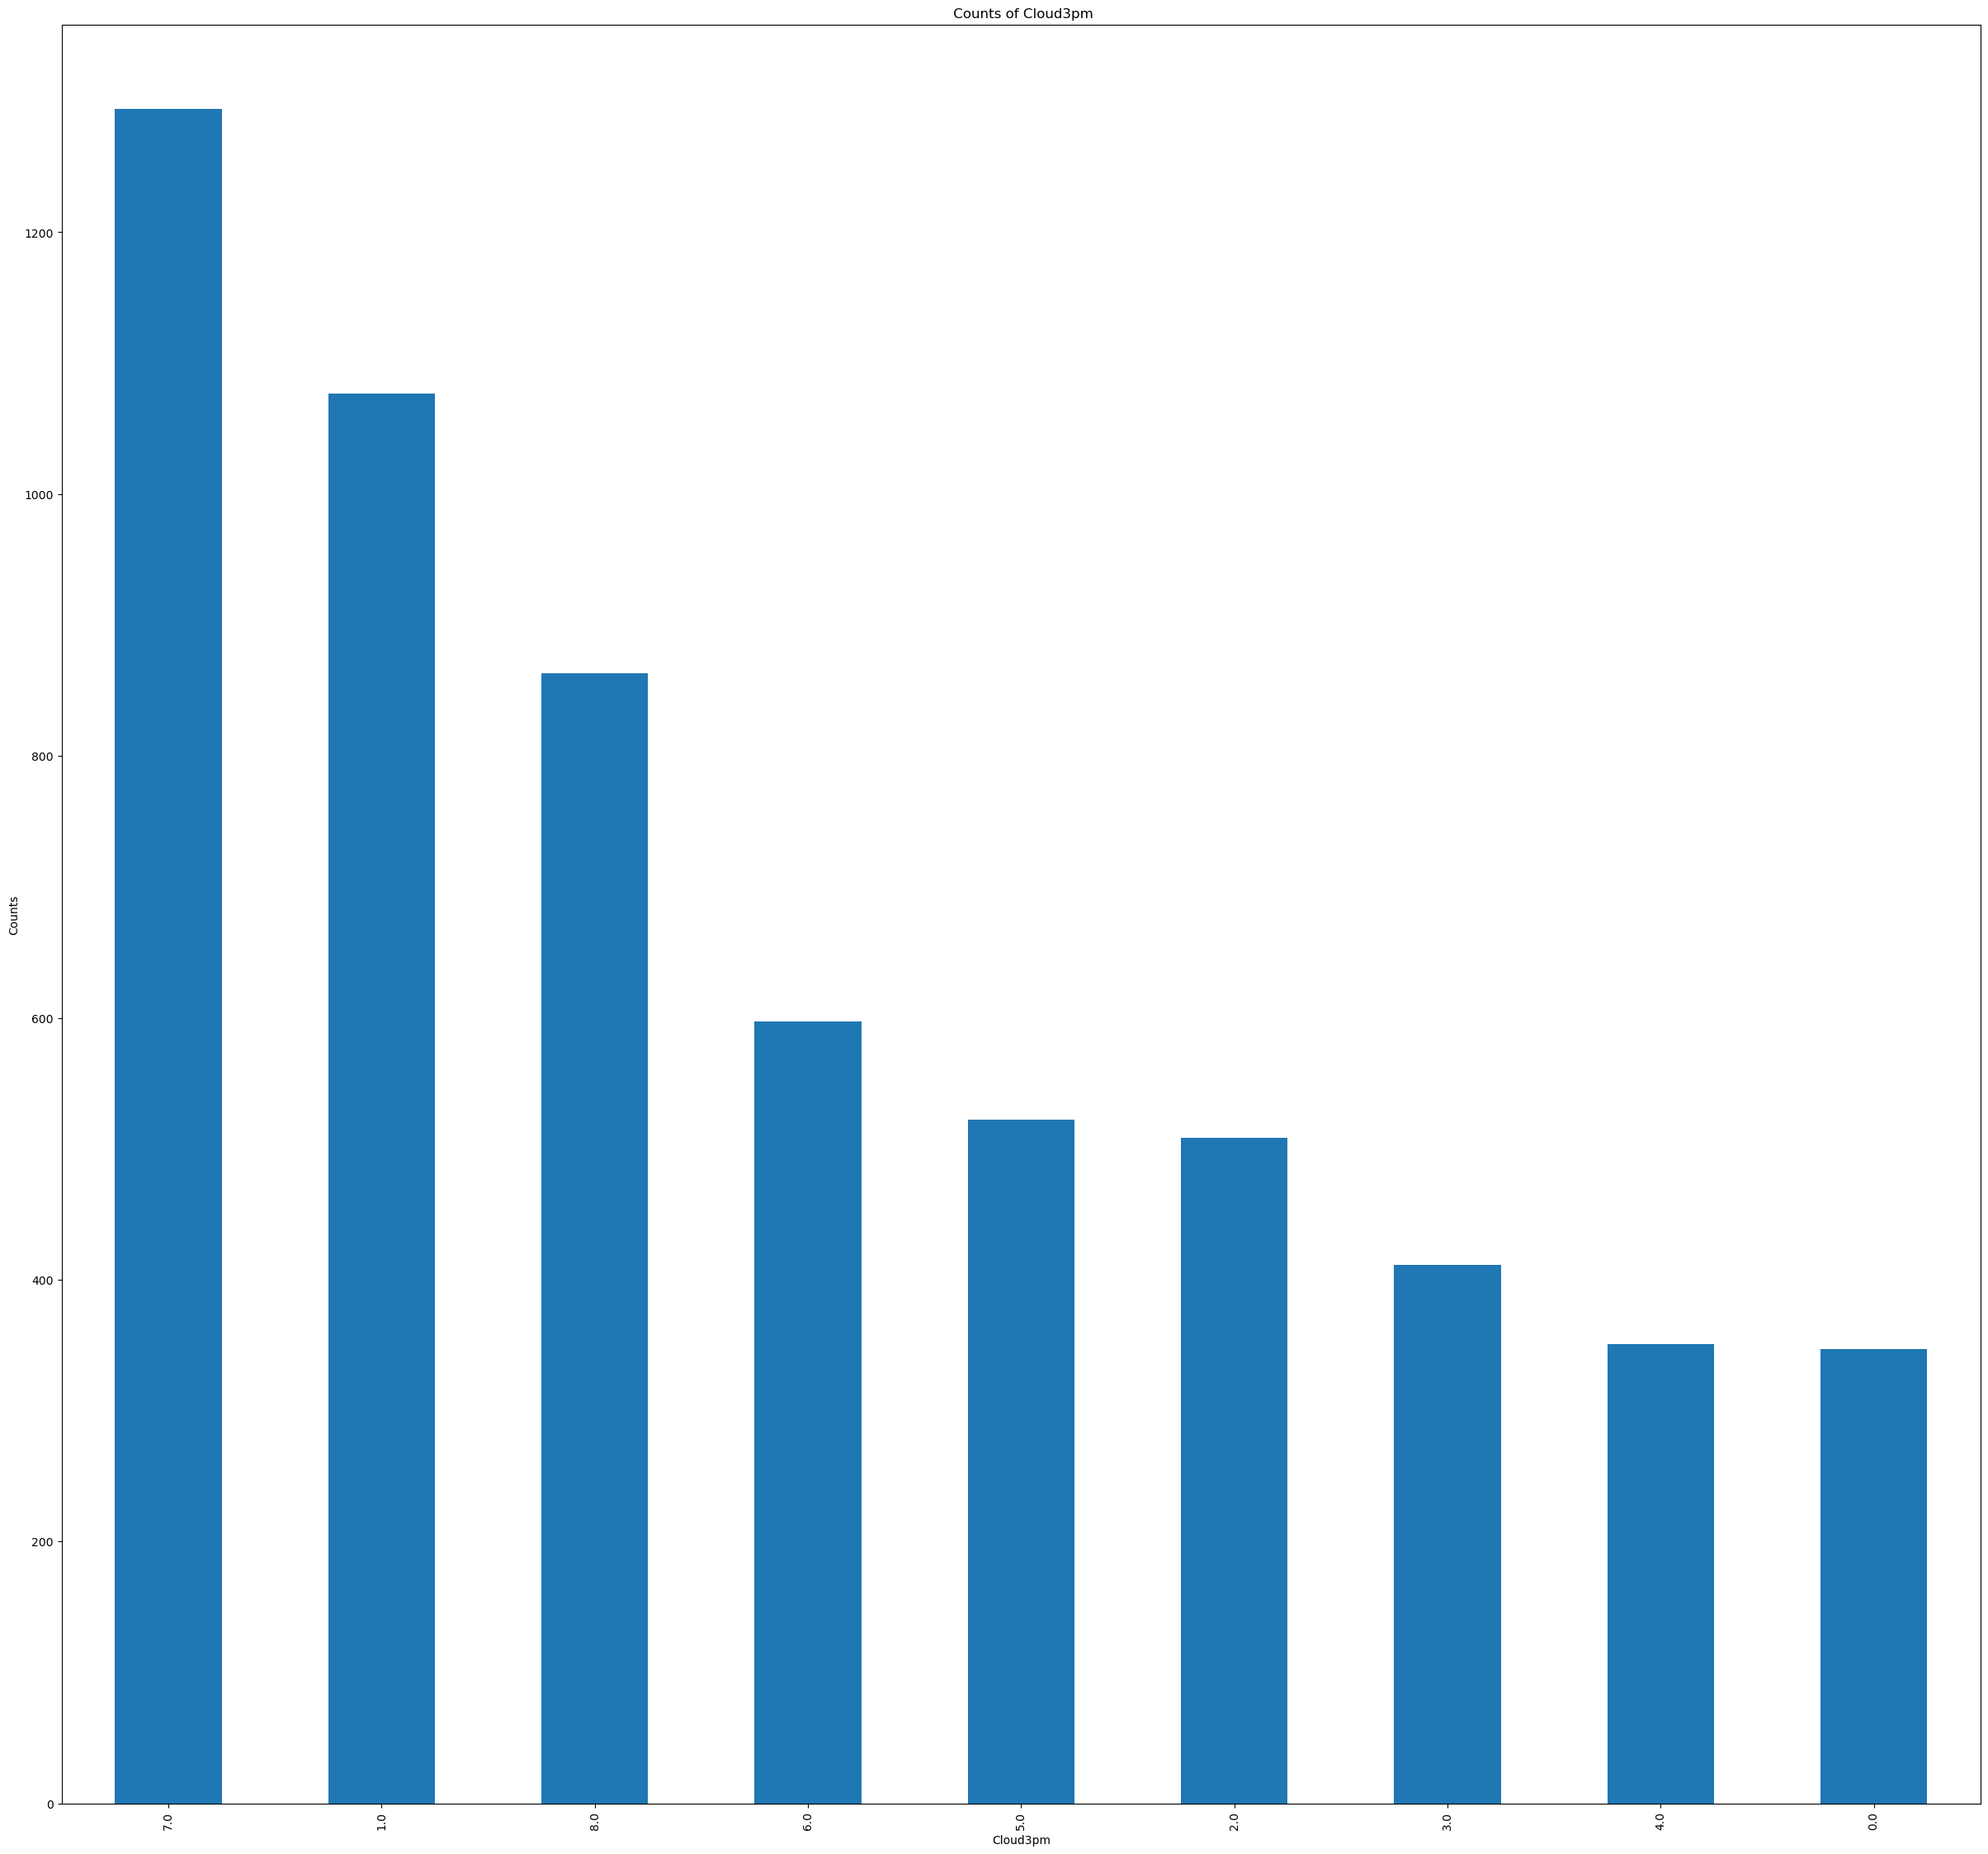

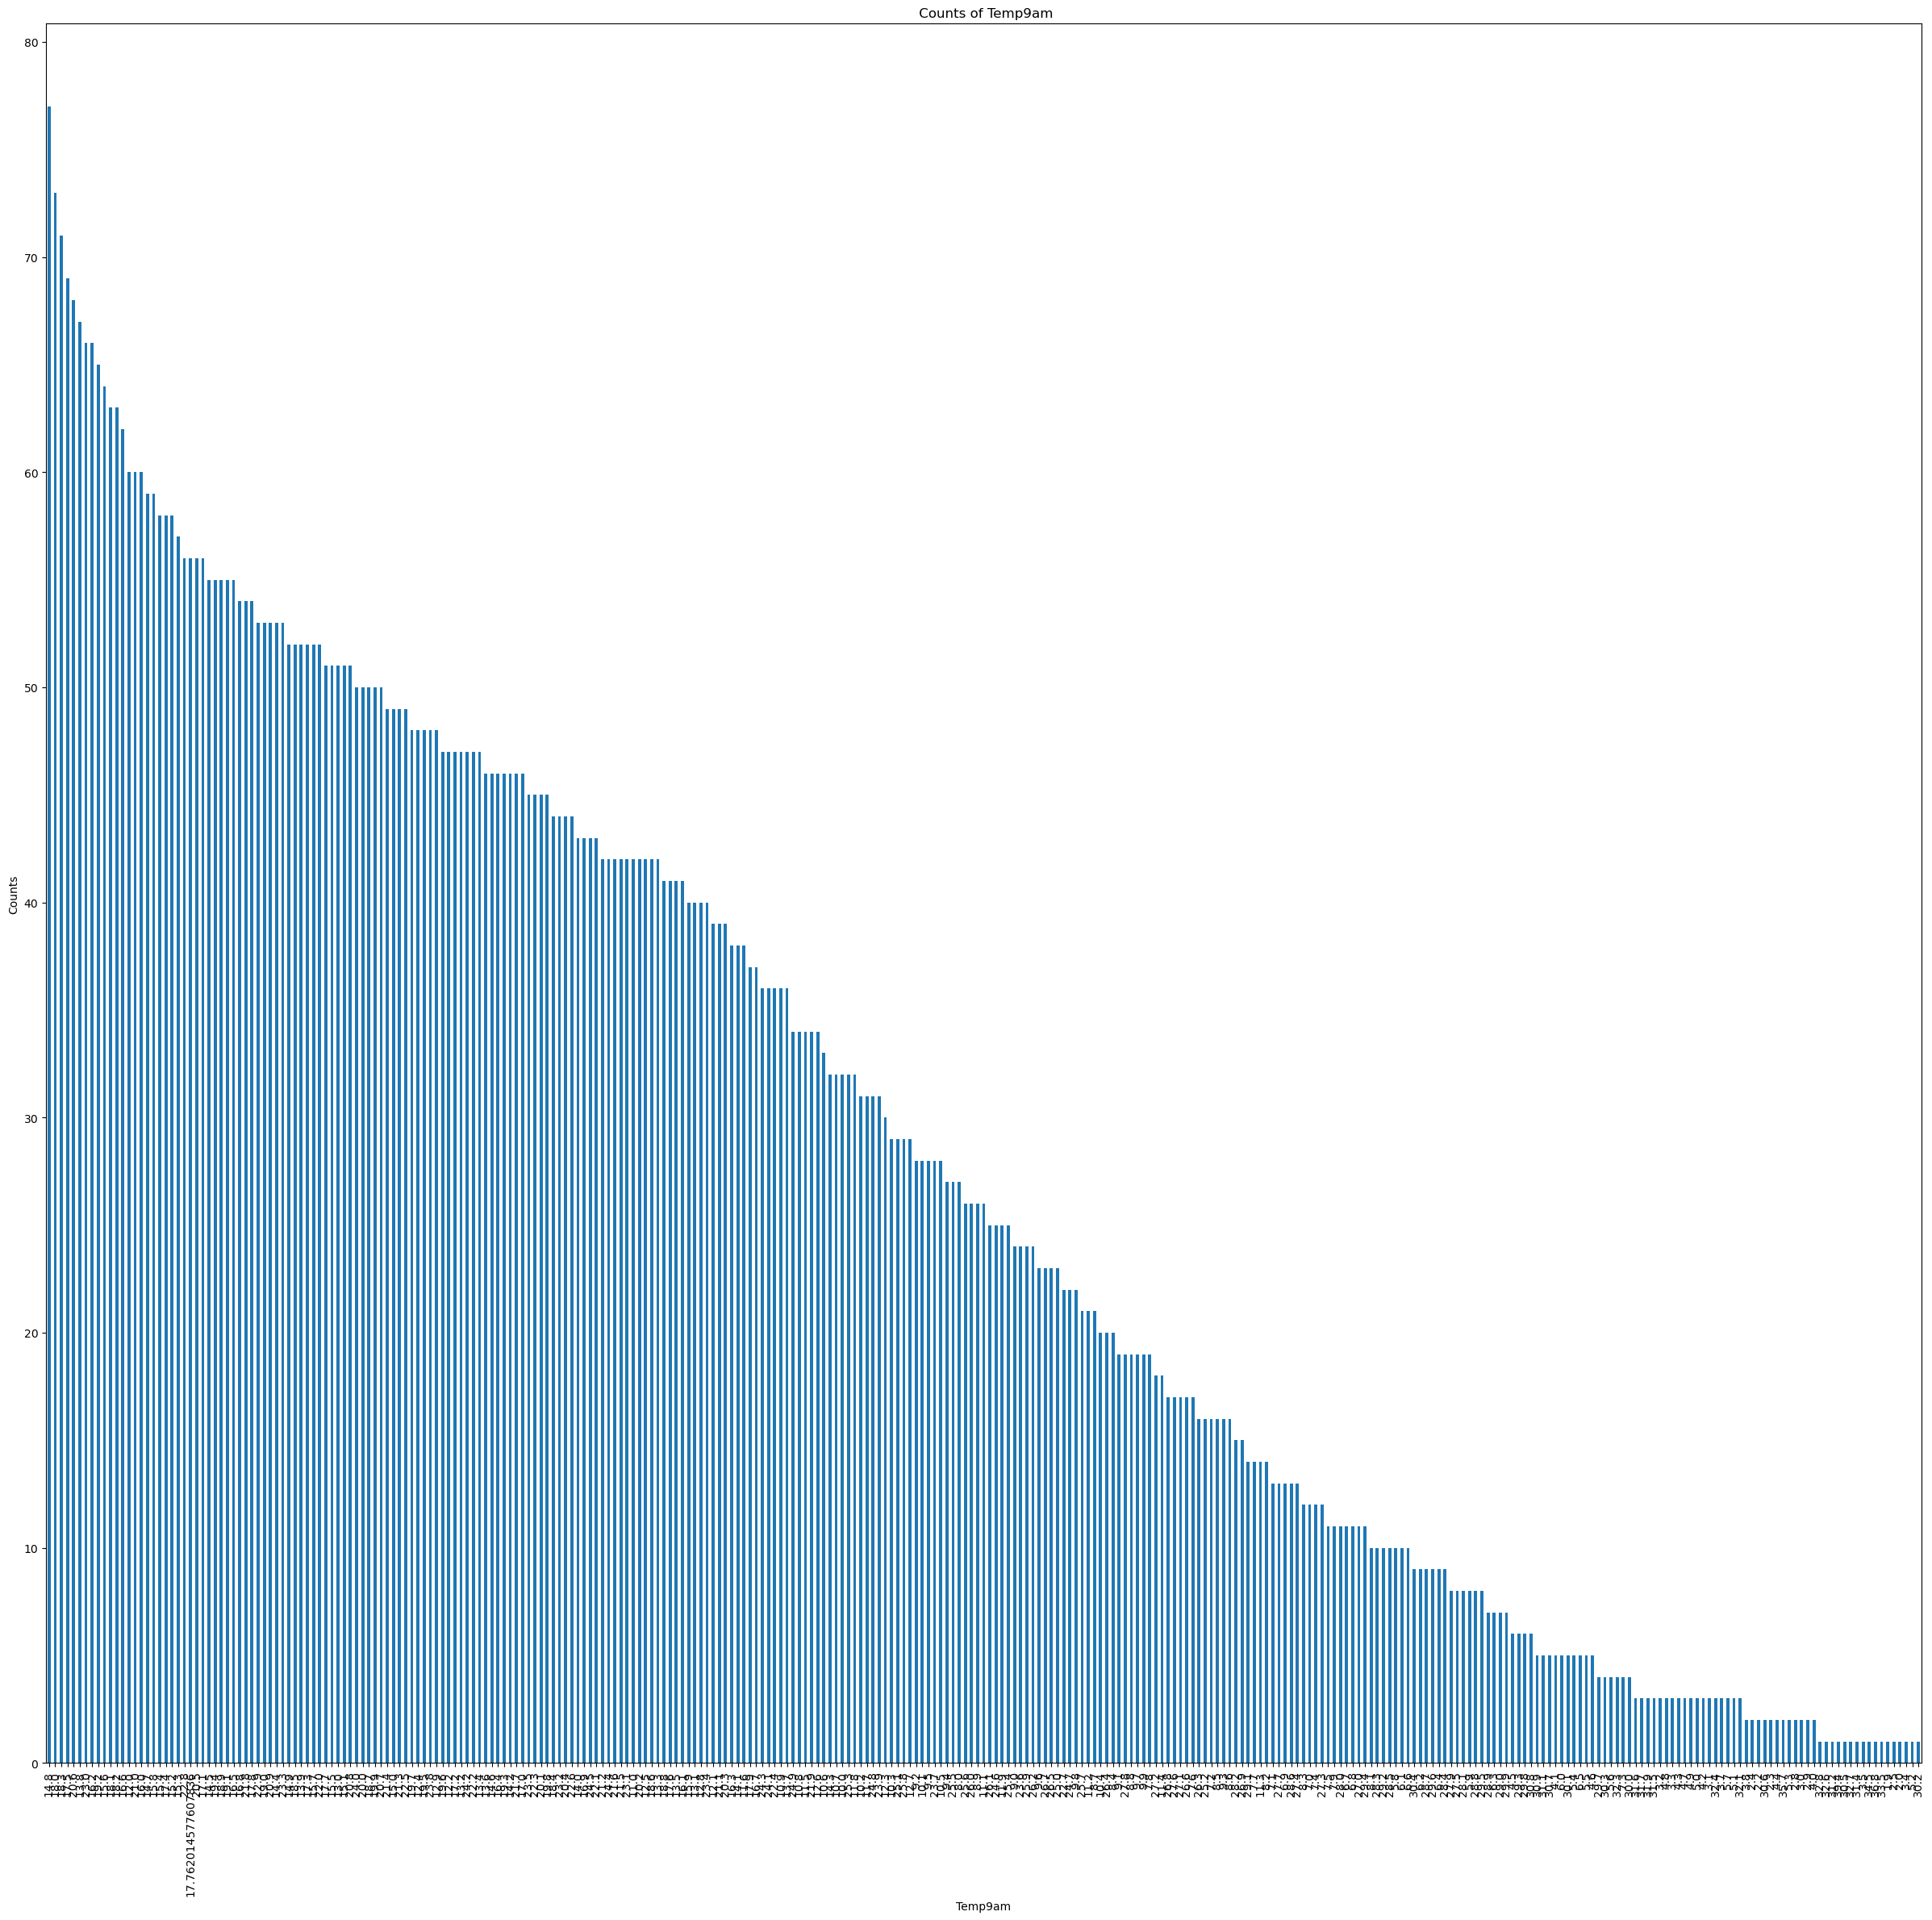

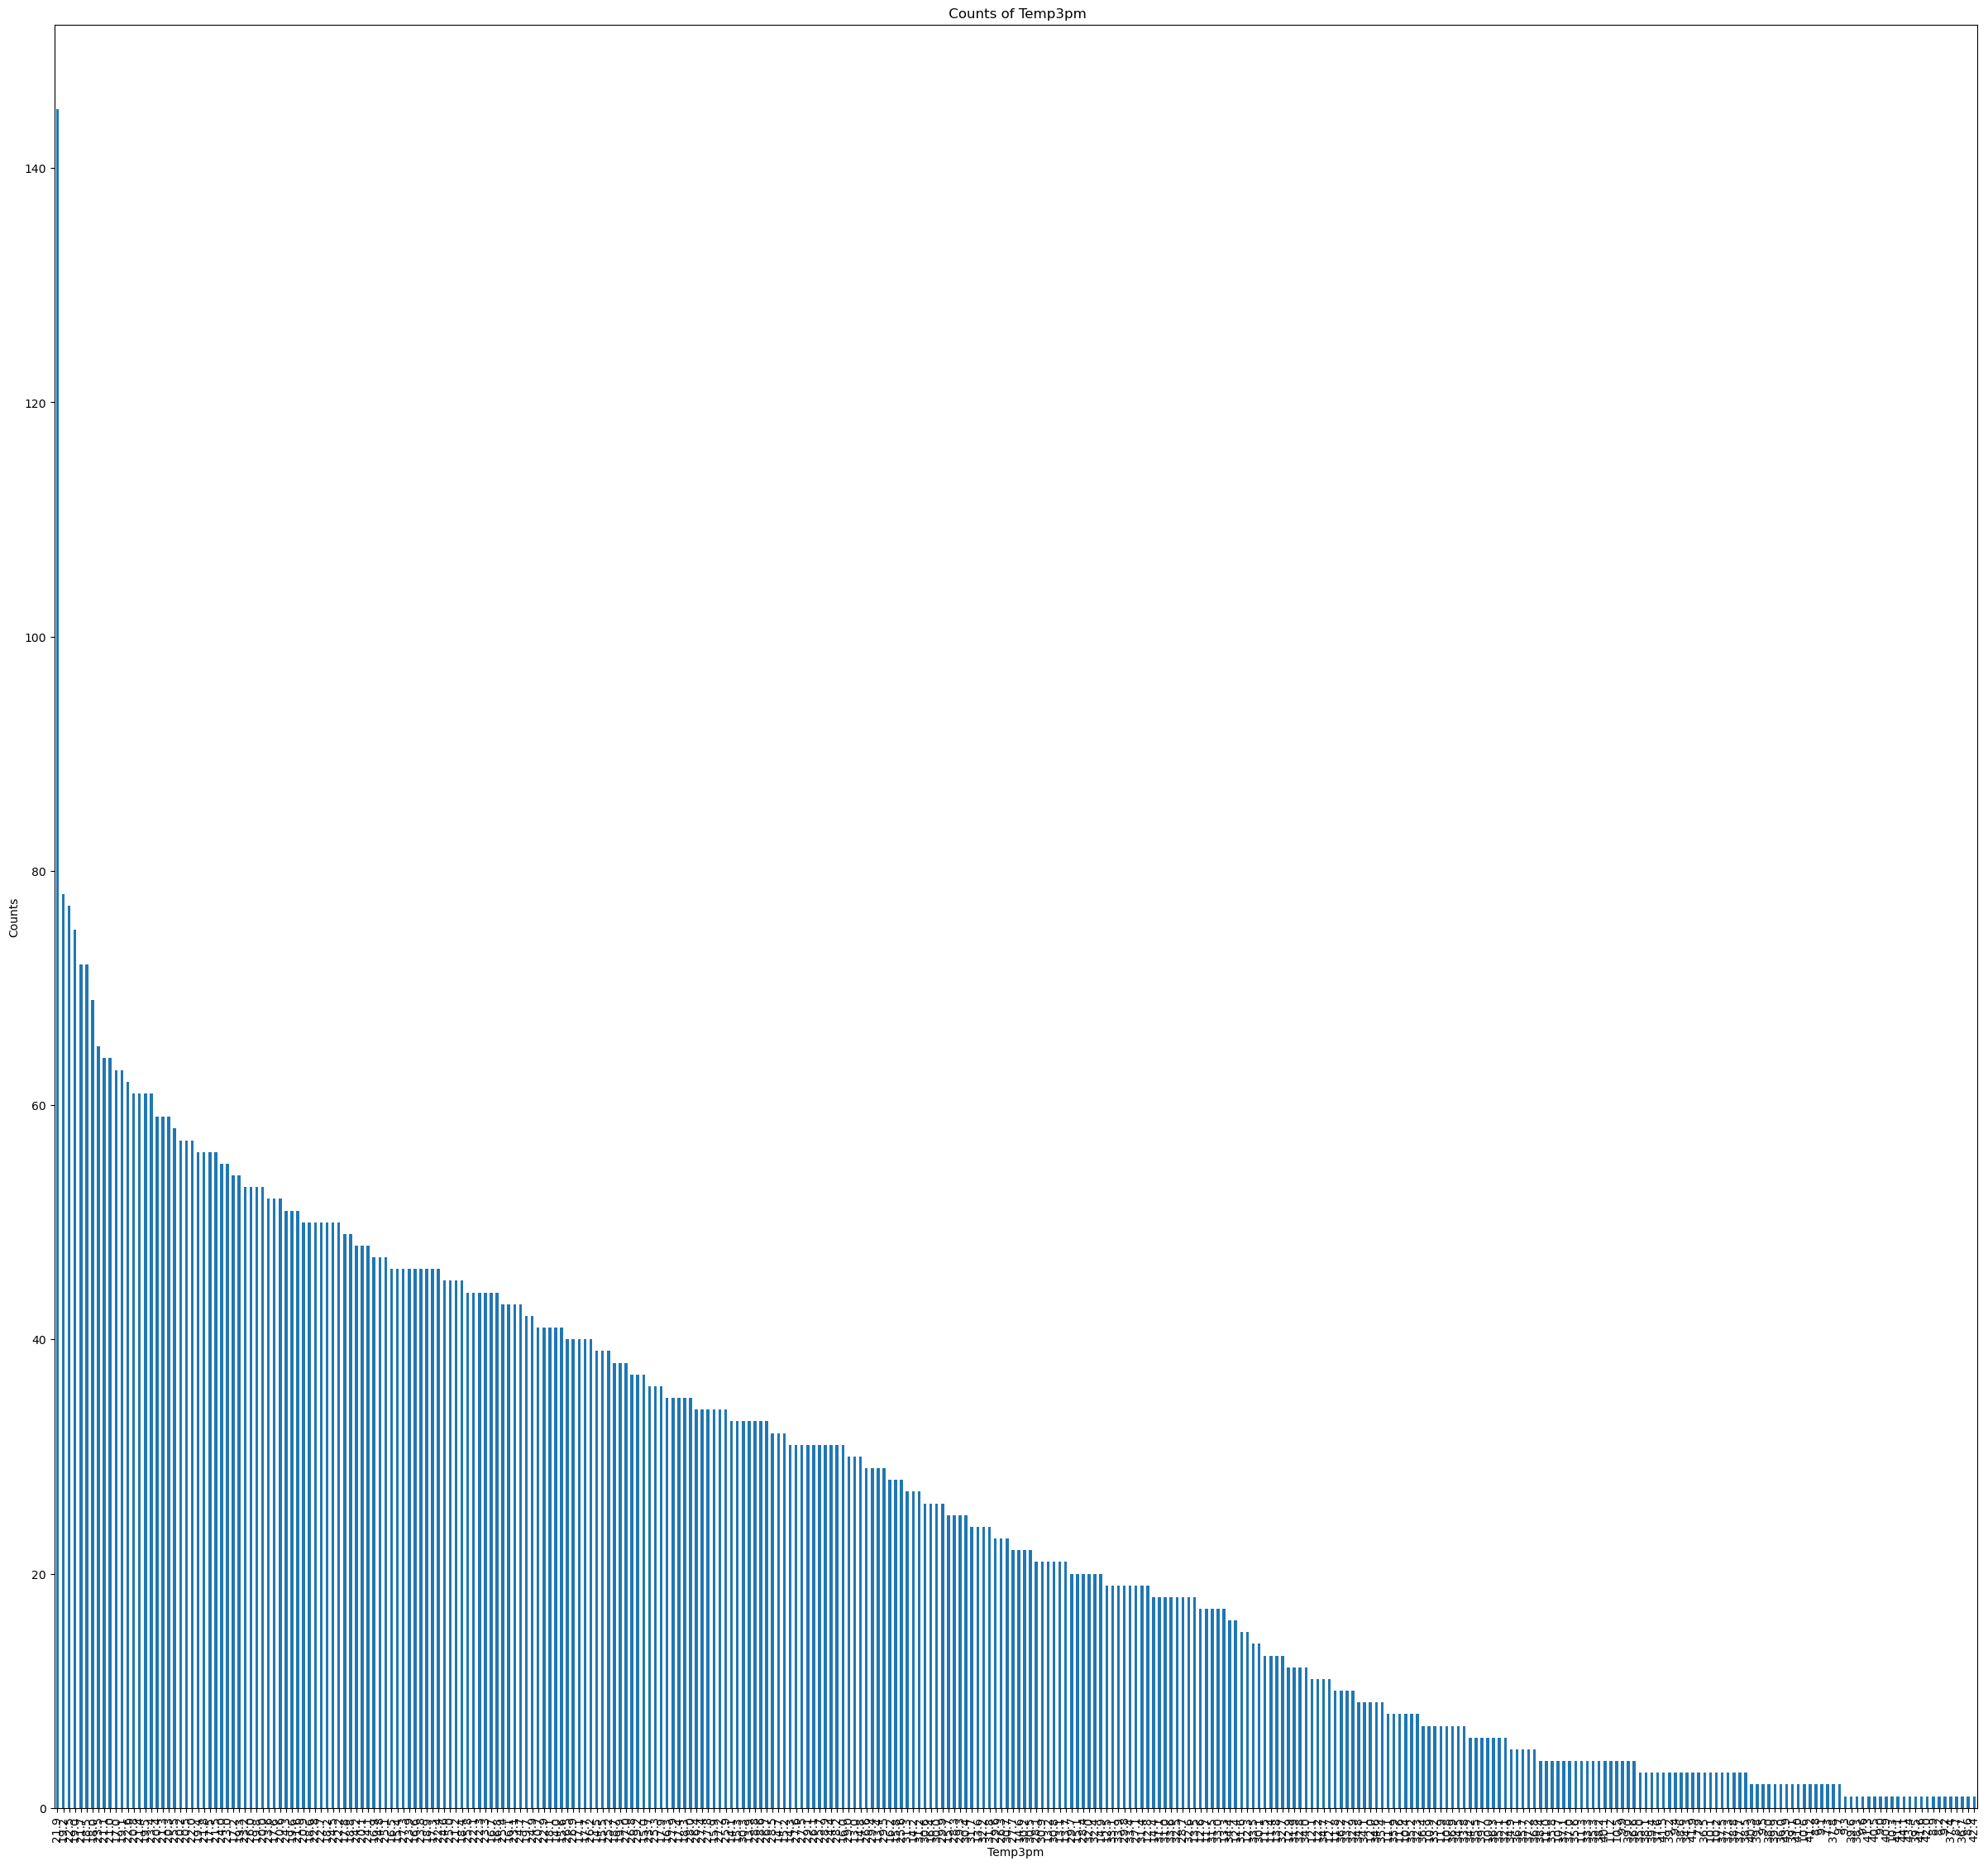

In [30]:
for column in Num_col:
    plt.figure(figsize=(30, 28)) 
    df[column].value_counts().plot(kind='bar') 
    plt.title(f' Counts of {column}') 
    plt.xlabel(column)  
    plt.ylabel('Counts') 
    plt.show()

In [31]:
#Mintemp - 13.19
#Maxtemp - 23.3
#Evaporation- 4.0
#Sunshine - 0.0
#Frequest Windgust speed recorded was 39
#Wind speed at 9 am - 9.0
#Wind speed at 3pm = 19.0
#Humidity at 9 am - 68.0
#Humditity at 3pm - 55.0
#Pressure at 9 am - 1014
#Pressure at 3pm -1017
#CLoud at 9 am - 7.0
#Cloud at 3pm - 7.0
#Temp at 9am - 14.8
#Temp at 3pm - 21.9

In [32]:
df.shape

(8425, 26)

In [33]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Sunshine', 'Rainfall', 'RainTomorrow']].corr()
corr

Sunshine  Rainfall  RainTomorrow
Sunshine      1.000000 -0.202931     -0.452829
Rainfall     -0.202931  1.000000      0.219015
RainTomorrow -0.452829  0.219015      1.000000

#here we can see a negative relationship which suggest that it does share a relationship with our target variable so we can apply iterarative imputer to fill in the NA values

In [34]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Evaporation', 'Rainfall', 'RainTomorrow']].corr()
corr

Evaporation  Rainfall  RainTomorrow
Evaporation      1.000000  0.045125     -0.077817
Rainfall         0.045125  1.000000      0.219015
RainTomorrow    -0.077817  0.219015      1.000000

In [35]:
#Poor relationship between Evaporation with our target variable!

In [36]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Cloud9am', 'Rainfall', 'RainTomorrow']].corr()
corr

Cloud9am  Rainfall  RainTomorrow
Cloud9am      1.000000  0.192417      0.319630
Rainfall      0.192417  1.000000      0.219015
RainTomorrow  0.319630  0.219015      1.000000

In [37]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Cloud3pm', 'Rainfall', 'RainTomorrow']].corr()
corr

Cloud3pm  Rainfall  RainTomorrow
Cloud3pm      1.000000  0.157753      0.393474
Rainfall      0.157753  1.000000      0.219015
RainTomorrow  0.393474  0.219015      1.000000

In [38]:
#Will have to keep these variables 

In [39]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Pressure3pm', 'Rainfall', 'RainTomorrow']].corr()
corr

Pressure3pm  Rainfall  RainTomorrow
Pressure3pm      1.000000 -0.033969     -0.147337
Rainfall        -0.033969  1.000000      0.219015
RainTomorrow    -0.147337  0.219015      1.000000

In [40]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['Pressure9am', 'Rainfall', 'RainTomorrow']].corr()
corr

Pressure9am  Rainfall  RainTomorrow
Pressure9am      1.000000 -0.075631     -0.178603
Rainfall        -0.075631  1.000000      0.219015
RainTomorrow    -0.178603  0.219015      1.000000

In [41]:
if df['RainTomorrow'].dtype == 'object':
    df['RainTomorrow'] = df['RainTomorrow'].map({'No':0, 'Yes':1})
corr = df[['WindGustSpeed', 'Rainfall', 'RainTomorrow']].corr()
corr

WindGustSpeed  Rainfall  RainTomorrow
WindGustSpeed       1.000000  0.100515      0.202039
Rainfall            0.100515  1.000000      0.219015
RainTomorrow        0.202039  0.219015      1.000000

In [42]:
#We will keep these too!

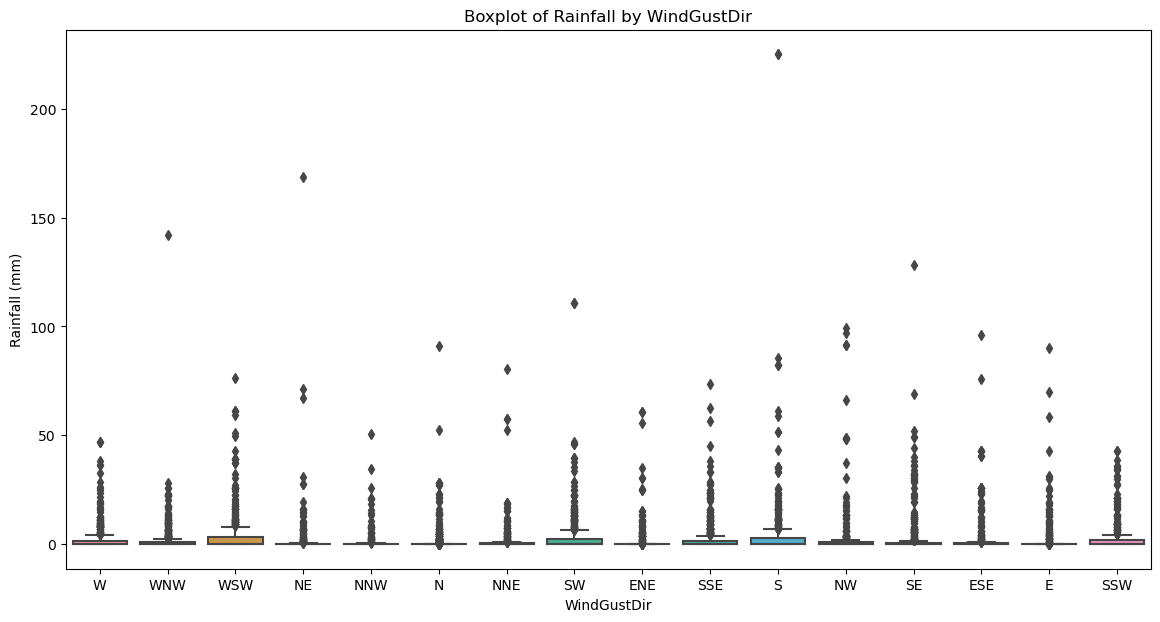

In [43]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='WindGustDir', y='Rainfall', data=df)
plt.title('Boxplot of Rainfall by WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('Rainfall (mm)')
plt.show()

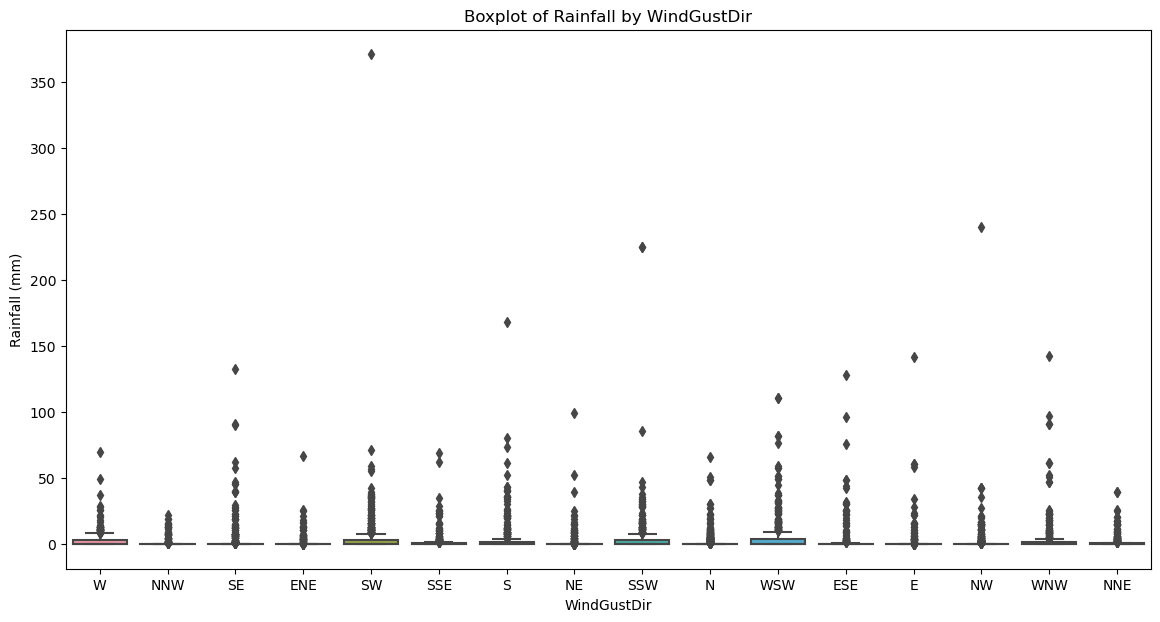

In [44]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='WindDir9am', y='Rainfall', data=df)
plt.title('Boxplot of Rainfall by WindGustDir')
plt.xlabel('WindGustDir')
plt.ylabel('Rainfall (mm)')
plt.show()

In [45]:
#Its really hard to pinpoint weather there is a relationship or not since there are many days with no rain and too many outliers.

In [46]:
#I can just fill in WindGustDir and WindDir9am since its categorical and it wouldn't make a huge 

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [48]:
imputer = IterativeImputer(estimator=RandomForestRegressor(), max_iter=10, random_state=0)
impute_columns = ['WindGustSpeed','Cloud9am', 'Cloud3pm', 'Pressure9am', 'Pressure3pm', 'Sunshine']

In [49]:
columns = [col for col in impute_columns if col in df.columns]
df[columns] = imputer.fit_transform(df[columns])

In [50]:
df[columns].isnull().sum()

WindGustSpeed    0
Cloud9am         0
Cloud3pm         0
Pressure9am      0
Pressure3pm      0
Sunshine         0
dtype: int64

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>],
       [<Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>],
       [<Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>,
        <Axes: title={'center': 'RainTomorrow'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'year'}>, <Axes: >, <Axes: >

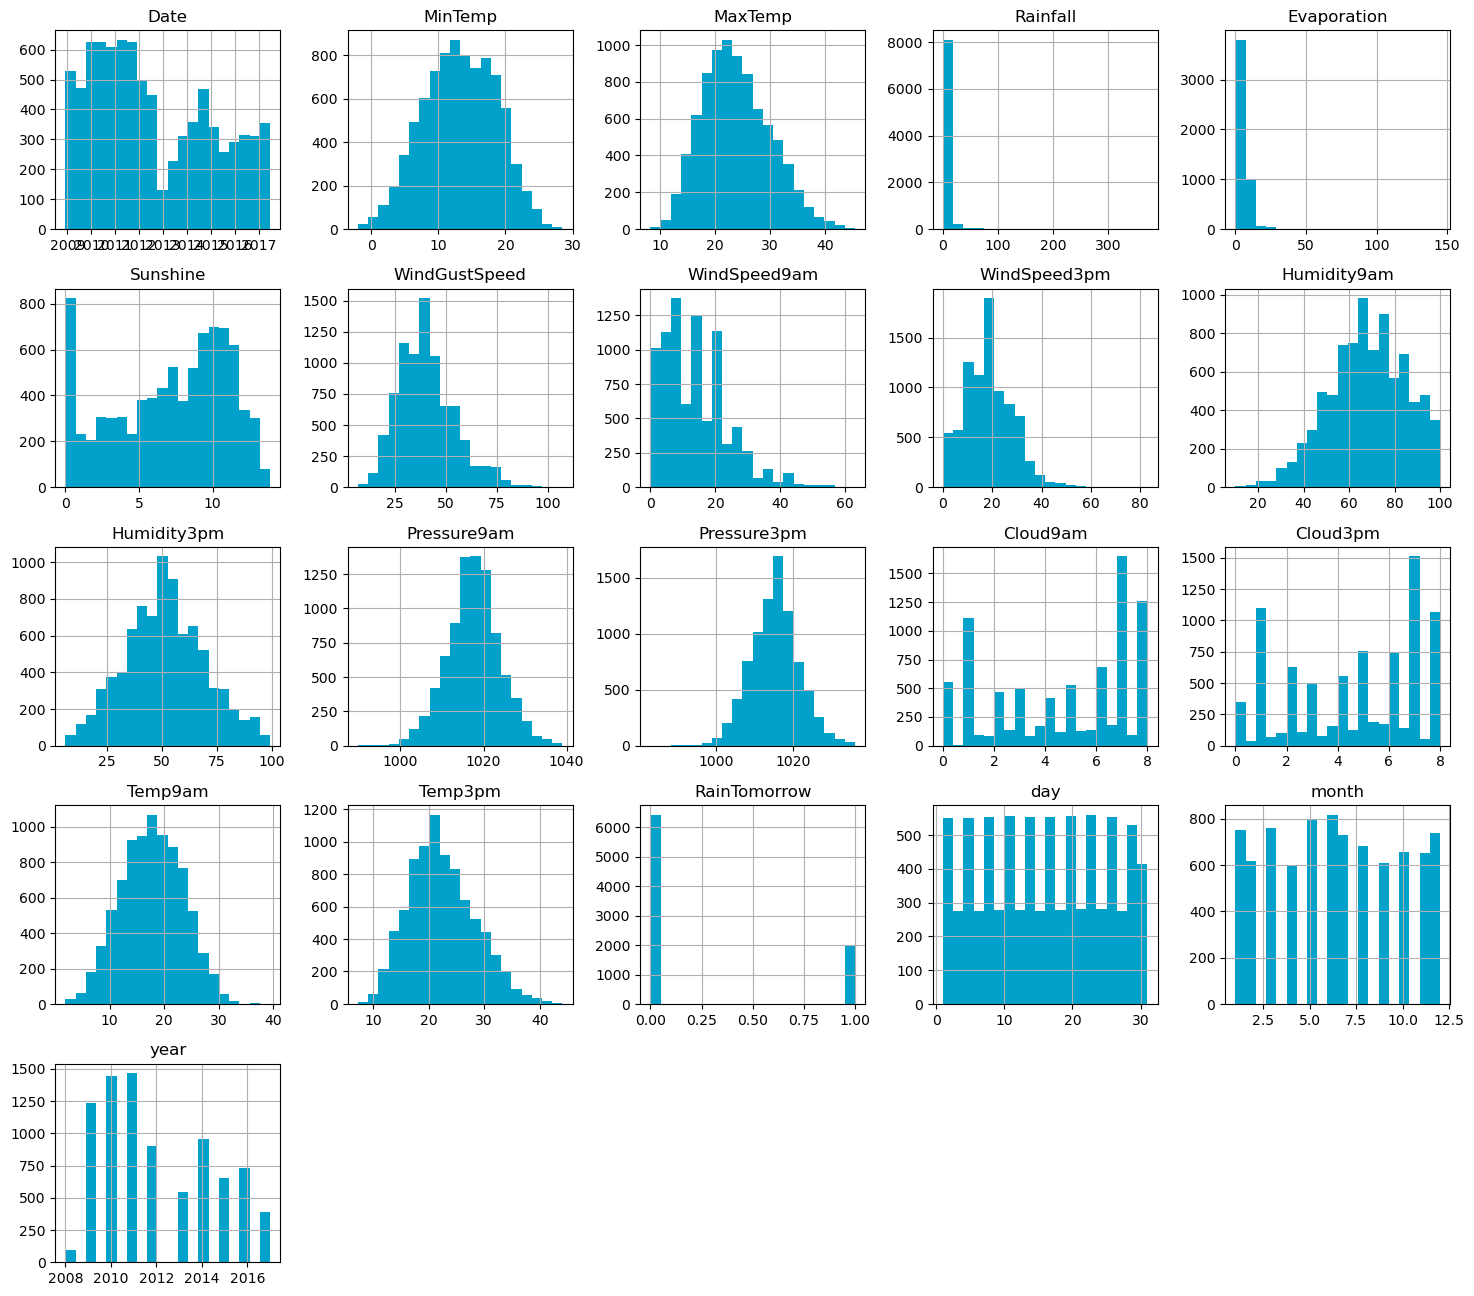

In [51]:
df.hist(bins=20, figsize=(18,16), color='#00a1cb')

In [52]:
pd.set_option('display.max_columns', 100)
df.describe()

Date      MinTemp      MaxTemp     Rainfall  \
count                           8425  8425.000000  8425.000000  8425.000000   
mean   2012-08-05 10:18:43.798219520    13.193305    23.855988     2.725982   
min              2008-12-01 00:00:00    -2.000000     8.200000     0.000000   
25%              2010-07-13 00:00:00     9.300000    19.300000     0.000000   
50%              2011-12-24 00:00:00    13.200000    23.300000     0.000000   
75%              2014-09-11 00:00:00    17.300000    28.000000     0.800000   
max              2017-06-25 00:00:00    28.500000    45.500000   371.000000   
std                              NaN     5.379488     6.114697    10.319872   

       Evaporation     Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  4913.000000  8425.000000    8425.000000   8425.000000   8425.000000   
mean      5.389395     7.132716      40.202182     13.840000     18.539585   
min       0.000000     0.000000       7.000000      0.000000      0.000000   
25%       2.600000     4.001000      31.000000      6.000000     11.000000   
50%       4.600000     7.800000      39.000000     13.000000     19.000000   
75%       7.000000    10.372000      48.000000     20.000000     24.000000   
max     145.000000    13.900000     107.000000     63.000000     83.000000   
std       5.044484     3.870651      13.959179     10.128896      9.704899   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean     67.823739    51.249790  1017.659165  1015.229623     4.650571   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1013.600000  1011.200000     2.000000   
50%      68.000000    51.000000  1017.700000  1015.500000     5.000000   
75%      80.000000    63.000000  1021.500000  1018.961000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   
std      16.774237    18.311894     6.357861     6.295617     2.675063   

          Cloud3pm      Temp9am      Temp3pm  RainTomorrow          day  \
count  8425.000000  8425.000000  8425.000000   8425.000000  8425.000000   
mean      4.602567    17.762015    22.436748      0.236320    15.741958   
min       0.000000     1.900000     7.300000      0.000000     1.000000   
25%       2.000000    13.800000    18.100000      0.000000     8.000000   
50%       5.000000    17.762015    21.900000      0.000000    16.000000   
75%       7.000000    21.900000    26.300000      0.000000    23.000000   
max       8.000000    39.400000    44.100000      1.000000    31.000000   
std       2.528109     5.608301     5.946128      0.424846     8.787354   

             month         year  
count  8425.000000  8425.000000  
mean      6.442136  2012.102433  
min       1.000000  2008.000000  
25%       3.000000  2010.000000  
50%       6.000000  2011.000000  
75%       9.000000  2014.000000  
max      12.000000  2017.000000  
std       3.437994     2.473137

In [53]:
#Some Univariate graphs

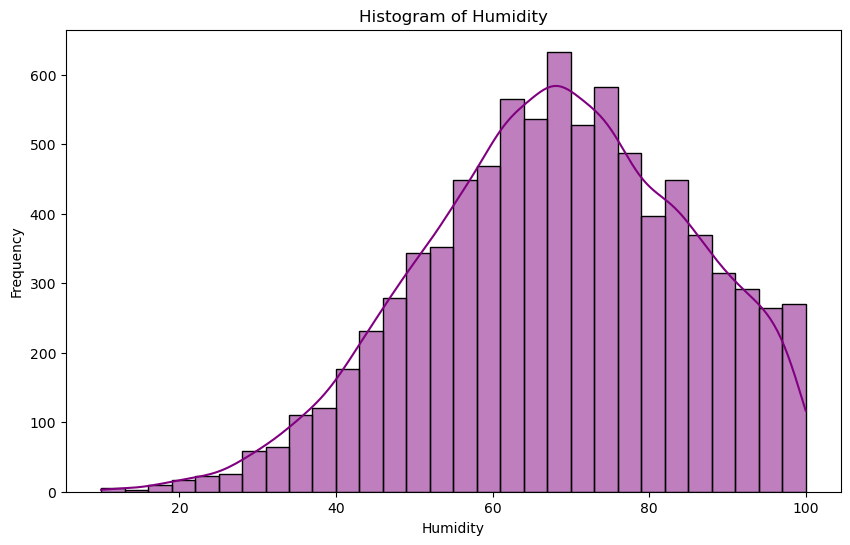

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Humidity9am'], bins=30, kde=True, color='purple')
plt.title('Histogram of Humidity')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

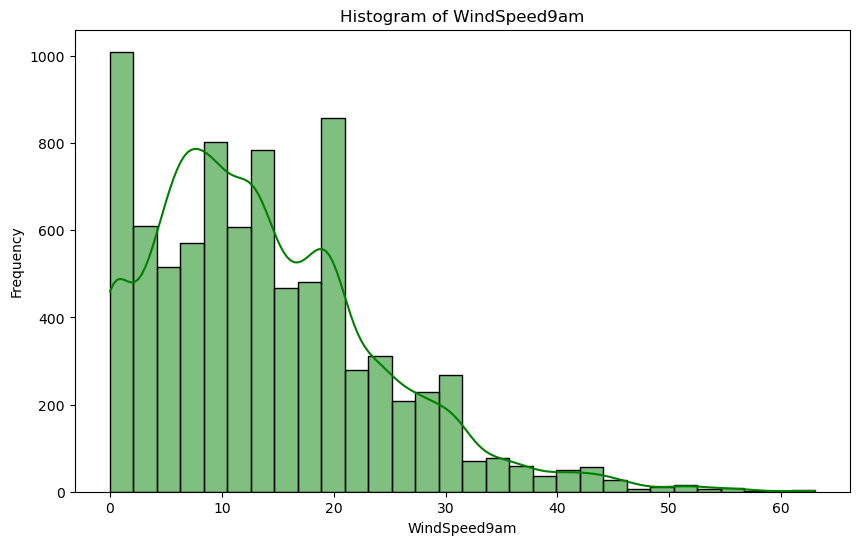

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WindSpeed9am'], bins=30, kde=True, color='green')
plt.title('Histogram of WindSpeed9am')
plt.xlabel('WindSpeed9am')
plt.ylabel('Frequency')
plt.show()

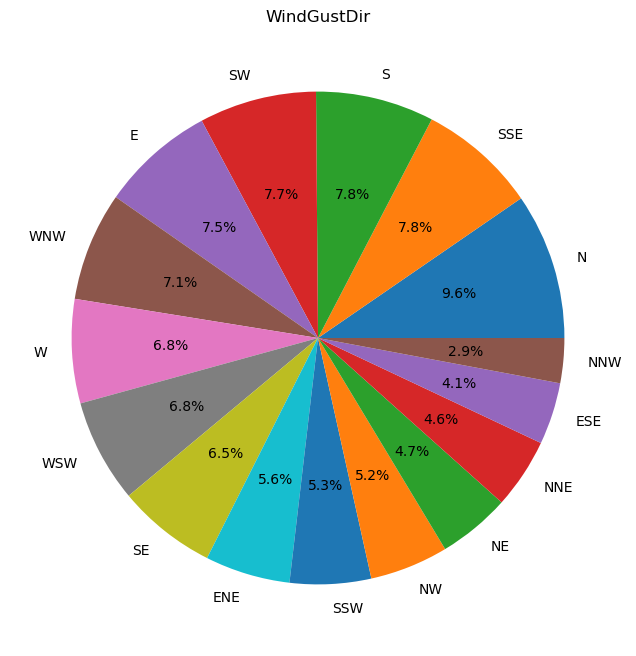

In [56]:
WindGustDir = df['WindGustDir'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(WindGustDir, labels=WindGustDir.index, autopct='%1.1f%%')
plt.title('WindGustDir')
plt.show()

In [57]:
#We can see that Higher winds takes place in the North side followed by South East

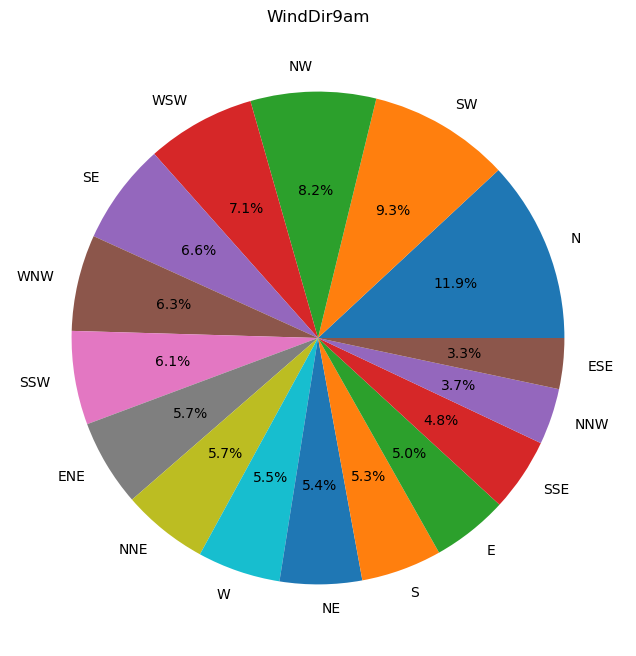

In [58]:
WindDir9am = df['WindDir9am'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(WindDir9am, labels=WindDir9am.index, autopct='%1.1f%%')
plt.title('WindDir9am')
plt.show()

In [59]:
#Even in the morning again, we can see higher winds in the north but in southwest as well

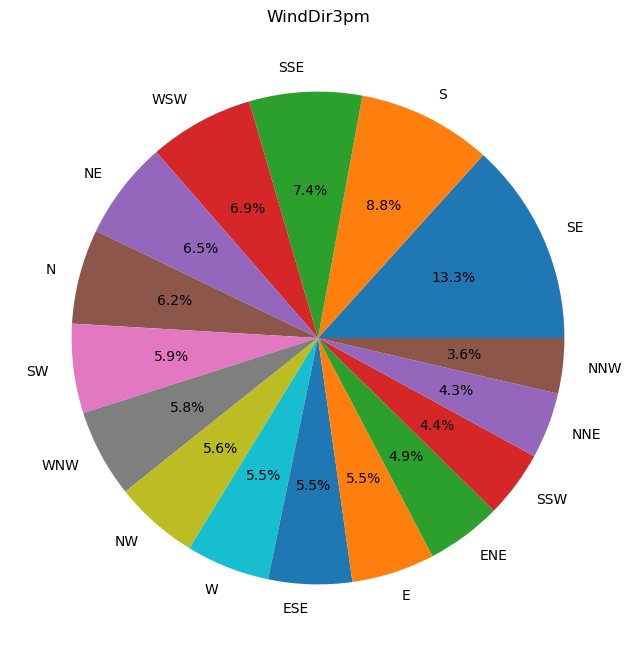

In [60]:
WindDir3pm = df['WindDir3pm'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(WindDir3pm, labels=WindDir3pm.index, autopct='%1.1f%%')
plt.title('WindDir3pm')
plt.show()

In [61]:
#Wind at 3pm tends to be higher in the South East Area. 

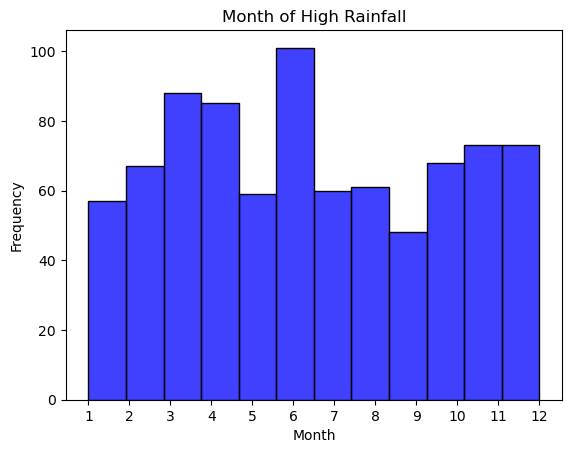

In [62]:
high_rain = df[df['Rainfall'] > df['Rainfall'].quantile(0.9)]['month']
sns.histplot(high_rain, bins=12, kde=False, color='blue')
plt.title('Month of High Rainfall')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(1, 13), labels=[str(month) for month in range(1, 13)])
plt.show()

In [63]:
#We can see that rainfall is higher during june, march and april

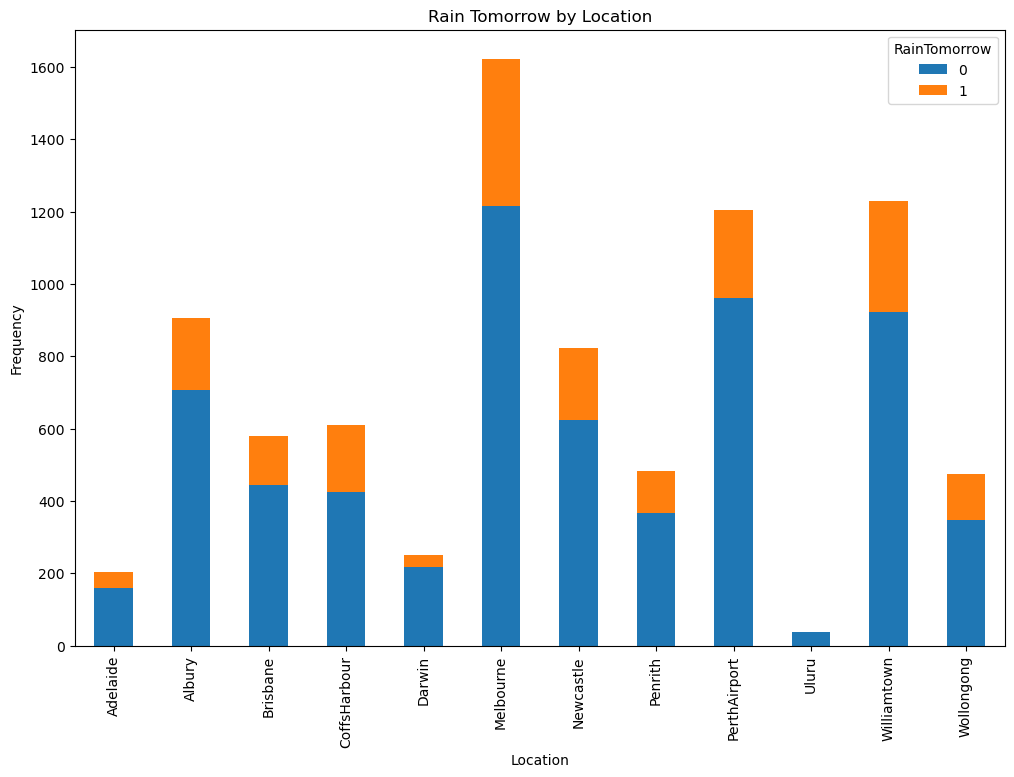

In [64]:
Rain_tom = df.groupby('Location')['RainTomorrow'].value_counts().unstack()
Rain_tom.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Rain Tomorrow by Location')
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.show()

In [65]:
#Seems like very less chances of rain but could be in Melbourne

In [66]:
Top_days = df.nlargest(10, 'Rainfall')
print(Top_days[['day', 'year', 'month', 'Location', 'Rainfall', 'MinTemp']])

      day  year  month      Location  Rainfall    MinTemp
1149    7  2009     11  CoffsHarbour     371.0  17.400000
2201   23  2015      4     Newcastle     240.0  13.193305
2900    6  2016      1   Williamtown     225.0  18.500000
3752    6  2016      1   Williamtown     225.0  18.500000
6489   25  2012      1      Brisbane     168.4  21.300000
8144   14  2012      3        Darwin     142.2  24.100000
1138   27  2009     10  CoffsHarbour     141.8  17.300000
1680   18  2013     11     Newcastle     132.5  11.200000
1480    4  2010     10  CoffsHarbour     128.0  16.200000
3003   18  2016      4   Williamtown     110.8  16.000000


In [67]:
Top_days = df.nlargest(10, 'Rainfall')
print(Top_days[['day', 'year', 'month', 'Location', 'Rainfall', 'MinTemp', 'Cloud9am']])

      day  year  month      Location  Rainfall    MinTemp  Cloud9am
1149    7  2009     11  CoffsHarbour     371.0  17.400000       8.0
2201   23  2015      4     Newcastle     240.0  13.193305       6.0
2900    6  2016      1   Williamtown     225.0  18.500000       8.0
3752    6  2016      1   Williamtown     225.0  18.500000       8.0
6489   25  2012      1      Brisbane     168.4  21.300000       8.0
8144   14  2012      3        Darwin     142.2  24.100000       8.0
1138   27  2009     10  CoffsHarbour     141.8  17.300000       8.0
1680   18  2013     11     Newcastle     132.5  11.200000       8.0
1480    4  2010     10  CoffsHarbour     128.0  16.200000       8.0
3003   18  2016      4   Williamtown     110.8  16.000000       7.0


In [68]:
Lowest = df[df['Rainfall'] > 0].nsmallest(10, 'Rainfall')
print(Lowest[['day', 'month', 'year', 'Location', 'Rainfall']])

      day  month  year   Location  Rainfall
1860   17      5  2014  Newcastle       0.1
1865   22      5  2014  Newcastle       0.1
1875    1      6  2014  Newcastle       0.1
1887   13      6  2014  Newcastle       0.1
1891   17      6  2014  Newcastle       0.1
1893   19      6  2014  Newcastle       0.1
1894   20      6  2014  Newcastle       0.1
1897   23      6  2014  Newcastle       0.1
1901   27      6  2014  Newcastle       0.1
1905    1      7  2014  Newcastle       0.1


In [69]:
#Lowest was in 2014 during May June and July 

In [70]:
Lowest = df[df['Rainfall'] > 0].nsmallest(10, 'Rainfall')
print(Lowest[['day', 'month', 'year', 'Location', 'Rainfall', 'MinTemp']])

      day  month  year   Location  Rainfall  MinTemp
1860   17      5  2014  Newcastle       0.1      9.4
1865   22      5  2014  Newcastle       0.1     11.2
1875    1      6  2014  Newcastle       0.1     12.5
1887   13      6  2014  Newcastle       0.1      8.8
1891   17      6  2014  Newcastle       0.1      9.4
1893   19      6  2014  Newcastle       0.1      6.6
1894   20      6  2014  Newcastle       0.1      9.3
1897   23      6  2014  Newcastle       0.1      7.2
1901   27      6  2014  Newcastle       0.1      8.2
1905    1      7  2014  Newcastle       0.1      5.9


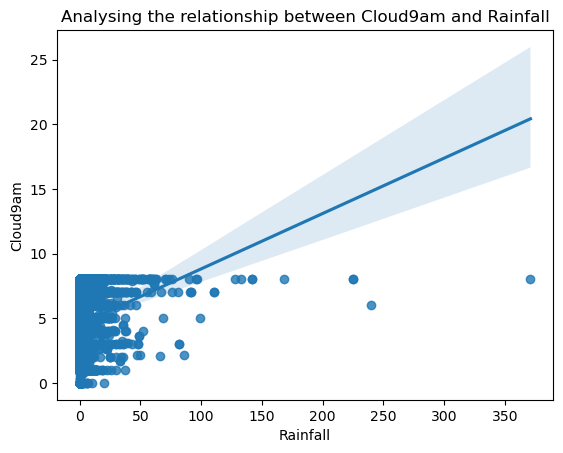

In [71]:
sns.regplot(x='Rainfall', y='Cloud9am', data=df)
plt.title('Analysing the relationship between Cloud9am and Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Cloud9am')
plt.show()

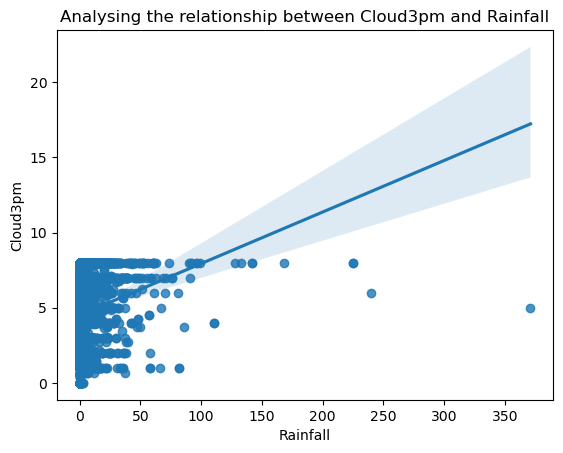

In [72]:
sns.regplot(x='Rainfall', y='Cloud3pm', data=df)
plt.title('Analysing the relationship between Cloud3pm and Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Cloud3pm')
plt.show()

In [73]:
#Here we see a positive relationship between 

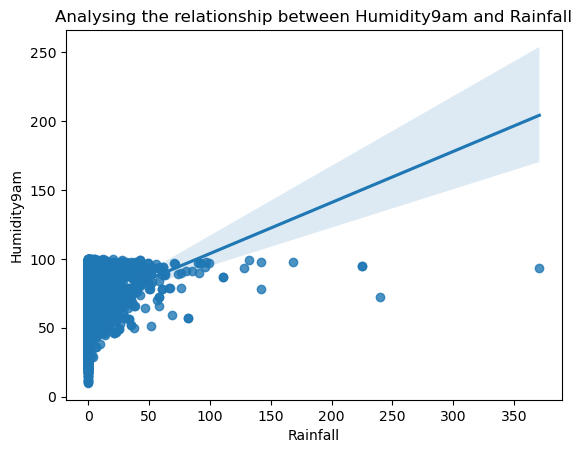

In [74]:
sns.regplot(x='Rainfall', y='Humidity9am', data=df)
plt.title('Analysing the relationship between Humidity9am and Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Humidity9am')
plt.show()

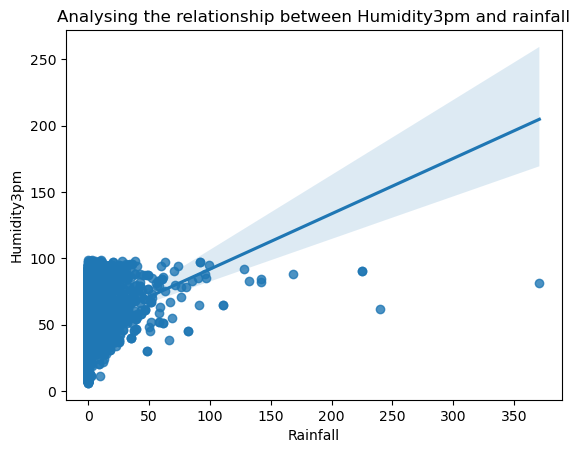

In [75]:
sns.regplot(x='Rainfall', y='Humidity3pm', data=df)
plt.title('Analysing the relationship between Humidity3pm and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Humidity3pm')
plt.show()

In [76]:
#Similarly with humidity levels

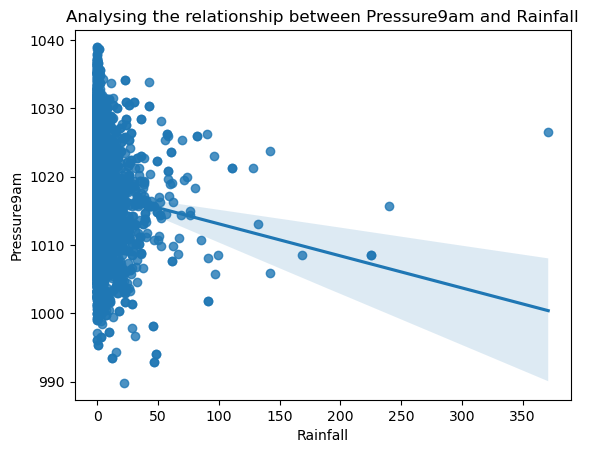

In [77]:
sns.regplot(x='Rainfall', y='Pressure9am', data=df)
plt.title('Analysing the relationship between Pressure9am and Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Pressure9am')
plt.show()

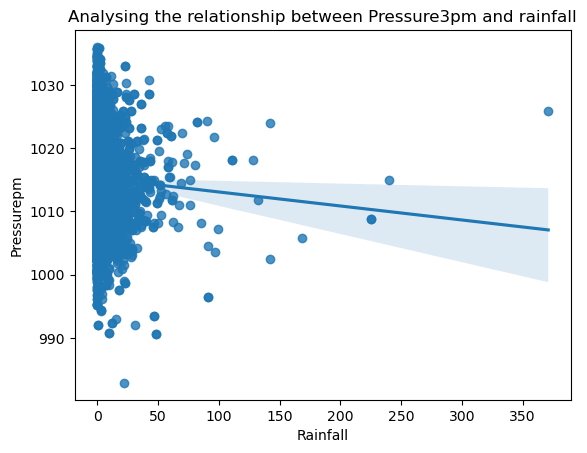

In [78]:
sns.regplot(x='Rainfall', y='Pressure3pm', data=df)
plt.title('Analysing the relationship between Pressure3pm and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Pressurepm')
plt.show()

In [79]:
#A negative relationship with pressure and rainfall, when pressure is low, there is a higher tendency for rainfall

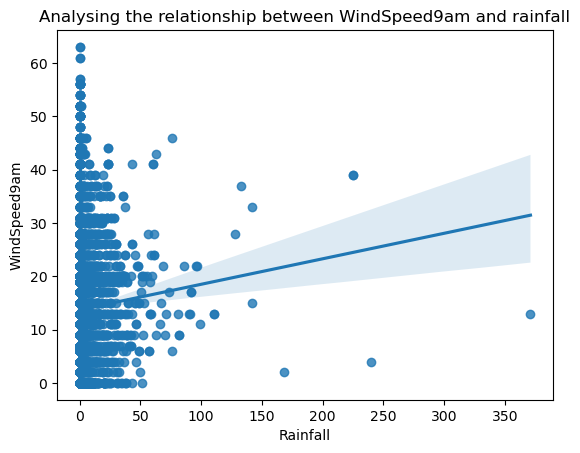

In [80]:
sns.regplot(x='Rainfall', y='WindSpeed9am', data=df)
plt.title('Analysing the relationship between WindSpeed9am and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('WindSpeed9am')
plt.show()

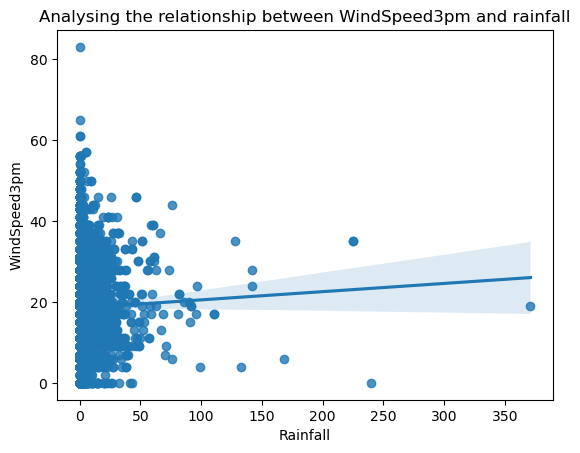

In [81]:
sns.regplot(x='Rainfall', y='WindSpeed3pm', data=df)
plt.title('Analysing the relationship between WindSpeed3pm and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('WindSpeed3pm')
plt.show()

In [82]:
#Positive relationship between rainfall and windspeed

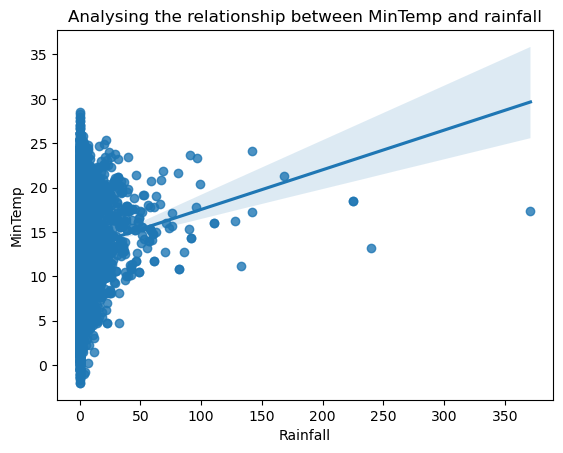

In [83]:
sns.regplot(x='Rainfall', y='MinTemp', data=df)
plt.title('Analysing the relationship between MinTemp and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('MinTemp')
plt.show()

In [84]:
#Positive relationship between min and rainfall

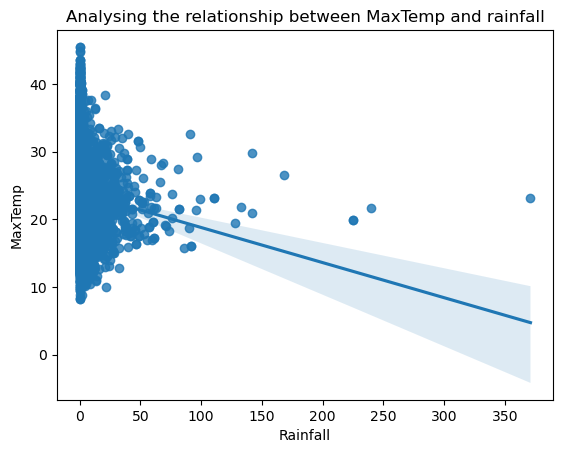

In [85]:
sns.regplot(x='Rainfall', y='MaxTemp', data=df)
plt.title('Analysing the relationship between MaxTemp and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('MaxTemp')
plt.show()

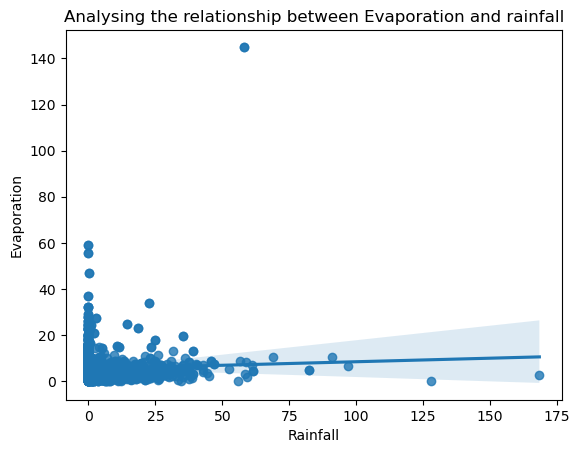

In [86]:
sns.regplot(x='Rainfall', y='Evaporation', data=df)
plt.title('Analysing the relationship between Evaporation and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Evaporation')
plt.show()

In [87]:
#not a strong relation

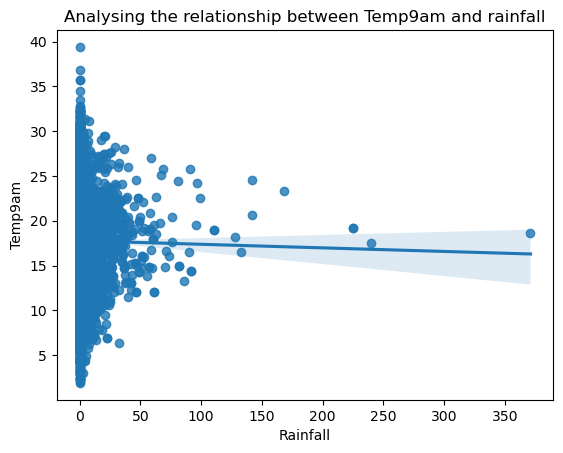

In [88]:
sns.regplot(x='Rainfall', y='Temp9am', data=df)
plt.title('Analysing the relationship between Temp9am and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Temp9am')
plt.show()

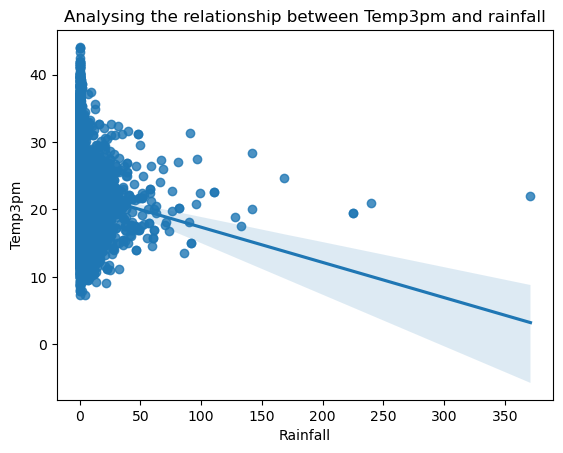

In [89]:
sns.regplot(x='Rainfall', y='Temp3pm', data=df)
plt.title('Analysing the relationship between Temp3pm and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Temp3pm')
plt.show()

In [90]:
#Negative relationship between temp3pm and rainfall whereas a neutral with temp 9am and rainfall

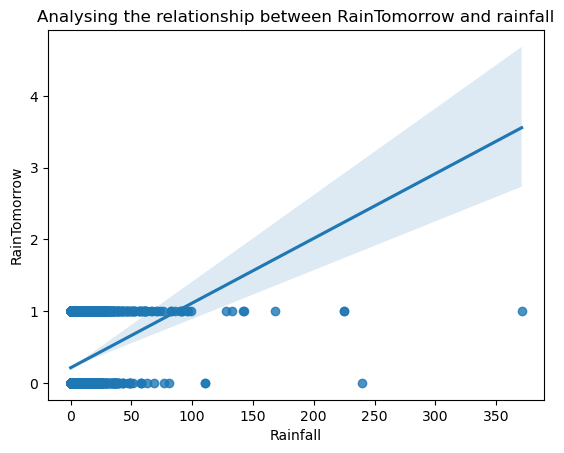

In [91]:
sns.regplot(x='Rainfall', y='RainTomorrow', data=df)
plt.title('Analysing the relationship between RainTomorrow and rainfall')
plt.xlabel('Rainfall')
plt.ylabel('RainTomorrow')
plt.show()

In [92]:
#Positive relationship between rainfall and raintomorrow

In [93]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3512
Sunshine            0
WindGustDir       991
WindGustSpeed       0
WindDir9am        829
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
day                 0
month               0
year                0
dtype: int64

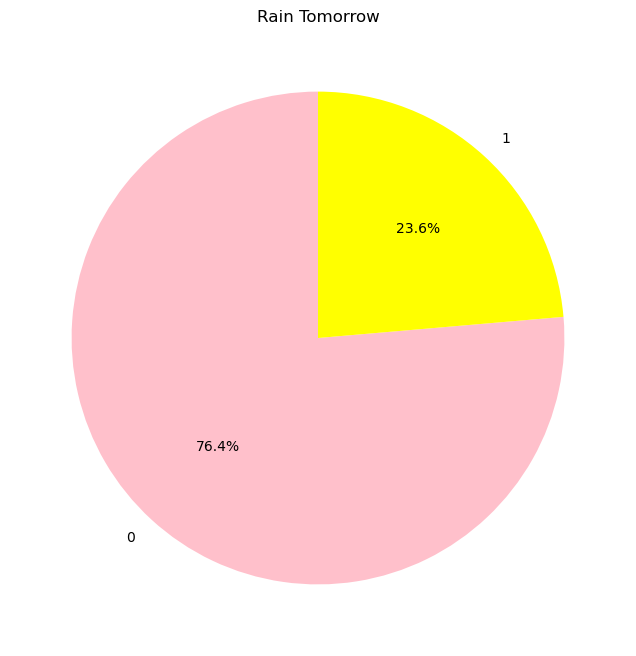

In [94]:
Counts_RT = df['RainTomorrow'].value_counts()
plt.figure(figsize=(8, 8))
Counts_RT.plot.pie(autopct='%1.1f%%', startangle=90, colors=['pink', 'yellow'])
plt.title('Rain Tomorrow')
plt.ylabel('')
plt.show()

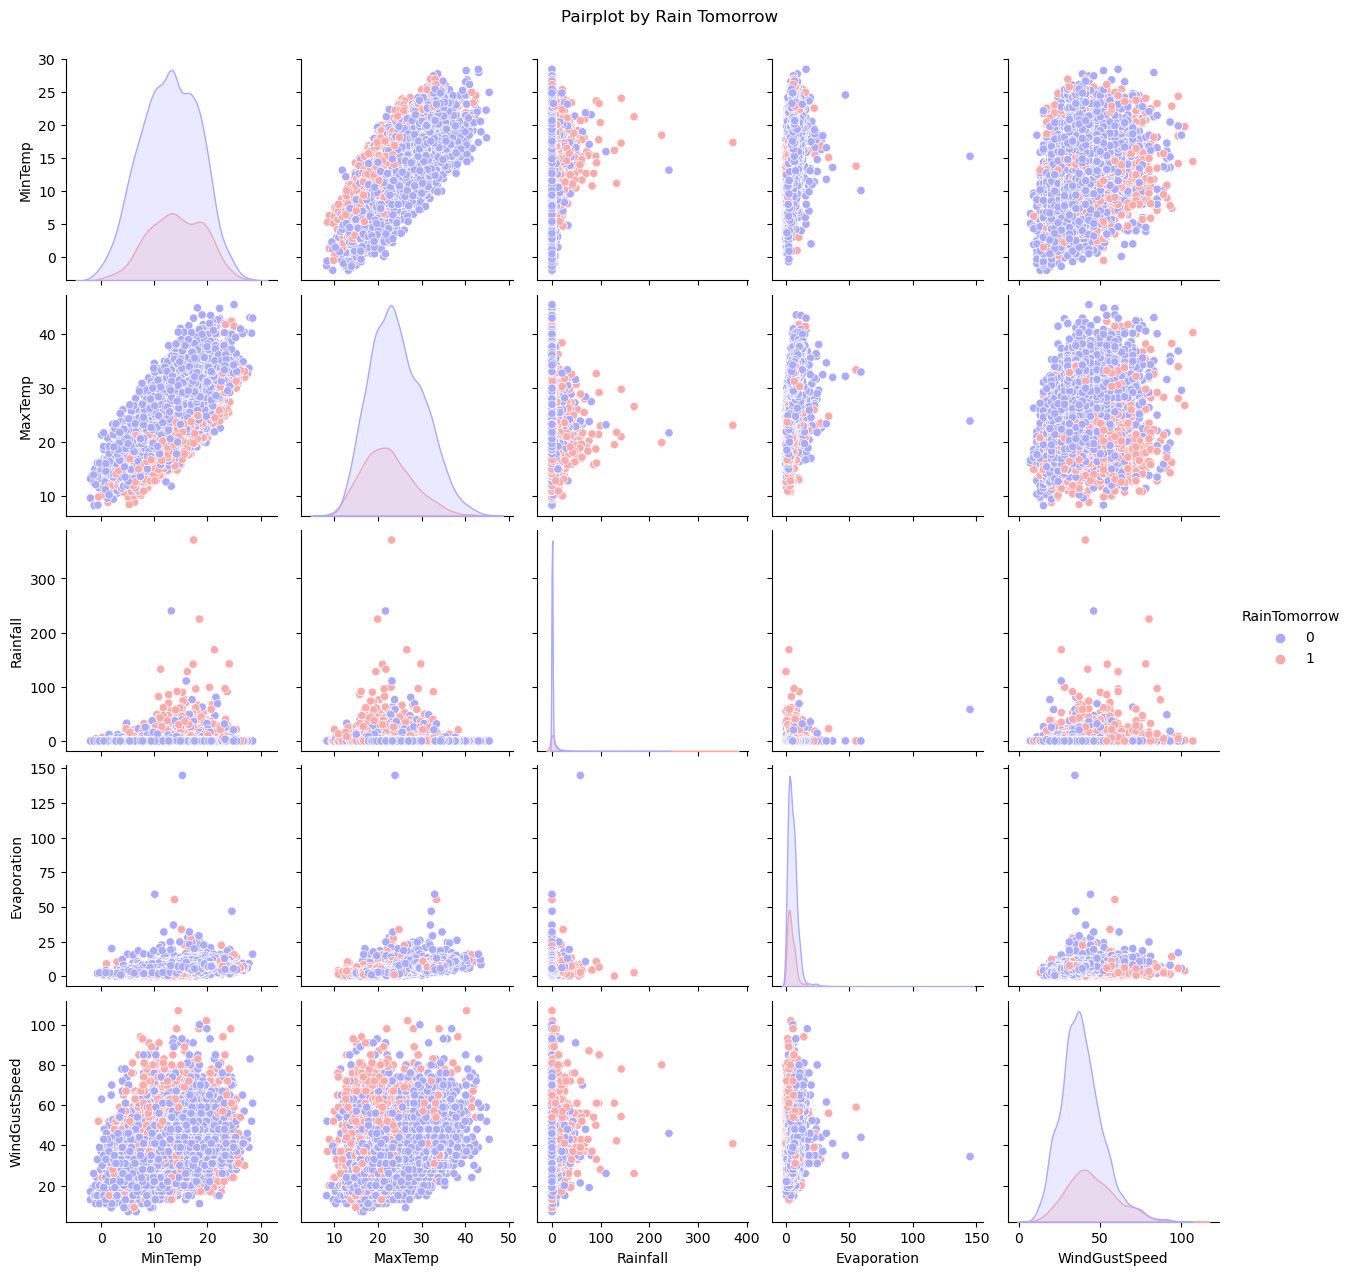

In [95]:
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'RainTomorrow']], hue='RainTomorrow', palette='bwr')
plt.suptitle('Pairplot by Rain Tomorrow', y=1.02)
plt.show()

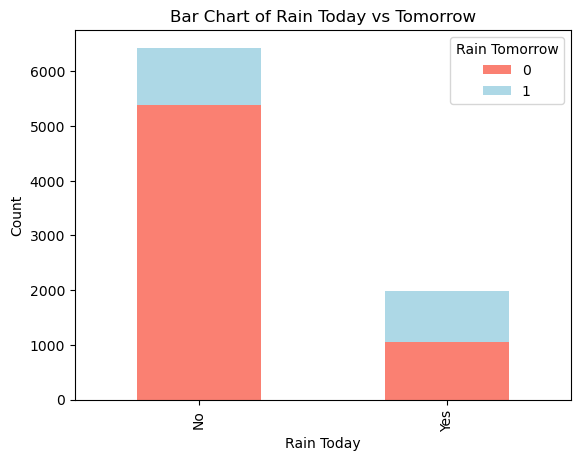

In [96]:
rain_tt = pd.crosstab(df['RainToday'], df['RainTomorrow'])
rain_tt.plot(kind='bar', stacked=True, color=['salmon', 'lightblue'])
plt.title('Bar Chart of Rain Today vs Tomorrow')
plt.xlabel('Rain Today')
plt.ylabel('Count')
plt.legend(title='Rain Tomorrow')
plt.show()

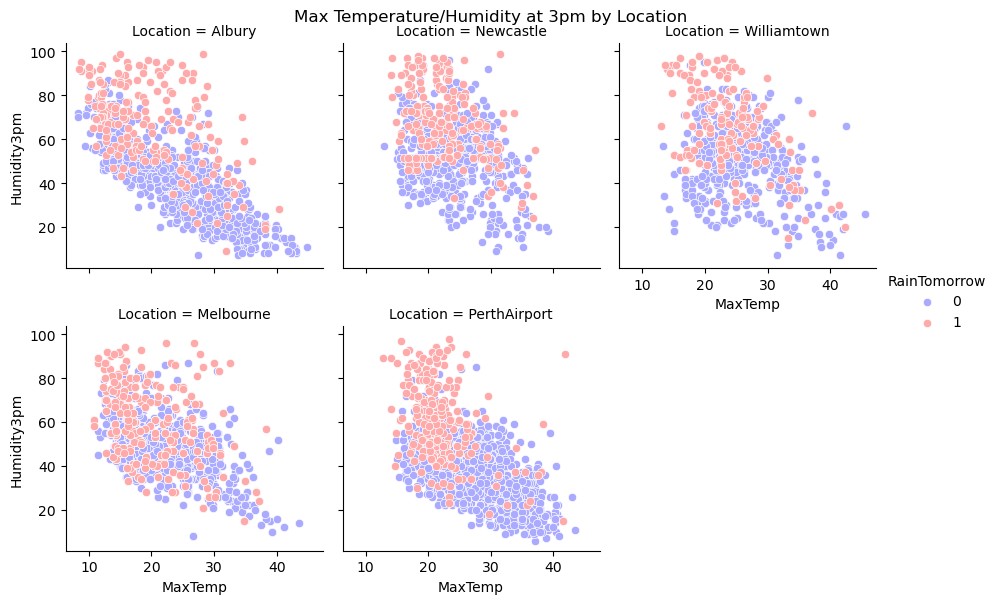

In [97]:
Top_Loc = df['Location'].value_counts().index[:5]
v = sns.FacetGrid(df[df['Location'].isin(Top_Loc)], col='Location', hue='RainTomorrow', palette='bwr', col_wrap=3)
v.map(sns.scatterplot, 'MaxTemp', 'Humidity3pm')
v.add_legend()
v.fig.suptitle('Max Temperature/Humidity at 3pm by Location', y=1.0)
plt.show()

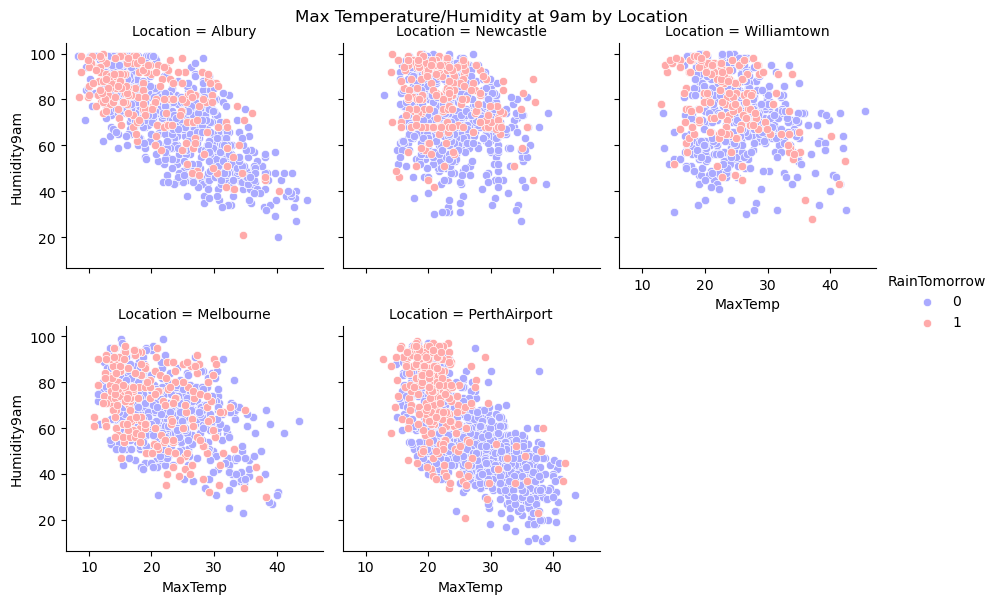

In [98]:
Top_Loc = df['Location'].value_counts().index[:5]
v = sns.FacetGrid(df[df['Location'].isin(Top_Loc)], col='Location', hue='RainTomorrow', palette='bwr', col_wrap=3)
v.map(sns.scatterplot, 'MaxTemp', 'Humidity9am')
v.add_legend()
v.fig.suptitle('Max Temperature/Humidity at 9am by Location', y=1.0)
plt.show()

In [99]:
#Higher humidity indicates higher rain fall

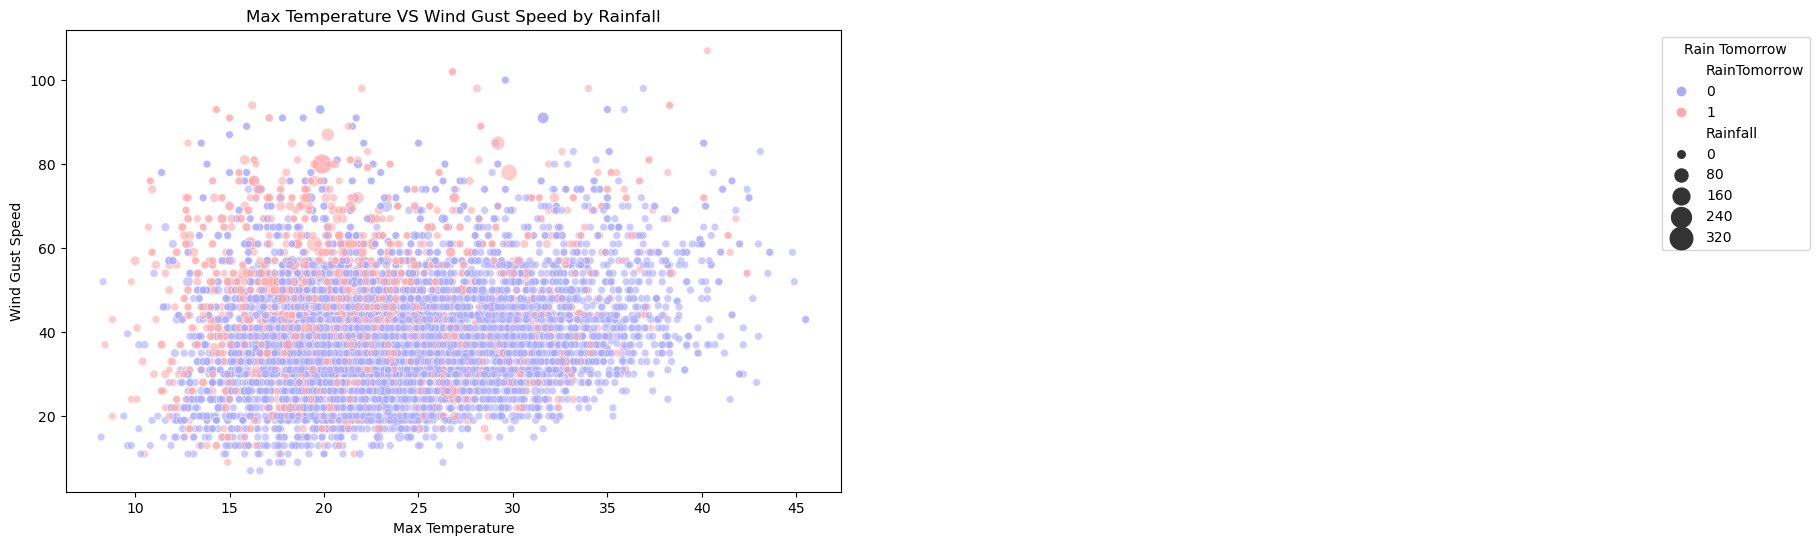

In [100]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaxTemp', y='WindGustSpeed', size='Rainfall', sizes=(30, 300), data=df, hue='RainTomorrow', palette='bwr', alpha=0.6)
plt.title('Max Temperature VS Wind Gust Speed by Rainfall')
plt.xlabel('Max Temperature')
plt.ylabel('Wind Gust Speed')
plt.legend(title='Rain Tomorrow', bbox_to_anchor=(2.05, 1), loc=2)
plt.show()

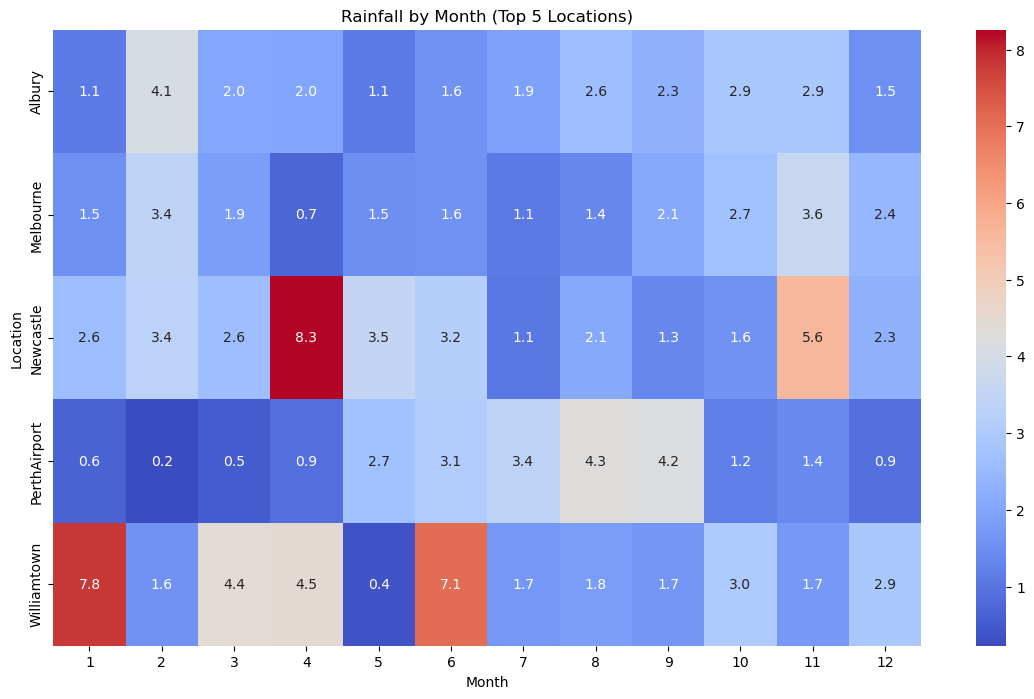

In [101]:
pivot = df[df['Location'].isin(Top_Loc)].pivot_table(values='Rainfall', index='Location', columns='month', aggfunc='mean')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Rainfall by Month (Top 5 Locations)')
plt.ylabel('Location')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(0.5, len(pivot.columns), 1), labels=[str(month) for month in range(1, 13)])
plt.show()

In [102]:
#We can see the location by average rain and via month as well. We can see that it is higher in William & Newcastle

In [103]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation      3512
Sunshine            0
WindGustDir       991
WindGustSpeed       0
WindDir9am        829
WindDir3pm          0
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
day                 0
month               0
year                0
dtype: int64

In [104]:
WindGustDir_mode = df['WindGustDir'].mode()[0] 
WindDir9am_mode = df['WindDir9am'].mode()[0] 
df['WindGustDir'].fillna(WindGustDir_mode, inplace=True)
df['WindDir9am'].fillna(WindDir9am_mode, inplace=True)

In [105]:
df = df.drop('Evaporation', axis=1)

In [106]:
df = df.drop('Date', axis=1)

In [107]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
day              0
month            0
year             0
dtype: int64

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
Cat=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
LE = LabelEncoder()
for c in Cat:
      df[c] = LE.fit_transform(df[c])

In [110]:
df

Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  \
0            1     13.4     22.9       0.6     0.450           13   
1            1      7.4     25.1       0.0     7.684           14   
2            1     12.9     25.7       0.0    11.398           15   
3            1      9.2     28.0       0.0     9.033            4   
4            1     17.5     32.3       1.0     4.210           13   
...        ...      ...      ...       ...       ...          ...   
8420         9      2.8     23.4       0.0     6.939            0   
8421         9      3.6     25.3       0.0     9.992            6   
8422         9      5.4     26.9       0.0     9.417            3   
8423         9      7.8     27.0       0.0    10.806            9   
8424         9     14.9     23.3       0.0     0.574            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             44.00          13          14          20.0          24.0   
1             44.00           6          15           4.0          22.0   
2             46.00          13          15          19.0          26.0   
3             24.00           9           0          11.0           9.0   
4             41.00           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420          31.00           9           1          13.0          11.0   
8421          22.00           9           3          13.0           9.0   
8422          37.00           9          14           9.0           9.0   
8423          28.00          10           3          13.0           7.0   
8424          38.95           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1      8.00      7.80   
1            44.0         25.0       1010.6       1007.8      4.83      4.96   
2            38.0         30.0       1007.6       1008.7      2.31      2.00   
3            45.0         16.0       1017.6       1012.8      3.88      3.70   
4            82.0         33.0       1010.8       1006.0      7.00      8.00   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3      5.20      4.95   
8421         56.0         21.0       1023.5       1019.1      1.07      2.35   
8422         53.0         24.0       1021.0       1016.8      3.60      4.56   
8423         51.0         24.0       1019.4       1016.5      3.00      2.00   
8424         62.0         36.0       1020.2       1017.9      8.00      8.00   

      Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0        16.9     21.8          0             0    1     12  2008  
1        17.2     24.3          0             0    2     12  2008  
2        21.0     23.2          0             0    3     12  2008  
3        18.1     26.5          0             0    4     12  2008  
4        17.8     29.7          0             0    5     12  2008  
...       ...      ...        ...           ...  ...    ...   ...  
8420     10.1     22.4          0             0   21      6  2017  
8421     10.9     24.5          0             0   22      6  2017  
8422     12.5     26.1          0             0   23      6  2017  
8423     15.1     26.0          0             0   24      6  2017  
8424     15.0     20.9          0             0   25      6  2017  

[8425 rows x 24 columns]

In [111]:
Num_Col1= ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'day', 'month', 'year']

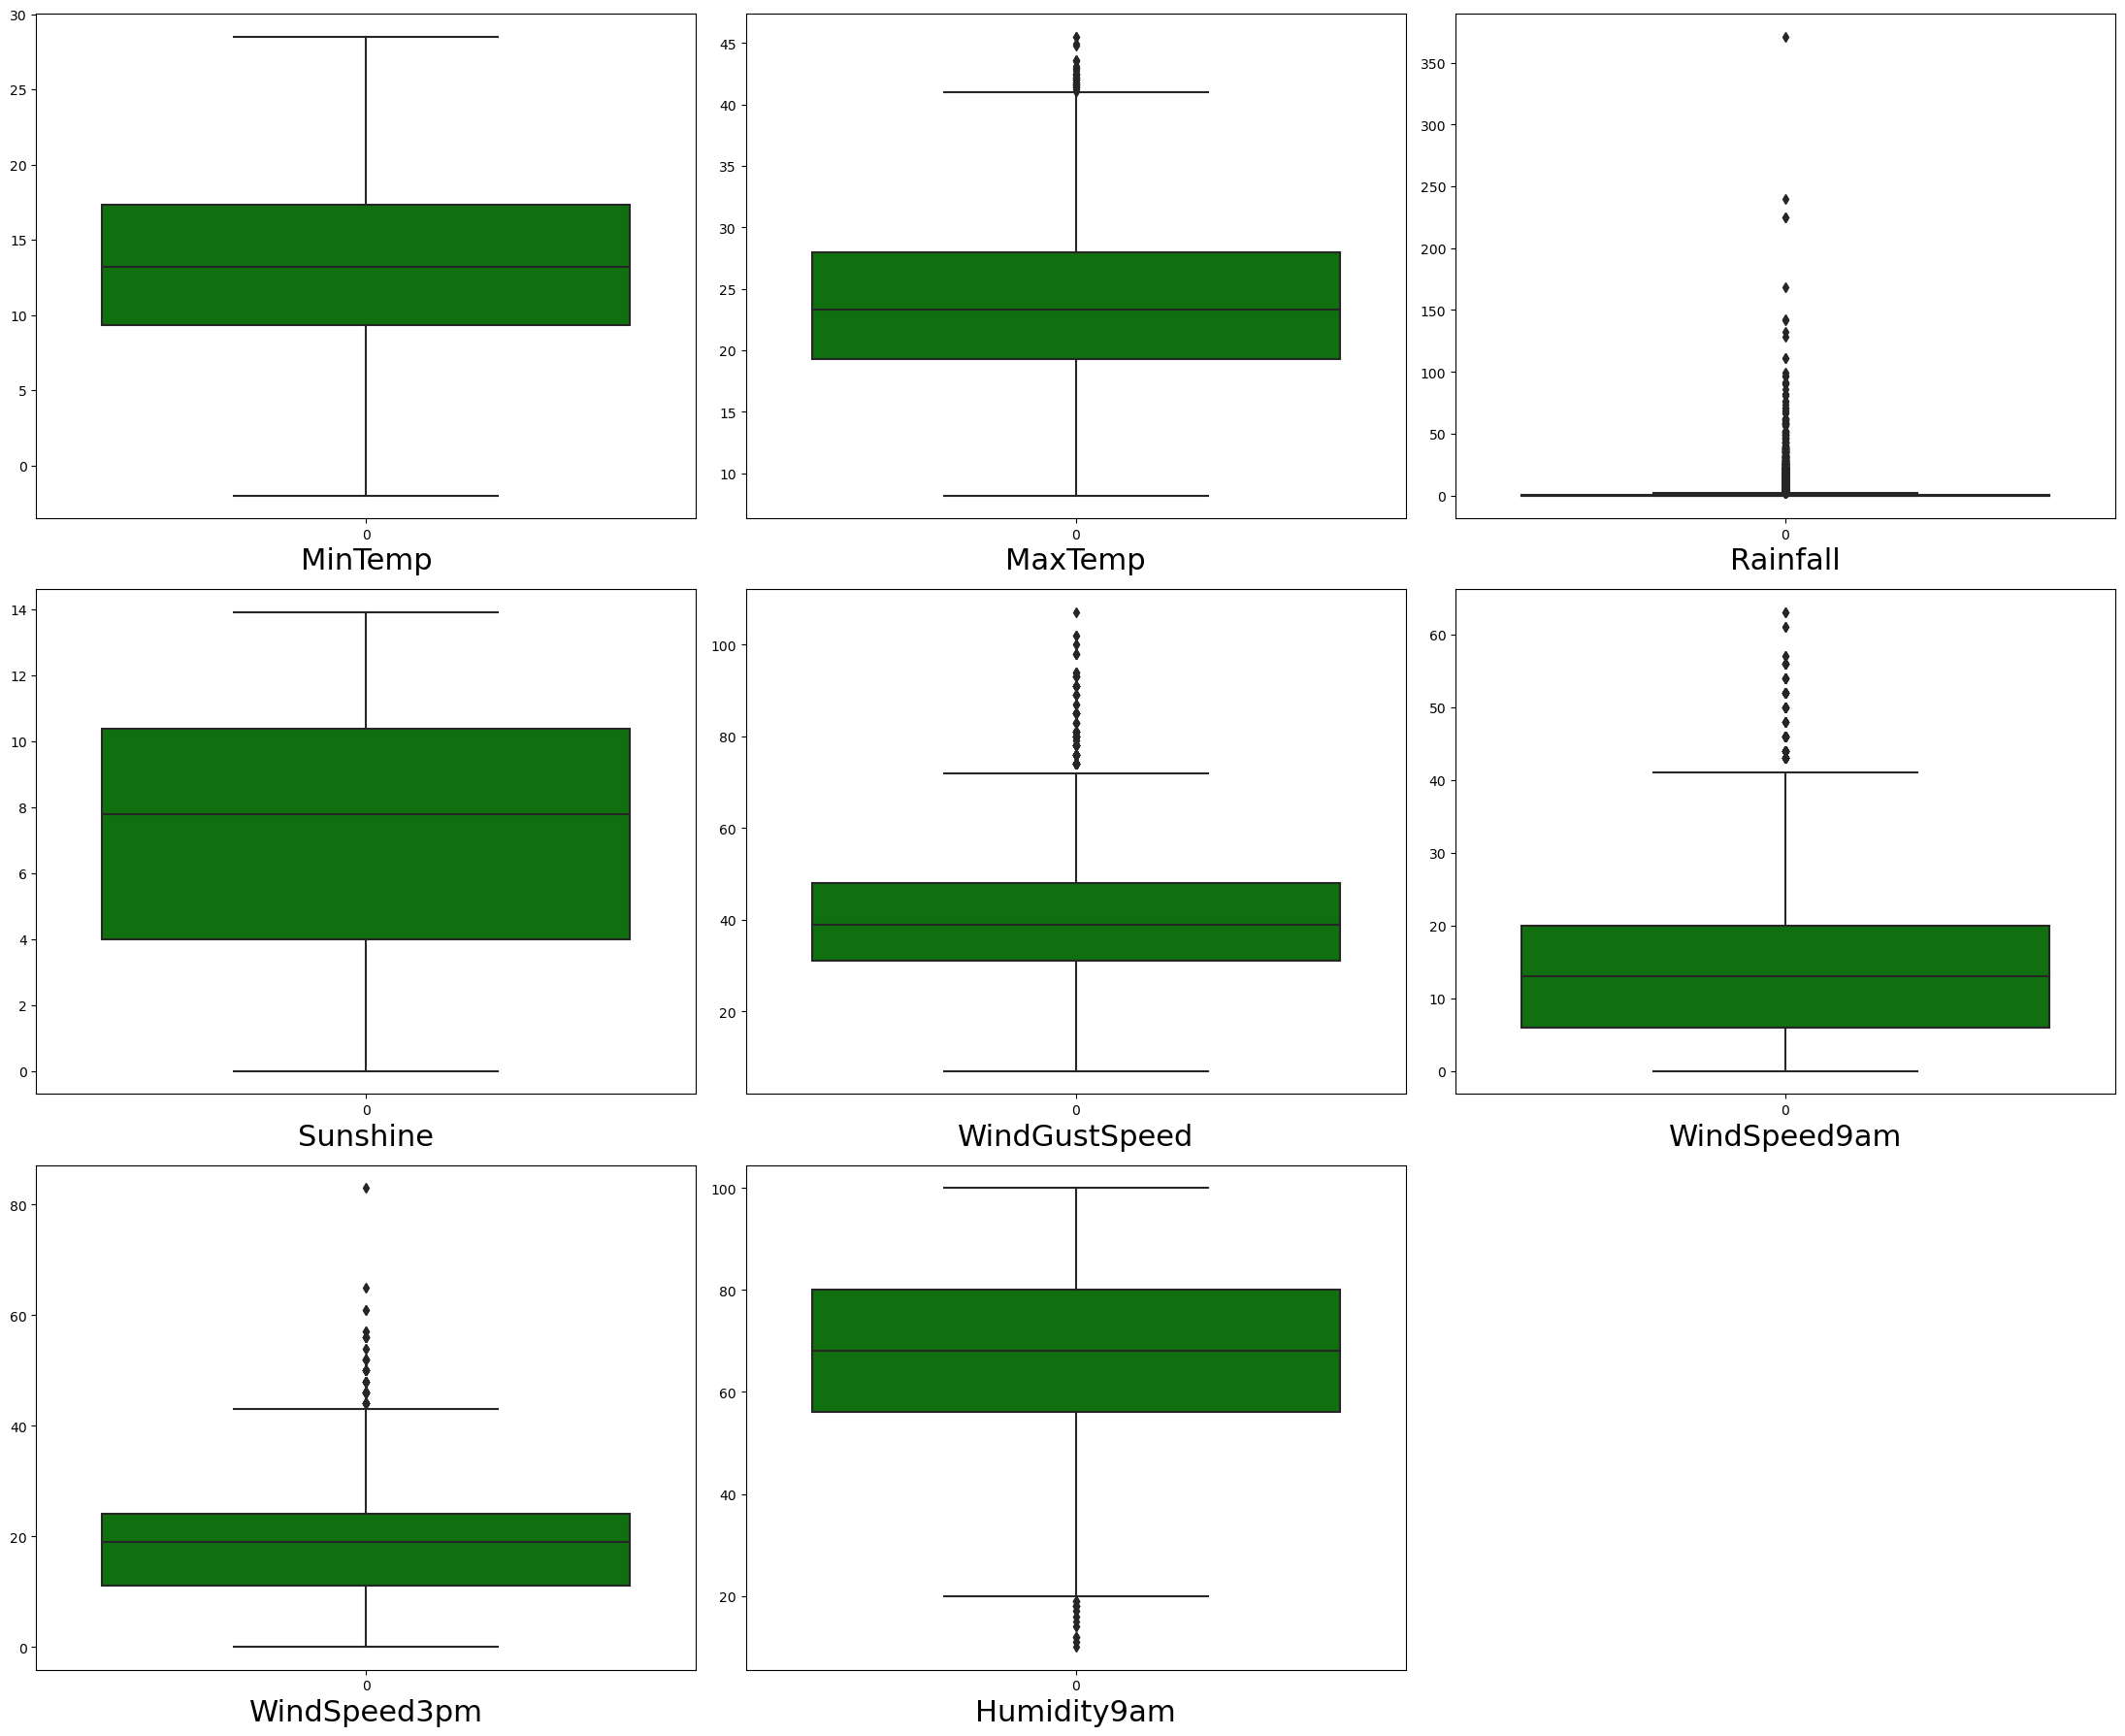

In [112]:
plt.figure(figsize=(22,18),facecolor='white')
PN=1
for n in Num_Col1:
    if PN<=8:
        axis=plt.subplot(3,3,PN)
        sns.boxplot(df[n],color='g')
        plt.xlabel(n,fontsize=22)
    PN+=1
plt.tight_layout()

In [113]:
#Here we can see that we have outliers in variables such as Windspeed3pm, humidity9am, speed, rainfall

In [114]:
df8=df.copy()

In [115]:
df8

Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  \
0            1     13.4     22.9       0.6     0.450           13   
1            1      7.4     25.1       0.0     7.684           14   
2            1     12.9     25.7       0.0    11.398           15   
3            1      9.2     28.0       0.0     9.033            4   
4            1     17.5     32.3       1.0     4.210           13   
...        ...      ...      ...       ...       ...          ...   
8420         9      2.8     23.4       0.0     6.939            0   
8421         9      3.6     25.3       0.0     9.992            6   
8422         9      5.4     26.9       0.0     9.417            3   
8423         9      7.8     27.0       0.0    10.806            9   
8424         9     14.9     23.3       0.0     0.574            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             44.00          13          14          20.0          24.0   
1             44.00           6          15           4.0          22.0   
2             46.00          13          15          19.0          26.0   
3             24.00           9           0          11.0           9.0   
4             41.00           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420          31.00           9           1          13.0          11.0   
8421          22.00           9           3          13.0           9.0   
8422          37.00           9          14           9.0           9.0   
8423          28.00          10           3          13.0           7.0   
8424          38.95           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1      8.00      7.80   
1            44.0         25.0       1010.6       1007.8      4.83      4.96   
2            38.0         30.0       1007.6       1008.7      2.31      2.00   
3            45.0         16.0       1017.6       1012.8      3.88      3.70   
4            82.0         33.0       1010.8       1006.0      7.00      8.00   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3      5.20      4.95   
8421         56.0         21.0       1023.5       1019.1      1.07      2.35   
8422         53.0         24.0       1021.0       1016.8      3.60      4.56   
8423         51.0         24.0       1019.4       1016.5      3.00      2.00   
8424         62.0         36.0       1020.2       1017.9      8.00      8.00   

      Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0        16.9     21.8          0             0    1     12  2008  
1        17.2     24.3          0             0    2     12  2008  
2        21.0     23.2          0             0    3     12  2008  
3        18.1     26.5          0             0    4     12  2008  
4        17.8     29.7          0             0    5     12  2008  
...       ...      ...        ...           ...  ...    ...   ...  
8420     10.1     22.4          0             0   21      6  2017  
8421     10.9     24.5          0             0   22      6  2017  
8422     12.5     26.1          0             0   23      6  2017  
8423     15.1     26.0          0             0   24      6  2017  
8424     15.0     20.9          0             0   25      6  2017  

[8425 rows x 24 columns]

In [116]:
from scipy.stats import zscore

In [117]:
z=np.abs(zscore(df))

In [118]:
threshold = 3

In [119]:
dfnew=df[(z<3).all(axis=1)]

In [120]:
print("Shape of original dataframe:", df.shape)
print("New Shape:", dfnew.shape)
print("Overall Data Loss:",(df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

Shape of original dataframe: (8425, 24)
New Shape: (8072, 24)
Overall Data Loss: 4.189910979228487


In [121]:
#Data loss is fine

In [122]:
dfnew2=dfnew.copy()

In [123]:
dfnew2

Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  \
0            1     13.4     22.9       0.6     0.450           13   
1            1      7.4     25.1       0.0     7.684           14   
2            1     12.9     25.7       0.0    11.398           15   
3            1      9.2     28.0       0.0     9.033            4   
4            1     17.5     32.3       1.0     4.210           13   
...        ...      ...      ...       ...       ...          ...   
8420         9      2.8     23.4       0.0     6.939            0   
8421         9      3.6     25.3       0.0     9.992            6   
8422         9      5.4     26.9       0.0     9.417            3   
8423         9      7.8     27.0       0.0    10.806            9   
8424         9     14.9     23.3       0.0     0.574            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             44.00          13          14          20.0          24.0   
1             44.00           6          15           4.0          22.0   
2             46.00          13          15          19.0          26.0   
3             24.00           9           0          11.0           9.0   
4             41.00           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420          31.00           9           1          13.0          11.0   
8421          22.00           9           3          13.0           9.0   
8422          37.00           9          14           9.0           9.0   
8423          28.00          10           3          13.0           7.0   
8424          38.95           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1      8.00      7.80   
1            44.0         25.0       1010.6       1007.8      4.83      4.96   
2            38.0         30.0       1007.6       1008.7      2.31      2.00   
3            45.0         16.0       1017.6       1012.8      3.88      3.70   
4            82.0         33.0       1010.8       1006.0      7.00      8.00   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3      5.20      4.95   
8421         56.0         21.0       1023.5       1019.1      1.07      2.35   
8422         53.0         24.0       1021.0       1016.8      3.60      4.56   
8423         51.0         24.0       1019.4       1016.5      3.00      2.00   
8424         62.0         36.0       1020.2       1017.9      8.00      8.00   

      Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0        16.9     21.8          0             0    1     12  2008  
1        17.2     24.3          0             0    2     12  2008  
2        21.0     23.2          0             0    3     12  2008  
3        18.1     26.5          0             0    4     12  2008  
4        17.8     29.7          0             0    5     12  2008  
...       ...      ...        ...           ...  ...    ...   ...  
8420     10.1     22.4          0             0   21      6  2017  
8421     10.9     24.5          0             0   22      6  2017  
8422     12.5     26.1          0             0   23      6  2017  
8423     15.1     26.0          0             0   24      6  2017  
8424     15.0     20.9          0             0   25      6  2017  

[8072 rows x 24 columns]

In [124]:
dfnew3=dfnew2.copy()

In [125]:
dfnew.skew()

Location        -0.051998
MinTemp         -0.089630
MaxTemp          0.311315
Rainfall         3.511997
Sunshine        -0.411592
WindGustDir      0.110794
WindGustSpeed    0.498474
WindDir9am       0.161421
WindDir3pm      -0.123540
WindSpeed9am     0.714972
WindSpeed3pm     0.295224
Humidity9am     -0.226860
Humidity3pm      0.128456
Pressure9am      0.021576
Pressure3pm      0.058618
Cloud9am        -0.331278
Cloud3pm        -0.274182
Temp9am         -0.047044
Temp3pm          0.331694
RainToday        1.305656
RainTomorrow     1.301442
day              0.001389
month            0.050275
year             0.412114
dtype: float64

In [125]:
from sklearn.preprocessing import PowerTransformer

In [126]:
pt = PowerTransformer(method='yeo-johnson')
skewed_col = ['Rainfall','WindSpeed9am']
dfnew[skewed_col] = pt.fit_transform(dfnew[skewed_col])
new = dfnew.skew()
print(new)

Location        -0.051998
MinTemp         -0.089630
MaxTemp          0.311315
Rainfall         1.043693
Sunshine        -0.470069
WindGustDir      0.110794
WindGustSpeed    0.507239
WindDir9am       0.161421
WindDir3pm      -0.123540
WindSpeed9am    -0.109886
WindSpeed3pm     0.295224
Humidity9am     -0.226860
Humidity3pm      0.128456
Pressure9am      0.000223
Pressure3pm      0.038429
Cloud9am        -0.286822
Cloud3pm        -0.225801
Temp9am         -0.047044
Temp3pm          0.331694
RainToday        1.305656
RainTomorrow     1.301442
day              0.001389
month            0.050275
year             0.412114
dtype: float64


In [127]:
#There is still some skewness but we have greatly reduced it 

In [128]:
dfnew.corr()

Location   MinTemp   MaxTemp  Rainfall  Sunshine  WindGustDir  \
Location       1.000000  0.120699  0.070525  0.010608 -0.000404    -0.039285   
MinTemp        0.120699  1.000000  0.718577  0.061047  0.068008    -0.152881   
MaxTemp        0.070525  0.718577  1.000000 -0.247521  0.415810    -0.234212   
Rainfall       0.010608  0.061047 -0.247521  1.000000 -0.312909     0.133335   
Sunshine      -0.000404  0.068008  0.415810 -0.312909  1.000000    -0.113965   
WindGustDir   -0.039285 -0.152881 -0.234212  0.133335 -0.113965     1.000000   
WindGustSpeed  0.245447  0.232994  0.141390  0.072809  0.044049     0.012344   
WindDir9am    -0.038439 -0.042463 -0.213329  0.156848 -0.079842     0.405274   
WindDir3pm    -0.037007 -0.154283 -0.191294  0.121617 -0.070753     0.509576   
WindSpeed9am   0.242484  0.161403  0.020481  0.025312  0.001335     0.080469   
WindSpeed3pm   0.235332  0.186001  0.094457  0.019472  0.069384     0.108684   
Humidity9am    0.003490 -0.127444 -0.383059  0.405600 -0.428374     0.028971   
Humidity3pm    0.058718  0.090106 -0.410074  0.383962 -0.517822     0.050213   
Pressure9am   -0.022406 -0.446277 -0.340484 -0.109810 -0.036280    -0.105360   
Pressure3pm   -0.014067 -0.437313 -0.419172 -0.033348 -0.104069    -0.014272   
Cloud9am       0.020795  0.043663 -0.290660  0.286043 -0.774600     0.123209   
Cloud3pm       0.021088  0.019428 -0.279173  0.263152 -0.783571     0.105450   
Temp9am        0.124599  0.888703  0.865040 -0.111111  0.273568    -0.182429   
Temp3pm        0.067374  0.687526  0.975185 -0.257325  0.436726    -0.245893   
RainToday      0.003069  0.059210 -0.220614  0.932540 -0.276478     0.120896   
RainTomorrow   0.008866  0.090934 -0.149732  0.315815 -0.337913     0.046862   
day           -0.002521  0.010631  0.016173 -0.017479  0.007706     0.016371   
month         -0.084976 -0.245527 -0.160781 -0.005331  0.028727     0.036913   
year           0.486632  0.045965  0.127126  0.003075  0.009769    -0.094061   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Location            0.245447   -0.038439   -0.037007      0.242484   
MinTemp             0.232994   -0.042463   -0.154283      0.161403   
MaxTemp             0.141390   -0.213329   -0.191294      0.020481   
Rainfall            0.072809    0.156848    0.121617      0.025312   
Sunshine            0.044049   -0.079842   -0.070753      0.001335   
WindGustDir         0.012344    0.405274    0.509576      0.080469   
WindGustSpeed       1.000000   -0.065647    0.077887      0.538646   
WindDir9am         -0.065647    1.000000    0.244039      0.141377   
WindDir3pm          0.077887    0.244039    1.000000      0.041074   
WindSpeed9am        0.538646    0.141377    0.041074      1.000000   
WindSpeed3pm        0.623582    0.059944    0.078825      0.552096   
Humidity9am        -0.264196    0.009341   -0.009556     -0.364500   
Humidity3pm        -0.085844    0.118593   -0.009423     -0.096701   
Pressure9am        -0.414021   -0.011492   -0.137929     -0.155658   
Pressure3pm        -0.369302    0.075581   -0.046370     -0.106883   
Cloud9am           -0.027088    0.090392    0.088884     -0.015323   
Cloud3pm            0.081273    0.072642    0.071192      0.057906   
Temp9am             0.202267   -0.098329   -0.172628      0.131120   
Temp3pm             0.104863   -0.220830   -0.203450      0.005024   
RainToday           0.074711    0.150233    0.101373      0.045213   
RainTomorrow        0.182708    0.029330    0.006737      0.056301   
day                -0.003701   -0.011439   -0.002363     -0.009885   
month               0.042507    0.018289    0.028330      0.032283   
year               -0.033689   -0.030173   -0.014904     -0.096836   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
Location           0.235332     0.003490     0.058718    -0.022406   
MinTemp            0.186001    -0.127444     0.090106    -0.446277   
MaxTemp            0.094457    -0.383059    -0.410074

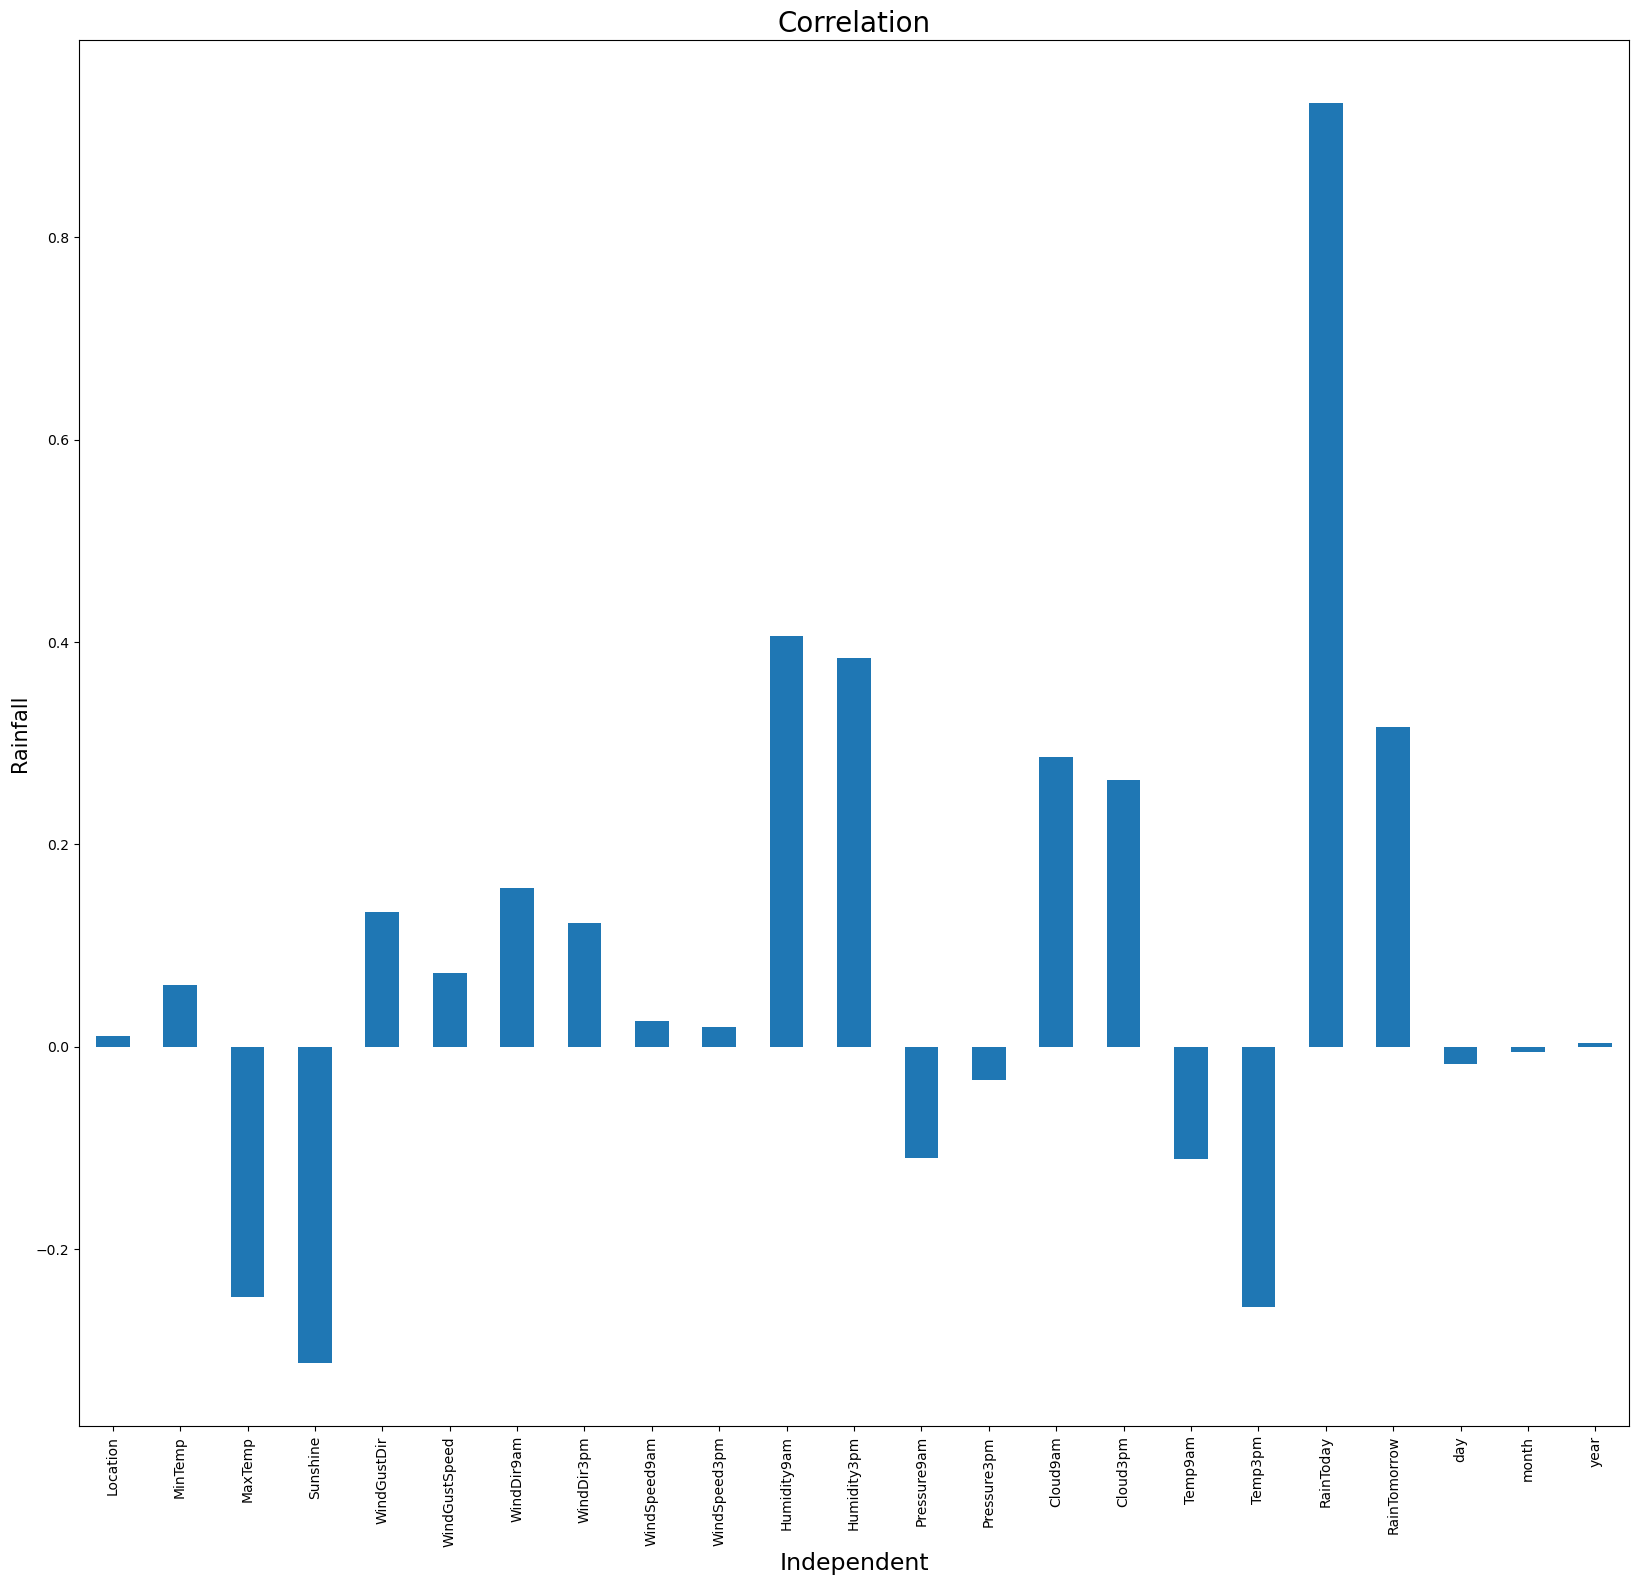

In [129]:
plt.figure(figsize = (20,18))
dfnew.corr()['Rainfall'].drop(['Rainfall']).plot(kind='bar')
plt.xlabel('Independent',fontsize=17)
plt.ylabel('Rainfall',fontsize=15)
plt.title('Correlation',fontsize = 20)
plt.show()

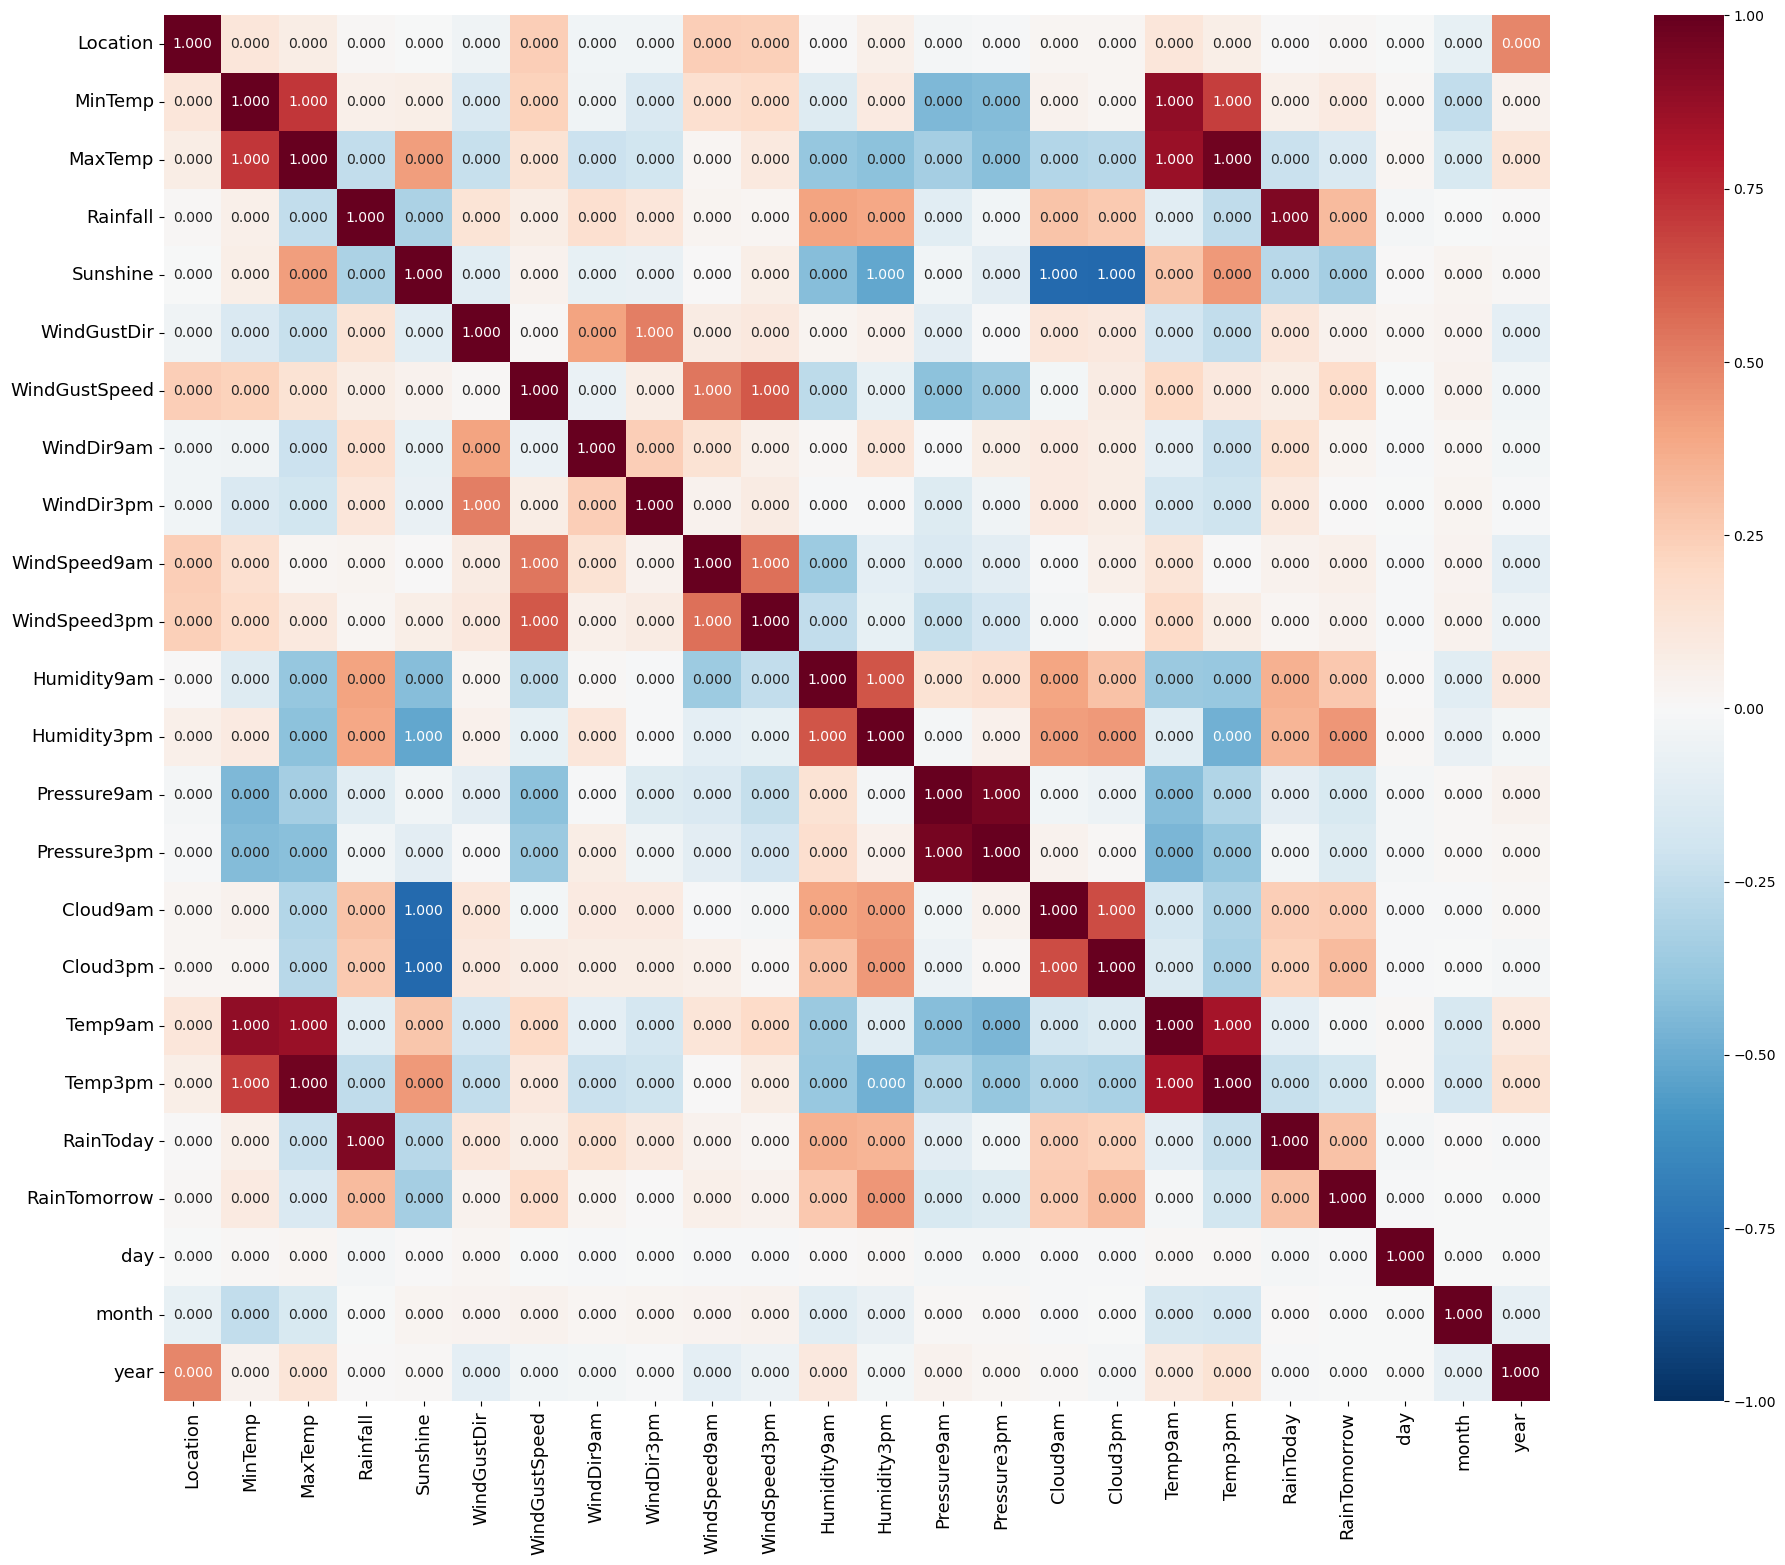

In [130]:
plt.figure(figsize=(27, 18))
corr_matrix = dfnew.corr()
threshold = 0.5
a_mask = np.abs(corr_matrix) >= threshold
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=a_mask, square=True, fmt='.3f',annot_kws={'size': 10}, cmap='RdBu_r')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

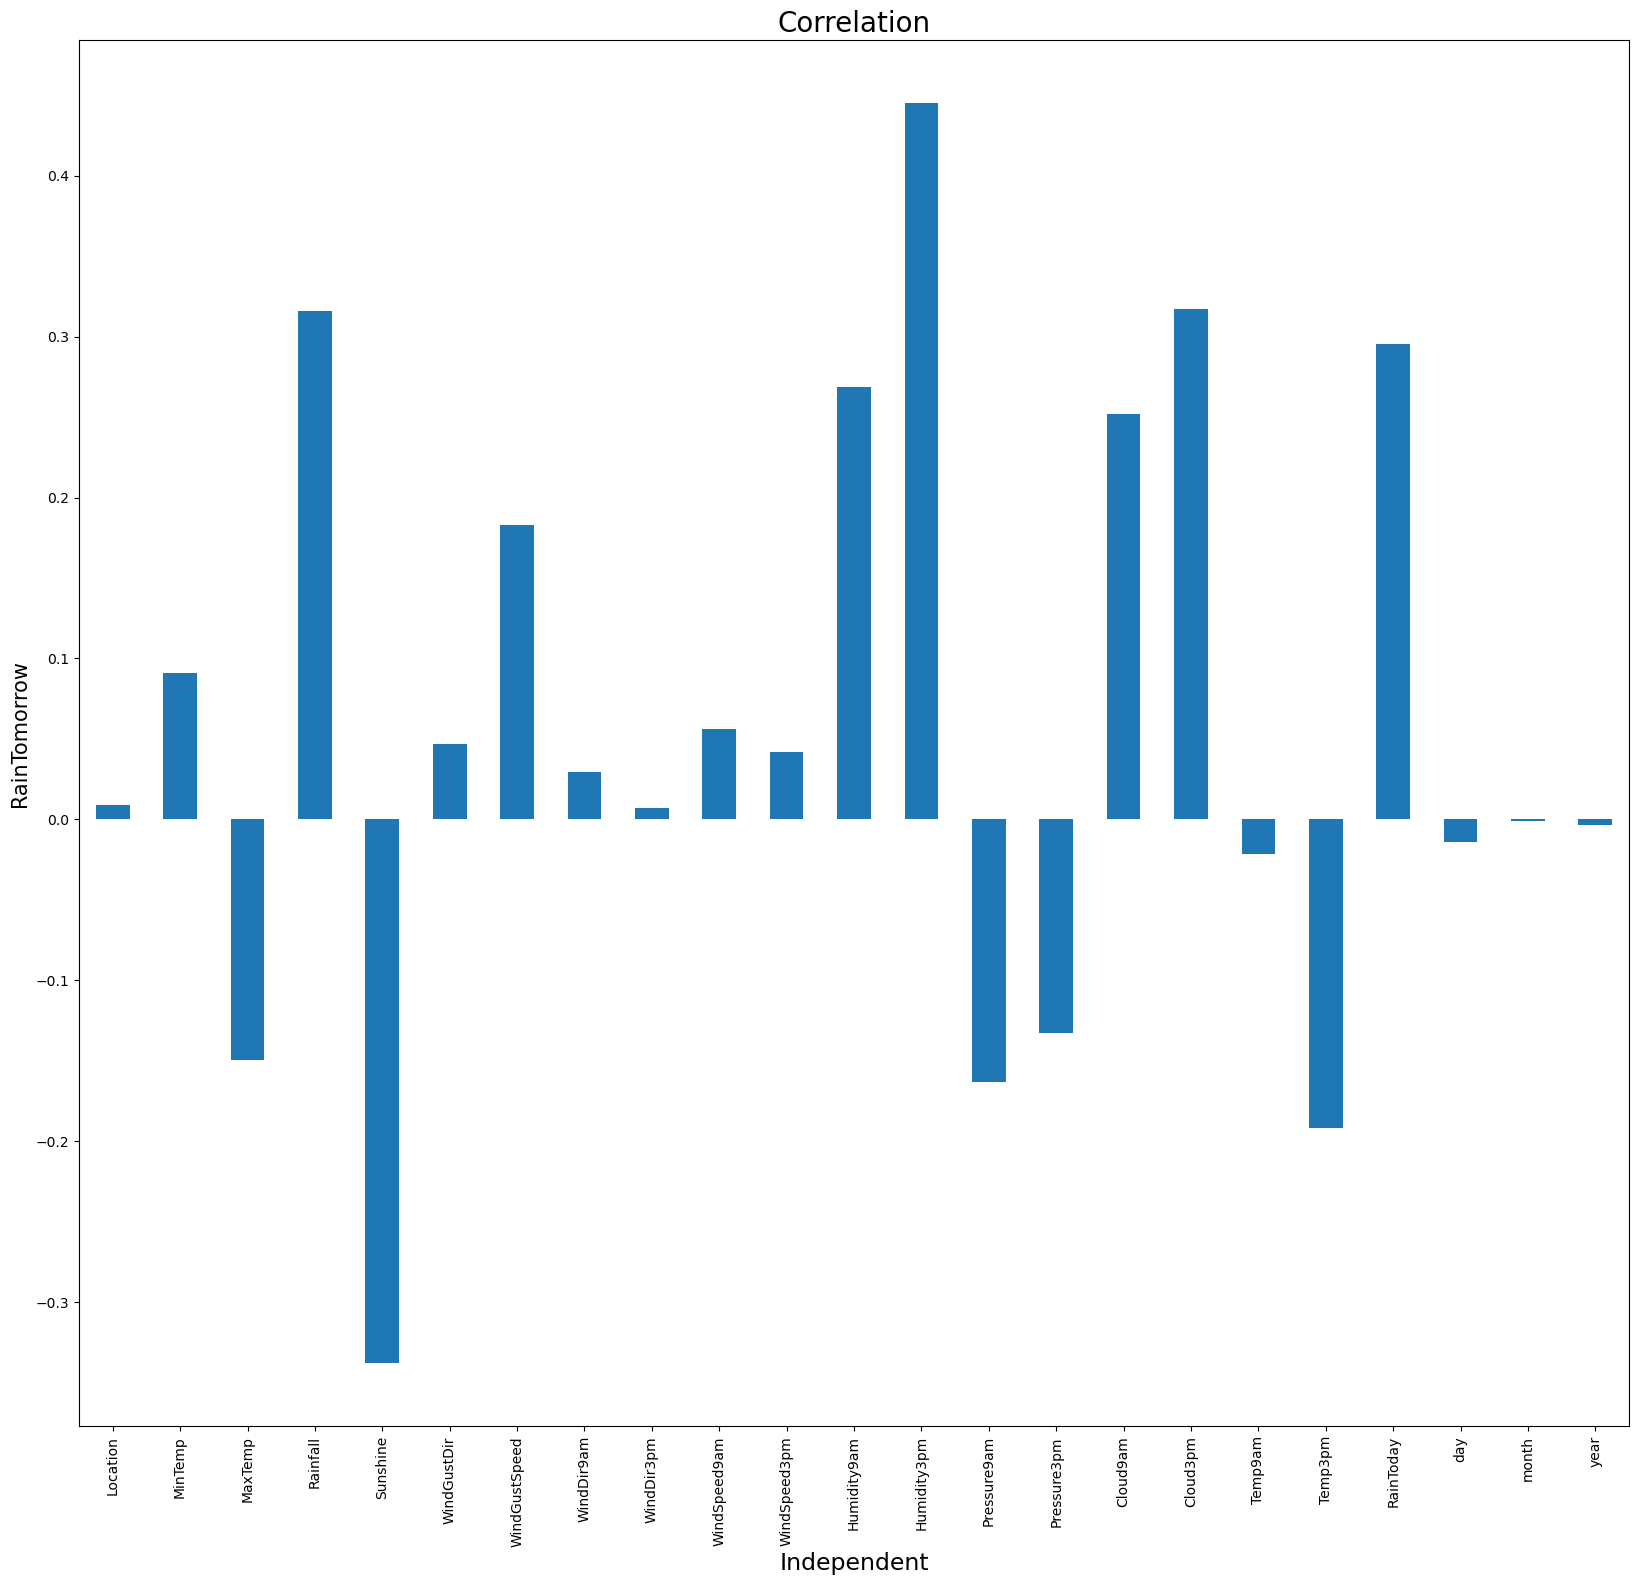

In [131]:
plt.figure(figsize = (20,18))
dfnew.corr()['RainTomorrow'].drop(['RainTomorrow']).plot(kind='bar')
plt.xlabel('Independent',fontsize=17)
plt.ylabel('RainTomorrow',fontsize=15)
plt.title('Correlation',fontsize = 20)
plt.show()

In [132]:
df10=dfnew.copy()

In [133]:
X = dfnew.drop(['RainTomorrow'],axis=1)
Y = dfnew['RainTomorrow']

In [134]:
from sklearn.preprocessing import StandardScaler

In [138]:
Scaled= StandardScaler()
X_scale = Scaled.fit_transform(X)

In [139]:
#We can drop variables which are not necessary especially if they are poorly correlated with RainTomorrow
drop = ['Location', 'WindDir3pm', 'Temp9am', 'day', 'month', 'year', 'WindDir9am']
dfnew = dfnew.drop(columns=drop, axis=1)

In [140]:
from sklearn.decomposition import PCA

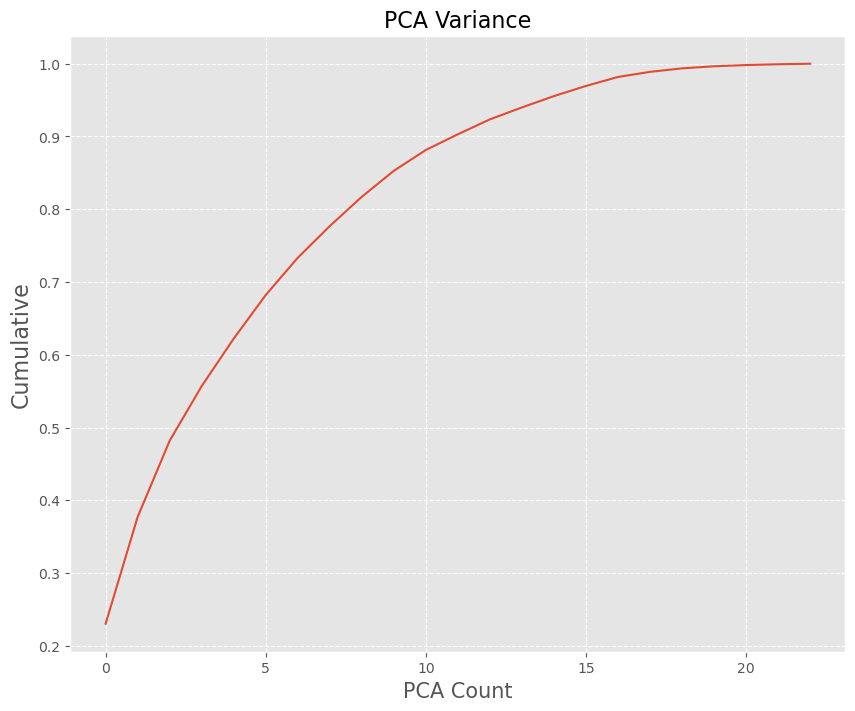

In [141]:
Pca = PCA()
PCA1 = Pca.fit_transform(X_scale)
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')
plt.plot(np.cumsum(Pca.explained_variance_ratio_))
plt.xlabel('PCA Count', fontsize=15)
plt.ylabel('Cumulative', fontsize=16)
plt.title('PCA Variance', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.8)
plt.show()

In [142]:
#Here we can see that 10 component explain 95% of variance

In [143]:
New_PCA1 = PCA(n_components=10)
X_new = New_PCA1.fit_transform(X_scale)

In [144]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [145]:
#Thats probably the least we could go

In [146]:
Final=pd.DataFrame(X_new,columns=np.arange(10))

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [148]:
X_train, X_test, Y_train, Y_test = train_test_split(Final, Y, random_state=40, test_size=.25)

In [149]:
X_train.shape

(6054, 10)

In [150]:
Y_train.shape

(6054,)

In [151]:
X_test.shape

(2018, 10)

In [152]:
Y_test.shape

(2018,)

In [153]:
Accuracy = 0
random_state = 0
for r in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(Final, Y, test_size = 0.40, random_state=r)
    modelDT = DecisionTreeClassifier()
    modelDT.fit(X_train, Y_train)
    predictor=modelDT.predict(X_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at randomstate:", random_state)

True Accuracy Score:  0.8253329204087952 at randomstate: 99


In [154]:
Accuracy = 0
random_state = 0
for r in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=r)
    BC = BaggingClassifier()
    BC.fit(X_train, Y_train)
    predictor = BC.predict(X_test)
    initialscore = accuracy_score(Y_test, predictor)
    if initialscore > Accuracy:
        Accuracy = initialscore
        random_state = r
print("True Accuracy Score: ", Accuracy, "at random_state:", random_state)

True Accuracy Score:  0.8795292660266336 at random_state: 9


In [156]:
models = {
    'DT': DecisionTreeClassifier(min_samples_split=2, max_depth=None, min_samples_leaf=2, random_state=r),
    'BC': BaggingClassifier(n_estimators=10, max_features=1.0, max_samples=1.0,  random_state=42),
    'RF': RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=r),
    'AB': AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=r),
    'ET': ExtraTreesClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1, random_state=r),
    'GB': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, min_samples_leaf=1,max_depth=2, min_samples_split=2,  random_state=r),
    'KNN': KNeighborsClassifier(n_neighbors=5, algorithm='auto', weights='uniform'),
    'SVC': SVC(kernel='rbf', gamma='scale', C=1.0,  random_state=r),
    'LR': LogisticRegression(C=1.0, penalty='l2', max_iter=100, random_state=r)
}
def test_models(models, X_train, X_test, Y_train, Y_test):
    for title, m in models.items():
        m.fit(X_train, Y_train)
        predresults = m.predict(X_test)
        acc = accuracy_score(Y_test, predresults)
        c_matrix = confusion_matrix(Y_test, predresults)
        classification_r = classification_report(Y_test, predresults)
        print(f"output for {title}:")
        print(f"Overall Accuracy: {acc}")
        print("Confusion Matrix:")
        print(c_matrix)
        print("Classification Report:")
        print(classification_r)
        print("\n")

test_models(models, X_train, X_test, Y_train, Y_test)

output for DT:
Overall Accuracy: 0.8244038401982038
Confusion Matrix:
[[2273  229]
 [ 338  389]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2502
           1       0.63      0.54      0.58       727

    accuracy                           0.82      3229
   macro avg       0.75      0.72      0.73      3229
weighted avg       0.82      0.82      0.82      3229



output for BC:
Overall Accuracy: 0.8782904924125116
Confusion Matrix:
[[2440   62]
 [ 331  396]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2502
           1       0.86      0.54      0.67       727

    accuracy                           0.88      3229
   macro avg       0.87      0.76      0.80      3229
weighted avg       0.88      0.88      0.87      3229



output for RF:
Overall Accuracy: 0.8807680396407557
Confusion Matrix:
[[2437   65]
 [ 320  407]]
Class

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [158]:
list_of_classifiers = {'DT': DecisionTreeClassifier(),
    'BC': BaggingClassifier(),
    'RF': RandomForestClassifier(),
    'AB': AdaBoostClassifier(),
    'ET': ExtraTreesClassifier(),
    'GB': GradientBoostingClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'LR': LogisticRegression()
}

Output = {}

for name, c in list_of_classifiers.items():
    cvs = cross_val_score(c, X, Y, cv=5)
    c.fit(X_train, Y_train)
    predict_test = c.predict(X_test)
    accuracy_testing = accuracy_score(Y_test, predict_test)
    mcv_testcv_difference = accuracy_testing - cvs.mean()
    Output[name] = {
        'Cross Validation Scores': cvs,
        'Mean of Cross Validation Scores': cvs.mean(),
        'Accuracy of the test': accuracy_testing,
        'Overall difference': mcv_testcv_difference}

for name, m in Output.items():
    print(f"{name}:")
    print(f"Cross-Validation Scores: {m['Cross Validation Scores']}")
    print(f"Mean Cross-Validation: {m['Mean of Cross Validation Scores']}")
    print(f"Accuracy: {m['Accuracy of the test']}")

DT:
Cross-Validation Scores: [0.75232198 0.81424149 0.8401487  0.77447336 0.74163569]
Mean Cross-Validation: 0.7845642424451682
Accuracy: 0.8299783214617529
BC:
Cross-Validation Scores: [0.82167183 0.85325077 0.85439901 0.76084263 0.83705081]
Mean Cross-Validation: 0.8254430083518439
Accuracy: 0.8689996903065965
RF:
Cross-Validation Scores: [0.85325077 0.85572755 0.87360595 0.84386617 0.84510533]
Mean Cross-Validation: 0.8543111551018374
Accuracy: 0.8807680396407557
AB:
Cross-Validation Scores: [0.82786378 0.79814241 0.77013631 0.79182156 0.83643123]
Mean Cross-Validation: 0.8048790574731164
Accuracy: 0.834933415918241
ET:
Cross-Validation Scores: [0.84272446 0.85325077 0.87856258 0.84758364 0.83333333]
Mean Cross-Validation: 0.8510909572202976
Accuracy: 0.8779807990089811
GB:
Cross-Validation Scores: [0.84272446 0.80433437 0.80111524 0.73791822 0.85068154]
Mean Cross-Validation: 0.807354763466725
Accuracy: 0.8473211520594611
KNN:
Cross-Validation Scores: [0.81981424 0.80371517 0.78562

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
Param_RF = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 4, 5, 10], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': ['auto', 'sqrt', 'log2'],  'bootstrap': [True, False],  'oob_score': [True, False] }

In [161]:
GCV = GridSearchCV(RandomForestClassifier(),Param_RF)

In [162]:
GCV.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 5, 10],
                         'n_estimators': [50, 100, 200],
                         'oob_score': [True, False]})

In [163]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200,
 'oob_score': True}

In [ ]:
True_model= RandomForestClassifier(bootstrap= False, max_features = 'sqrt', max_depth= None , n_estimators = 200, min_samples_split = 2, min_samples_leaf = 2, oob_score= False)
True_model.fit(X_train,Y_train)
pred=True_model.predict(X_test)
acc= accuracy_score(Y_test,pred)
print(acc*100)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [ ]:
import joblib
joblib.dump(True_model,'RainTomorrow.pkl')

In [ ]:
#Regression Model - Rainfall

In [126]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso as Lasso
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import StackingRegressor

In [127]:
dfnew3

Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  \
0            1     13.4     22.9       0.6     0.450           13   
1            1      7.4     25.1       0.0     7.684           14   
2            1     12.9     25.7       0.0    11.398           15   
3            1      9.2     28.0       0.0     9.033            4   
4            1     17.5     32.3       1.0     4.210           13   
...        ...      ...      ...       ...       ...          ...   
8420         9      2.8     23.4       0.0     6.939            0   
8421         9      3.6     25.3       0.0     9.992            6   
8422         9      5.4     26.9       0.0     9.417            3   
8423         9      7.8     27.0       0.0    10.806            9   
8424         9     14.9     23.3       0.0     0.574            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             44.00          13          14          20.0          24.0   
1             44.00           6          15           4.0          22.0   
2             46.00          13          15          19.0          26.0   
3             24.00           9           0          11.0           9.0   
4             41.00           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420          31.00           9           1          13.0          11.0   
8421          22.00           9           3          13.0           9.0   
8422          37.00           9          14           9.0           9.0   
8423          28.00          10           3          13.0           7.0   
8424          38.95           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1      8.00      7.80   
1            44.0         25.0       1010.6       1007.8      4.83      4.96   
2            38.0         30.0       1007.6       1008.7      2.31      2.00   
3            45.0         16.0       1017.6       1012.8      3.88      3.70   
4            82.0         33.0       1010.8       1006.0      7.00      8.00   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3      5.20      4.95   
8421         56.0         21.0       1023.5       1019.1      1.07      2.35   
8422         53.0         24.0       1021.0       1016.8      3.60      4.56   
8423         51.0         24.0       1019.4       1016.5      3.00      2.00   
8424         62.0         36.0       1020.2       1017.9      8.00      8.00   

      Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0        16.9     21.8          0             0    1     12  2008  
1        17.2     24.3          0             0    2     12  2008  
2        21.0     23.2          0             0    3     12  2008  
3        18.1     26.5          0             0    4     12  2008  
4        17.8     29.7          0             0    5     12  2008  
...       ...      ...        ...           ...  ...    ...   ...  
8420     10.1     22.4          0             0   21      6  2017  
8421     10.9     24.5          0             0   22      6  2017  
8422     12.5     26.1          0             0   23      6  2017  
8423     15.1     26.0          0             0   24      6  2017  
8424     15.0     20.9          0             0   25      6  2017  

[8072 rows x 24 columns]

In [128]:
dfnew3.skew()

Location        -0.051998
MinTemp         -0.089630
MaxTemp          0.311315
Rainfall         3.511997
Sunshine        -0.411592
WindGustDir      0.110794
WindGustSpeed    0.498474
WindDir9am       0.161421
WindDir3pm      -0.123540
WindSpeed9am     0.714972
WindSpeed3pm     0.295224
Humidity9am     -0.226860
Humidity3pm      0.128456
Pressure9am      0.021576
Pressure3pm      0.058618
Cloud9am        -0.331278
Cloud3pm        -0.274182
Temp9am         -0.047044
Temp3pm          0.331694
RainToday        1.305656
RainTomorrow     1.301442
day              0.001389
month            0.050275
year             0.412114
dtype: float64

In [129]:
from sklearn.preprocessing import PowerTransformer

In [130]:
pt = PowerTransformer(method='yeo-johnson')
skewed_col = ['Rainfall']
dfnew3[skewed_col] = pt.fit_transform(dfnew3[skewed_col])
new = dfnew3.skew()
print(new)

Location        -0.051998
MinTemp         -0.089630
MaxTemp          0.311315
Rainfall         1.043693
Sunshine        -0.411592
WindGustDir      0.110794
WindGustSpeed    0.498474
WindDir9am       0.161421
WindDir3pm      -0.123540
WindSpeed9am     0.714972
WindSpeed3pm     0.295224
Humidity9am     -0.226860
Humidity3pm      0.128456
Pressure9am      0.021576
Pressure3pm      0.058618
Cloud9am        -0.331278
Cloud3pm        -0.274182
Temp9am         -0.047044
Temp3pm          0.331694
RainToday        1.305656
RainTomorrow     1.301442
day              0.001389
month            0.050275
year             0.412114
dtype: float64


In [131]:
pt = PowerTransformer(method='yeo-johnson')
skewed_col = ['Rainfall']
dfnew3[skewed_col] = pt.fit_transform(dfnew3[skewed_col])
new = dfnew3.skew()
print(new)

Location        -0.051998
MinTemp         -0.089630
MaxTemp          0.311315
Rainfall         0.775268
Sunshine        -0.411592
WindGustDir      0.110794
WindGustSpeed    0.498474
WindDir9am       0.161421
WindDir3pm      -0.123540
WindSpeed9am     0.714972
WindSpeed3pm     0.295224
Humidity9am     -0.226860
Humidity3pm      0.128456
Pressure9am      0.021576
Pressure3pm      0.058618
Cloud9am        -0.331278
Cloud3pm        -0.274182
Temp9am         -0.047044
Temp3pm          0.331694
RainToday        1.305656
RainTomorrow     1.301442
day              0.001389
month            0.050275
year             0.412114
dtype: float64


In [132]:
dfnew3

Location  MinTemp  MaxTemp  Rainfall  Sunshine  WindGustDir  \
0            1     13.4     22.9  1.300473     0.450           13   
1            1      7.4     25.1 -0.700140     7.684           14   
2            1     12.9     25.7 -0.700140    11.398           15   
3            1      9.2     28.0 -0.700140     9.033            4   
4            1     17.5     32.3  1.426295     4.210           13   
...        ...      ...      ...       ...       ...          ...   
8420         9      2.8     23.4 -0.700140     6.939            0   
8421         9      3.6     25.3 -0.700140     9.992            6   
8422         9      5.4     26.9 -0.700140     9.417            3   
8423         9      7.8     27.0 -0.700140    10.806            9   
8424         9     14.9     23.3 -0.700140     0.574            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0             44.00          13          14          20.0          24.0   
1             44.00           6          15           4.0          22.0   
2             46.00          13          15          19.0          26.0   
3             24.00           9           0          11.0           9.0   
4             41.00           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420          31.00           9           1          13.0          11.0   
8421          22.00           9           3          13.0           9.0   
8422          37.00           9          14           9.0           9.0   
8423          28.00          10           3          13.0           7.0   
8424          38.95           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0            71.0         22.0       1007.7       1007.1      8.00      7.80   
1            44.0         25.0       1010.6       1007.8      4.83      4.96   
2            38.0         30.0       1007.6       1008.7      2.31      2.00   
3            45.0         16.0       1017.6       1012.8      3.88      3.70   
4            82.0         33.0       1010.8       1006.0      7.00      8.00   
...           ...          ...          ...          ...       ...       ...   
8420         51.0         24.0       1024.6       1020.3      5.20      4.95   
8421         56.0         21.0       1023.5       1019.1      1.07      2.35   
8422         53.0         24.0       1021.0       1016.8      3.60      4.56   
8423         51.0         24.0       1019.4       1016.5      3.00      2.00   
8424         62.0         36.0       1020.2       1017.9      8.00      8.00   

      Temp9am  Temp3pm  RainToday  RainTomorrow  day  month  year  
0        16.9     21.8          0             0    1     12  2008  
1        17.2     24.3          0             0    2     12  2008  
2        21.0     23.2          0             0    3     12  2008  
3        18.1     26.5          0             0    4     12  2008  
4        17.8     29.7          0             0    5     12  2008  
...       ...      ...        ...           ...  ...    ...   ...  
8420     10.1     22.4          0             0   21      6  2017  
8421     10.9     24.5          0             0   22      6  2017  
8422     12.5     26.1          0             0   23      6  2017  
8423     15.1     26.0          0             0   24      6  2017  
8424     15.0     20.9          0             0   25      6  2017  

[8072 rows x 24 columns]

In [133]:
dfnew3.drop("Location",axis=1,inplace=True)
dfnew3.drop("MinTemp",axis=1,inplace=True)
dfnew3.drop("WindSpeed9am",axis=1,inplace=True)
dfnew3.drop("Temp9am",axis=1,inplace=True)
dfnew3.drop("day",axis=1,inplace=True)
dfnew3.drop("month",axis=1,inplace=True)
dfnew3.drop("year",axis=1,inplace=True)
dfnew3.drop("Pressure3pm",axis=1,inplace=True)
dfnew3.drop("WindGustSpeed",axis=1,inplace=True)

In [134]:
dfnew3

MaxTemp  Rainfall  Sunshine  WindGustDir  WindDir9am  WindDir3pm  \
0        22.9  1.300473     0.450           13          13          14   
1        25.1 -0.700140     7.684           14           6          15   
2        25.7 -0.700140    11.398           15          13          15   
3        28.0 -0.700140     9.033            4           9           0   
4        32.3  1.426295     4.210           13           1           7   
...       ...       ...       ...          ...         ...         ...   
8420     23.4 -0.700140     6.939            0           9           1   
8421     25.3 -0.700140     9.992            6           9           3   
8422     26.9 -0.700140     9.417            3           9          14   
8423     27.0 -0.700140    10.806            9          10           3   
8424     23.3 -0.700140     0.574            3           2           2   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Cloud9am  Cloud3pm  \
0             24.0         71.0         22.0       1007.7      8.00      7.80   
1             22.0         44.0         25.0       1010.6      4.83      4.96   
2             26.0         38.0         30.0       1007.6      2.31      2.00   
3              9.0         45.0         16.0       1017.6      3.88      3.70   
4             20.0         82.0         33.0       1010.8      7.00      8.00   
...            ...          ...          ...          ...       ...       ...   
8420          11.0         51.0         24.0       1024.6      5.20      4.95   
8421           9.0         56.0         21.0       1023.5      1.07      2.35   
8422           9.0         53.0         24.0       1021.0      3.60      4.56   
8423           7.0         51.0         24.0       1019.4      3.00      2.00   
8424          17.0         62.0         36.0       1020.2      8.00      8.00   

      Temp3pm  RainToday  RainTomorrow  
0        21.8          0             0  
1        24.3          0             0  
2        23.2          0             0  
3        26.5          0             0  
4        29.7          0             0  
...       ...        ...           ...  
8420     22.4          0             0  
8421     24.5          0             0  
8422     26.1          0             0  
8423     26.0          0             0  
8424     20.9          0             0  

[8072 rows x 15 columns]

In [135]:
independent = dfnew3.drop(['Rainfall'], axis=1)
dependent = dfnew3['Rainfall']

In [136]:
from sklearn.preprocessing import StandardScaler

In [137]:
Scaled= StandardScaler()
independent_scale = Scaled.fit_transform(independent)

In [138]:
independent_train,independent_test,dependent_train,dependent_test = train_test_split(independent_scale, dependent, test_size = 0.30, random_state=40)

In [139]:
independent_train.shape

(5650, 14)

In [140]:
dependent_train.shape

(5650,)

In [141]:
independent_test.shape

(2422, 14)

In [142]:
dependent_test.shape

(2422,)

In [143]:
Highest_Accuracy = 0
True_random_state = 0
for r in range(1,300):
    independent_train,independent_test,dependent_train,dependent_test = train_test_split(independent, dependent, test_size = 0.20, random_state=r)
    LinearR = LinearRegression()
    LinearR.fit(independent_train, dependent_train)
    predictor=LinearR.predict(independent_test)
    initialscore = r2_score(dependent_test, predictor)
    if initialscore > Highest_Accuracy:
        Highest_Accuracy = initialscore
        True_random_state = r

print(f"True r2 Score: {Highest_Accuracy} at randomstate: {True_random_state}")

True r2 Score: 0.769612927617995 at randomstate: 287


In [144]:
LinearR = LinearRegression()
LinearR.fit(independent_train, dependent_train)
predict_LinearR=LinearR.predict(independent_test)
pred_train=LinearR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_LinearR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_LinearR))
print('MSE:', mean_squared_error(dependent_test, predict_LinearR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_LinearR)))

r2_score: 0.7282783614974853
r2_score on given training data: 73.3699755186808
MAE: 0.3269794006292848
MSE: 0.26758169009344135
RSE: 0.5172829884052261


In [145]:
KNNmodel = KNN(n_neighbors=5)
KNNmodel.fit(independent_train, dependent_train)
predict_KNNmodel=KNNmodel.predict(independent_test)
pred_train=KNNmodel.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_KNNmodel))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_KNNmodel))
print('MSE:', mean_squared_error(dependent_test, predict_KNNmodel))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_KNNmodel)))

r2_score: 0.2875302311063047
r2_score on given training data: 52.7724487087472
MAE: 0.5860128681015289
MSE: 0.701614585984819
RSE: 0.8376243704577959


In [146]:
decisiontreeR = DecisionTreeRegressor(criterion = 'squared_error')
decisiontreeR.fit(independent_train, dependent_train)
predict_decisiontreeR=decisiontreeR.predict(independent_test)
pred_train=decisiontreeR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_decisiontreeR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_decisiontreeR))
print('MSE:', mean_squared_error(dependent_test, predict_decisiontreeR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_decisiontreeR)))

r2_score: 0.6299734399197556
r2_score on given training data: 100.0
MAE: 0.21182891180216765
MSE: 0.3643888387814861
RSE: 0.6036462861490047


In [147]:
SGDR = SGDRegressor(max_iter=1000, alpha=0.0001, tol=1e-3, eta0=0.01)
SGDR.fit(independent_train, dependent_train)
predict_SGDR=SGDR.predict(independent_test)
pred_train=SGDR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_SGDR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_SGDR))
print('MSE:', mean_squared_error(dependent_test, predict_SGDR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_SGDR)))

r2_score: -1.9243321287764357e+29
r2_score on given training data: -1.8932732056041347e+31
MAE: 434889314351517.25
MSE: 1.8950130219914116e+29
RSE: 435317472885182.0


In [148]:
Lasso = Lasso(alpha=0.1)
Lasso.fit(independent_train, dependent_train)
predict_Lasso=Lasso.predict(independent_test)
pred_train=Lasso.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_Lasso))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_Lasso))
print('MSE:', mean_squared_error(dependent_test, predict_Lasso))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_Lasso)))

r2_score: 0.6652636423759548
r2_score on given training data: 66.75967715743138
MAE: 0.4604737755304683
MSE: 0.32963631752844613
RSE: 0.5741396324313852


In [149]:
rg = Ridge(alpha=1.0)
rg.fit(independent_train, dependent_train)
predict_rg=rg.predict(independent_test)
pred_train=rg.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_rg))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_rg))
print('MSE:', mean_squared_error(dependent_test, predict_rg))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_rg)))

r2_score: 0.7282787834891921
r2_score on given training data: 73.3699174372866
MAE: 0.32718455945444846
MSE: 0.26758127453119634
RSE: 0.5172825867272127


In [150]:
GBregressor=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, min_samples_split=2, min_samples_leaf=1, max_features=None, subsample=1.0)
GBregressor.fit(independent_train, dependent_train)
predict_GBregressor=GBregressor.predict(independent_test)
pred_train=GBregressor.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_GBregressor))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_GBregressor))
print('MSE:', mean_squared_error(dependent_test, predict_GBregressor))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_GBregressor)))

r2_score: 0.7535570077666622
r2_score on given training data: 80.4689344496848
MAE: 0.2862537424101826
MSE: 0.24268818904855477
RSE: 0.4926339300622266


In [151]:
supportVR=SVR(kernel='rbf',epsilon=0.2, C=1.0, gamma='scale')
supportVR.fit(independent_train, dependent_train)
predict_supportVR=supportVR.predict(independent_test)
pred_train=supportVR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_supportVR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_supportVR))
print('MSE:', mean_squared_error(dependent_test, predict_supportVR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_supportVR)))

r2_score: 0.026658886725404396
r2_score on given training data: 0.7324691297377783
MAE: 0.6938478342546798
MSE: 0.9585112969390459
RSE: 0.9790359017620579


In [152]:
RandomFR=RandomForestRegressor(n_estimators=100, min_samples_split=2, max_depth=10, min_samples_leaf=1, max_features='sqrt')
RandomFR.fit(independent_train, dependent_train)
predict_RandomFR=RandomFR.predict(independent_test)
pred_train=RandomFR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_RandomFR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_RandomFR))
print('MSE:', mean_squared_error(dependent_test, predict_RandomFR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_RandomFR)))

r2_score: 0.7680483130229991
r2_score on given training data: 85.48296612017556
MAE: 0.2957441762891741
MSE: 0.22841767318710007
RSE: 0.47793061545280824


In [153]:
XtraTR=ExtraTreesRegressor(n_estimators=100, criterion='friedman_mse', min_samples_split=4 ,max_depth=None, max_features='log2',min_samples_leaf=1, bootstrap=False, oob_score=False, n_jobs=None,verbose=0, ccp_alpha=0.0)
XtraTR.fit(independent_train, dependent_train)
predict_XtraTR=XtraTR.predict(independent_test)
pred_train=XtraTR.predict(independent_train)
print('r2_score:', r2_score (dependent_test, predict_XtraTR))
print('r2_score on given training data:',r2_score(dependent_train, pred_train)*100)
print('MAE:', mean_absolute_error(dependent_test, predict_XtraTR))
print('MSE:', mean_squared_error(dependent_test, predict_XtraTR))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, predict_XtraTR)))

r2_score: 0.8099599283268011
r2_score on given training data: 98.12903335372343
MAE: 0.241307390319096
MSE: 0.18714462287228797
RSE: 0.432602153106394


In [154]:
score = cross_val_score(decisiontreeR,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.38841445 0.61540018 0.73905859 0.60856961 0.46313483]
0.5629155308876758


In [155]:
score = cross_val_score(SGDR,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[-1.86034772e+28 -8.66324284e+28 -4.71011956e+26 -1.44946873e+27
 -1.59322099e+28]
-2.461771924259008e+28


In [156]:
score = cross_val_score(Lasso,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.68214652 0.61814383 0.63073846 0.65192254 0.71798007]
0.6601862843902826


In [157]:
score = cross_val_score(rg,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.74833816 0.66856252 0.71811735 0.7339527  0.77484736]
0.7287636157996795


In [158]:
score = cross_val_score(GBregressor,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.74789259 0.69643037 0.74956512 0.75727793 0.77227813]
0.7446888287608667


In [159]:
score = cross_val_score(supportVR,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[ 0.05162096 -0.08987468 -0.00581646 -0.03678331  0.11407993]
0.00664528771895081


In [160]:
score = cross_val_score(RandomFR,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.74962133 0.71530739 0.77474547 0.76582837 0.77046468]
0.7551934487757027


In [161]:
score = cross_val_score(XtraTR,independent,dependent, scoring='r2')
print(score)
print(score.mean())

[0.74265709 0.75181821 0.86019297 0.80845624 0.77582941]
0.7877907821683172


In [162]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_1 = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20, 30],  
    'min_samples_leaf': [1, 2,], 
    'min_samples_split': [5, 10],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None], 
    'max_samples': [None, 0.5, 0.75],
    'ccp_alpha': [0.0, 0.01, 0.02],
    'n_jobs': [-1]}
gcv=GridSearchCV(ExtraTreesRegressor(),param_1,cv=5)
gcv.fit(independent_train, dependent_train)

In [ ]:
best_params = gcv.best_params_
print("Perfect Parameters:", best_params)

In [ ]:
#Took too long!

In [163]:
from sklearn.model_selection import RandomizedSearchCV

In [168]:
Regressor = ExtraTreesRegressor(n_jobs=-1)
param_ET = {
    'n_estimators': [100, 200],  
    'max_depth': [10, 20, 30],  
    'min_samples_leaf': [1, 2,], 
    'min_samples_split': [5, 10],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None], 
    'max_samples': [None, 0.5, 0.75],
    'ccp_alpha': [0.0, 0.01, 0.02],}

Random_search = RandomizedSearchCV(Regressor, param_ET, n_iter=200, cv=5, verbose=2, n_jobs=-1, random_state=r)
Random_search.fit(independent, dependent)

print(f"Best parameters: {Random_search.best_params_}")
print(f"Best score: {Random_search.best_score_}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_samples': None, 'max_features': None, 'max_depth': 30, 'ccp_alpha': 0.0, 'bootstrap': True}
Best score: 0.7752465768736208


In [170]:
Finalmodel=ExtraTreesRegressor(ccp_alpha= 0.0, bootstrap=True, max_depth= 30, max_features = None, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)

In [171]:
Finalmodel.fit(independent_train, dependent_train)
pred=Finalmodel.predict(independent_test)
print('r2_score:', r2_score (dependent_test, pred))
print('MAE:', mean_absolute_error(dependent_test, pred))
print('MSE:', mean_squared_error(dependent_test, pred))
print('RSE:', np.sqrt(mean_squared_error(dependent_test, pred)))

r2_score: 0.7972174971812646
MAE: 0.2571401334040183
MSE: 0.19969291045296375
RSE: 0.44687012705367063


In [172]:
import joblib
joblib.dump(Finalmodel,'Rainfall.pkl')

['Rainfall.pkl']